#**Final Project by Beta Team**
<hr>   

**Leon Hafid El Rasyid**
<br>
**Herfan Heryandi**
<br>
**Rico Martin Sitorus**

# **Hotel Booking Demand - Data Analytics**
<hr>



<img src="https://assets.hiltonstatic.com/hilton-asset-cache/image/upload/c_fill,w_1920,h_1080,q_70,f_auto,g_auto/Imagery/Property%20Photography/Conrad/F/FAOAPCI/Pools%20Airview%20%202-6.jpg">


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.ensemble import IsolationForest, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule, TomekLinks, NearMiss
from imblearn.pipeline import Pipeline

import category_encoders as ce

Import dataset yang telah di proses

In [2]:
# Load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('/Users/leonhafidelrasyid/Library/CloudStorage/OneDrive-Personal/Purwadhika/Final Project/My Final Project/Hotel Booking Demand(Cleaned).csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0         14               2015               July   
4  Resort Hotel            0          0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1         0       0   
1                        0                     1       1         0       0   
2                        0                     2       2         0       0   
3                        0                     2       2         0       0   
4                        0                     2       2         0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     GBR         Direct               Direct                  0   
1   BB     GBR      Corporate            Corporate                  0   
2   BB     GBR      Online TA                TA/TO                  0   
3   BB     GBR      Online TA                TA/TO                  0   
4   BB     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  A   
1                       0                               0                  A   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type    agent  company  \
0                  C                0   No Deposit  unknown  unknown   
1                  A                0   No Deposit    304.0  unknown   
2                  A                0   No Deposit    240.0  unknown   
3                  A                0   No Deposit    240.0  unknown   
4                  C                0   No Deposit  unknown  unknown   

   days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
0                     0     Transient   75.0                            0   
1                     0     Transient   75.0                            0   
2                     0     Transient   98.0                            0   
3                     0     Transient   98.0                            0   
4                     0     Transient  107.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-02   
1                          0          Check-Out              2015-07-02   
2                          1          Check-Out              2015-07-03   
3                          1          Check-Out              2015-07-03   
4                          0          Check-Out              2015-07-03   

  arrival_date day_type lead_time_group  visitor visitor_group  
0   2015-07-01  Weekday            <=30        1        Single  
1   2015-07-01  Weekday            <=30        1        Single  
2   2015-07-01  Weekday            <=30        2        Couple  
3   2015-07-01  Weekday            <=30        2        Couple  
4   2015-07-01  Weekday            <=30        2        Couple

# **5. Data Analysis**
<hr>


**Tujuan Analisis:**

Analisis ini bertujuan untuk mengidentifikasi faktor-faktor penyebab pembatalan pemesanan hotel melalui studi karakteristik berbagai fitur yang tersedia. Hasil analisis ini akan diringkas dalam beberapa pertanyaan utama, antara lain:

**1. Berdasarkan Waktu Pemesanan**

*   Apakah *durasi pemesanan/lead time* yang panjang atau pendek memengaruhi pembatalan pemesanan?
*   Bagaimana *pola pembatalan pesanan berdasarkan waktu* pemesanan?
*   Seberapa besar pengaruh waktu kedatangan terhadap keputusan pelanggan untuk membatalkan pesanan?

**2. Berdasarkan Fasilitas Hotel**

*   Tipe hotel mana yang memiliki *persentase pembatalan tertinggi*?
*   Bagaimana kaitan antara *market segment* dengan pembatalan pemesanan hotel?
*   Apakah perbedaan jenis *Distribution Channel* mempengaruhi pembatalan pemesanan hotel ?
*   Apakah ada perbedaan signifikan dalam tingkat pembatalan antara tamu yang menerima tipe kamar sesuai pesanan dan tamu yang tidak?
*   Apakah *Booking Changes* dan *Deposit Type* memengaruhi pembatalan hotel?
*   Bagaimana jenis *Agent* yang digunakan dan *Company* tamu berpengaruh pada pembatalan pemesanan hotel?
*  Di antara berbagai tipe *Meal* yang ditawarkan, mana yang memiliki tingkat pembatalan tertinggi?
*   Di antara berbagai tipe pelanggan, manakah yang memiliki tingkat pembatalan tertinggi?
*   Bagaimana permintaan akan tempat parkir mobil berkontribusi pada pembatalan reservasi hotel?
*   Apakah banyaknya permintaan khusus fasilitas hotel merupakan faktor yang mempengaruhi pembatalan reservasi?

**3. Berdasarkan Karakteristik Tamu**

*   Apakah jumlah tamu dalam satu pemesanan memengaruhi pembatalan hotel?
*   Bagaimana jumlah tamu dewasa, anak-anak, dan bayi dalam reservasi berkontribusi untuk mempengaruhi pembatalan?
*   Apakah negara asal tamu merupakan faktor yang mempengaruhi pembatalan reservasi?
*  Apakah jumlah pemesanan sebelumnya berpengaruh terhadap pembatalan reservasi hotel?
*   Bagaimana tipe pelanggan yang berbeda berpengaruh pada pembatalan pemesanan hotel?
*   Bagaimana frekuensi reservasi yang tidak dibatalkan sebelumnya berkontribusi terhadap fluktuasi tingkat pembatalan pemesanan hotel terkini?
*   Apakah tipe deposit memengaruhi pembatalan reservasi hotel?
*   Pada rentang waktu berapa sebelum tanggal kedatangan tamu cenderung membatalkan reservasi hotel mereka?
*   Apakah status reservasi memengaruhi pembatalan?


### **5.1 Berdasarkan Waktu Pemesanan**

#### **5.1.1 Apakah *durasi pemesanan/lead time* yang panjang atau pendek memengaruhi pembatalan pemesanan?**

In [3]:
# membuat table distribusi is_canceled berdasarkan kolom lead_time_group beserta persentase canceled-nya
df_lead_time = df.groupby(["lead_time_group", "is_canceled"]).size().unstack().reset_index()
df_lead_time.columns.name = None
df_lead_time["Total"] = df_lead_time[0] + df_lead_time[1]
df_lead_time["% Canceled"] = (df_lead_time[1] / df_lead_time["Total"] * 100).round(2)
df_lead_time

lead_time_group      0     1  Total  % Canceled
0          121-150   4520  3515   8035       43.75
1          151-180   4227  3646   7873       46.31
2          181-210   3141  2561   5702       44.91
3          211-240   2297  2048   4345       47.13
4          241-270   1529  1888   3417       55.25
5          271-300   1230  2199   3429       64.13
6          301-330    832  1901   2733       69.56
7            31-60  10818  6235  17053       36.56
8          331-360    521  1251   1772       70.60
9            61-90   7596  5049  12645       39.93
10          91-120   5818  4613  10431       44.22
11            <=30  30310  6875  37185       18.49
12            >360   1115  2308   3423       67.43

                    4520	3515	8035	43.75
1	                4227	3646	7873	46.31
2		                3141	2561	5702	44.91
3		                2297	2048	4345	47.13
4		                1529	1888	3417	55.25
5		            1230	2199	3429	64.13
6		            832	1901	2733	69.56
7		                    10818	6235	17053	36.56
8		                    521	1251	1772	70.60
9		                    7596	5049	12645	39.93
10		                    5818	4613	10431	44.22
11		                        30310	6875	37185	18.49
12	, 

<=30, 31-60, 61-90, 91-120, 121-150, 151-180, 181-210, 211-240, 241-270, 271-300, 301-330, 331-360, >360 	 

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_6218/2811712967.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_lead_time, x="lead_time_group", y="% Canceled", order=lead_time_order, palette="Set1", ax=ax2)


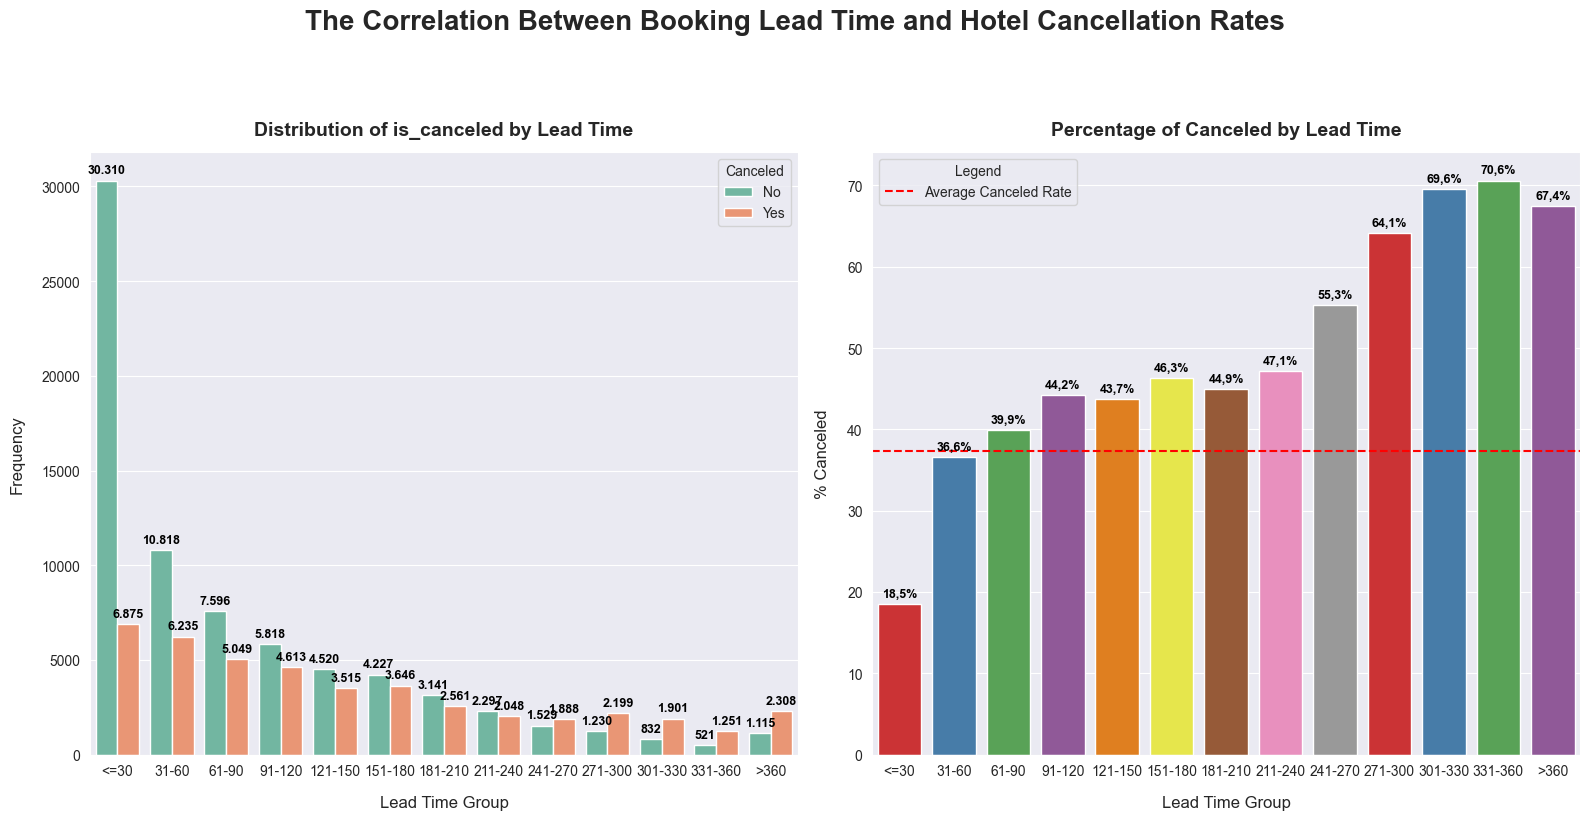

In [21]:
# Menghitung distribusi is_canceled berdasarkan lead_time_group
df_lead_time = df.groupby('lead_time_group').agg(
    Total=('is_canceled', 'size'),
    Canceled=('is_canceled', 'sum')
).reset_index()
df_lead_time['% Canceled'] = (df_lead_time['Canceled'] / df_lead_time['Total']) * 100

# Urutan lead_time_group yang diinginkan
lead_time_order = ["<=30", "31-60", "61-90", "91-120", "121-150", "151-180", "181-210", "211-240", "241-270", "271-300", "301-330", "331-360", ">360"]

# Plotting
plt.figure(figsize=(16, 8))
plt.suptitle("The Correlation Between Booking Lead Time and Hotel Cancellation Rates", fontsize=20, y=1.02, fontweight="bold")

# Distribusi is_canceled berdasarkan lead_time
ax1 = plt.subplot(1, 2, 1)
sns.countplot(data=df, x="lead_time_group", hue="is_canceled", order=lead_time_order, palette="Set2", ax=ax1)
ax1.set_title("Distribution of is_canceled by Lead Time", pad=12, fontweight="bold", fontsize=14)
ax1.set_xlabel("Lead Time Group", labelpad=12, fontsize=12)
ax1.set_ylabel("Frequency", labelpad=12, fontsize=12)
ax1.legend(title="Canceled", loc="upper right", labels=["No", "Yes"])
for container in ax1.containers:
    ax1.bar_label(container, labels=[f"{x:,.0f}".replace(",", ".") for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold", fontsize=9)

# Persentase Canceled berdasarkan lead_time
ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=df_lead_time, x="lead_time_group", y="% Canceled", order=lead_time_order, palette="Set1", ax=ax2)
ax2.set_title("Percentage of Canceled by Lead Time", pad=12, fontweight="bold", fontsize=14)
ax2.set_xlabel("Lead Time Group", labelpad=12, fontsize=12)
ax2.set_ylabel("% Canceled", labelpad=12, fontsize=12)
for container in ax2.containers:
    ax2.bar_label(container, labels=[f"{float(x):.1f}%".replace(".", ",") for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold", fontsize=9)

# Menambahkan garis vertikal untuk rata-rata pembatalan
average_canceled = df['is_canceled'].mean() * 100
ax2.axhline(y=average_canceled, color='red', linestyle='--', label='Average Canceled Rate')
ax2.legend(title='Legend')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Temuan Utama:**

1. **Pola Pembatalan:** Grafik memperlihatkan bahwa mayoritas pembatalan terjadi pada *rentang waktu pemesanan* yang lebih singkat, terutama dalam kategori kurang dari atau sama dengan 30 hari. Hal ini mengindikasikan bahwa banyak tamu yang membatalkan reservasi mereka mendekati tanggal kedatangan.

2. **Tingkat Pembatalan:** Terdapat tren peningkatan persentase pembatalan seiring dengan bertambahnya *rentang waktu pemesanan*. Kategori lebih dari 360 hari mencatat persentase tertinggi (70,1%), yang menunjukkan bahwa tamu yang memesan jauh-jauh hari cenderung lebih sering membatalkan pesanan mereka.

3. **Tolok Ukur:** Garis merah yang mewakili rata-rata tingkat pembatalan memberikan informasi tambahan yang berguna. Nilai rata-rata ini membantu mengidentifikasi apakah suatu kategori memiliki tingkat pembatalan di atas atau di bawah rata-rata, sehingga memberikan pemahaman yang lebih mendalam tentang perilaku pemesanan.

**Rekomendasi:**

**1. Kebijakan Fleksibel untuk Pemesanan Jangka Panjang:**

*   **Tawarkan opsi penjadwalan ulang tanpa biaya:**  Untuk pemesanan dengan *lead time* (rentang waktu pemesanan) yang panjang, berikan fleksibilitas kepada tamu untuk menjadwalkan ulang pemesanan tanpa biaya tambahan. Ini memberikan alternatif selain pembatalan penuh dan dapat mengurangi jumlah pembatalan.

**2. Kebijakan Deposit Non-Refundable yang Lebih Tinggi:**

*   **Wajibkan deposit lebih tinggi dan non-refundable:**  Untuk pemesanan dengan *lead time* yang panjang, terapkan kebijakan deposit yang lebih tinggi dan bersifat *non-refundable*. Hal ini akan mengurangi insentif pembatalan karena tamu akan lebih mempertimbangkan keputusan mereka sebelum membatalkan pemesanan yang melibatkan deposit signifikan.

**3. Strategi Pemasaran untuk Pemesanan Mendekat:**

*   **Berikan insentif untuk pemesanan *lead time* panjang:**  Mengingat data menunjukkan tingginya jumlah pembatalan pada *rentang waktu pemesanan* yang singkat, hotel dapat menawarkan insentif khusus bagi tamu yang melakukan pemesanan dengan *rentang waktu pemesanan* yang lebih panjang.
*   **Jenis Insentif:** Insentif ini dapat berupa diskon khusus atau fasilitas tambahan (misalnya, *upgrade* kamar, sarapan gratis).

**4. Komunikasi Proaktif dengan Tamu:**

*   **Lakukan komunikasi aktif untuk pemesanan jauh hari:** Jalin komunikasi yang proaktif dengan tamu yang telah melakukan pemesanan jauh-jauh hari.
*   **Pengingat dan Penyesuaian:** Kirimkan pengingat pemesanan mendekati tanggal menginap atau tawarkan opsi untuk menyesuaikan tanggal pemesanan jika diperlukan. Komunikasi ini dapat membantu mengurangi tingkat pembatalan.

**5. Pemantauan Tren Pembatalan Berkala:**

*   **Pantau tren pembatalan secara rutin:** Lakukan pemantauan secara berkala terhadap tren pembatalan yang terjadi, khususnya berdasarkan *rentang waktu pemesanan*.
*   **Sesuaikan Strategi:** Berdasarkan hasil pemantauan tren, sesuaikan strategi pemasaran dan penetapan harga hotel untuk merespons perubahan pola perilaku tamu dan meminimalkan pembatalan.

#### **5.1.2 Bagaimana *pola pembatalan pesanan berdasarkan waktu* pemesanan?**

In [5]:
# Mengubah kolom tanggal menjadi tipe datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y-%m-%d')

# Menambahkan kolom baru untuk tahun dan bulan dari arrival_date
df["arrival_date_year_month"] = df["arrival_date"].dt.to_period("M").dt.to_timestamp()

# Membuat table distribusi is_canceled berdasarkan tahun dan bulan dari arrival_date
df_arrival_year_month = df.pivot_table(index="arrival_date_year_month", columns="is_canceled", aggfunc="size", fill_value=0).reset_index()
df_arrival_year_month["Total"] = df_arrival_year_month[0] + df_arrival_year_month[1]
df_arrival_year_month.columns.name = None

df_arrival_year_month


arrival_date_year_month     0     1  Total
0               2015-07-01  1465  1253   2718
1               2015-08-01  2232  1593   3825
2               2015-09-01  2959  2074   5033
3               2015-10-01  3141  1712   4853
4               2015-11-01  1814   485   2299
5               2015-12-01  1861   967   2828
6               2016-01-01  1662   553   2215
7               2016-02-01  2513  1328   3841
8               2016-03-01  3288  1471   4759
9               2016-04-01  3310  2053   5363
10              2016-05-01  3482  1911   5393
11              2016-06-01  3155  2094   5249
12              2016-07-01  3032  1491   4523
13              2016-08-01  3206  1822   5028
14              2016-09-01  3343  2019   5362
15              2016-10-01  3626  2512   6138
16              2016-11-01  2762  1634   4396
17              2016-12-01  2413  1395   3808
18              2017-01-01  2389  1248   3637
19              2017-02-01  2766  1354   4120
20              2017-03-01  3256  1671   4927
21              2017-04-01  3178  2458   5636
22              2017-05-01  3517  2759   6276
23              2017-06-01  3188  2435   5623
24              2017-07-01  3301  1983   5284
25              2017-08-01  3095  1814   4909

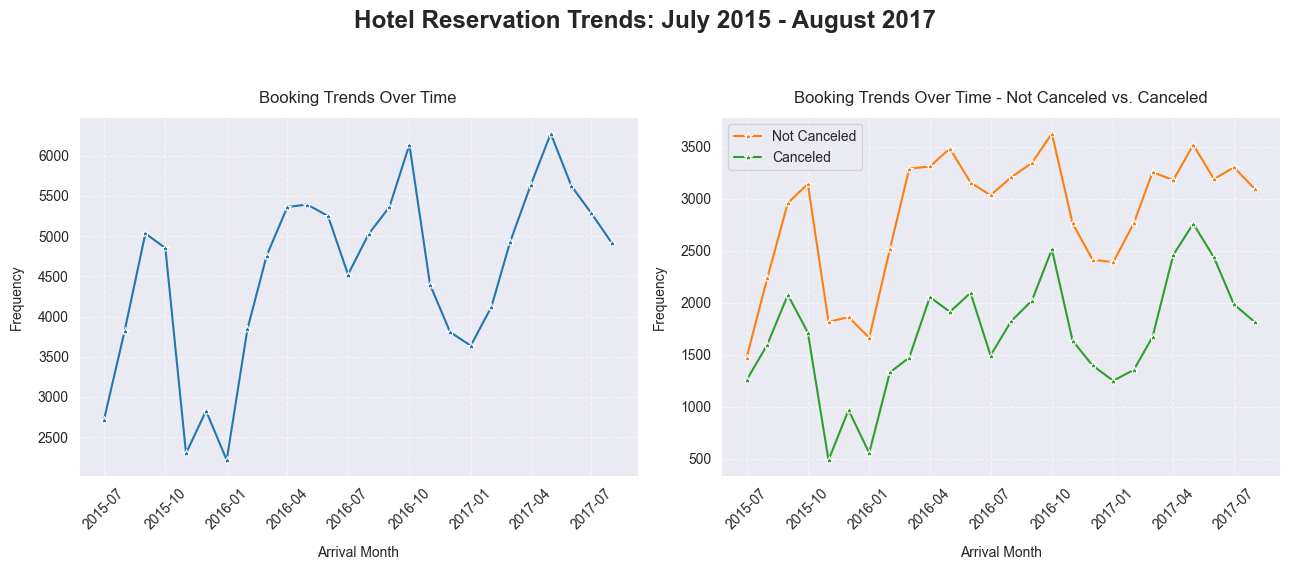

In [6]:
# Membuat plot pemesanan dari waktu ke waktu berdasarkan tahun dan bulan dari arrival_date
fig, axes = plt.subplots(1, 2, figsize=(13, 5.65))
fig.suptitle("Hotel Reservation Trends: July 2015 - August 2017", fontsize=17.5, y=1, fontweight="bold")

# Plot total booking trends over time
sns.lineplot(data=df_arrival_year_month, x="arrival_date_year_month", y="Total", marker="*", color="#1f77b4", ax=axes[0])
axes[0].set_title("Booking Trends Over Time", pad=10)
axes[0].set_xlabel("Arrival Month", labelpad=10)
axes[0].set_ylabel("Frequency", labelpad=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot booking trends over time - not canceled vs. canceled
sns.lineplot(data=df_arrival_year_month, x="arrival_date_year_month", y=0, marker="*", color="#ff7f0e", label="Not Canceled", ax=axes[1])
sns.lineplot(data=df_arrival_year_month, x="arrival_date_year_month", y=1, marker="*", color="#2ca02c", label="Canceled", ax=axes[1])
axes[1].set_title("Booking Trends Over Time - Not Canceled vs. Canceled", pad=10)
axes[1].set_xlabel("Arrival Month", labelpad=10)
axes[1].set_ylabel("Frequency", labelpad=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Temuan Utama:**

1. **Tren Pemesanan:** Dari grafik di sebelah kiri, terlihat adanya fluktuasi jumlah pemesanan hotel dari waktu ke waktu, dengan beberapa puncak yang menandai periode permintaan tinggi. Puncak tertinggi terjadi di sekitar pertengahan tahun 2016.

2. **Perbandingan Pembatalan:** Grafik di sebelah kanan menyajikan perbandingan antara pemesanan yang dibatalkan (garis magenta) dan pemesanan yang tidak dibatalkan (garis ungu). Terlihat bahwa pemesanan yang dibatalkan cenderung meningkat pada periode tertentu, yang mungkin berkaitan dengan tren pemesanan secara umum.

3. **Pola Musiman:** Pola musiman terlihat di kedua grafik, dengan fluktuasi yang mengindikasikan bahwa permintaan mungkin lebih tinggi pada bulan-bulan tertentu. Misalnya, bulan-bulan di sekitar musim liburan cenderung menunjukkan peningkatan pemesanan.

**Rekomendasi:**

1. **Analisis Penyebab Fluktuasi:** Melakukan analisis untuk memahami faktor-faktor penyebab fluktuasi pemesanan. Faktor-faktor ini dapat mencakup acara lokal, hari libur, atau kondisi ekonomi. Memahami apa yang memengaruhi permintaan dapat membantu hotel dalam perencanaan dan strategi pemasaran.

2. **Strategi Penetapan Harga Adaptif:** Mengingat fluktuasi permintaan, hotel dapat menerapkan strategi penetapan harga dinamis untuk memaksimalkan pendapatan selama periode permintaan tinggi dan menawarkan diskon selama periode permintaan rendah untuk menarik lebih banyak tamu.

3. **Pengurangan Pembatalan:** Dengan meningkatnya tren pembatalan, hotel perlu mengeksplorasi kebijakan pembatalan yang lebih fleksibel atau menawarkan insentif untuk mengurangi tingkat pembatalan. Misalnya, memberikan diskon bagi tamu yang tidak membatalkan reservasi mereka.

4. **Pemasaran Berbasis Musim:** Mengembangkan kampanye pemasaran yang berfokus pada musim tertentu. Memanfaatkan tren musiman dapat membantu menarik tamu selama periode dengan permintaan yang lebih rendah.

5. **Pemantauan Berkelanjutan:** Terus memantau tren pemesanan dan pembatalan. Pengumpulan data secara berkala dapat memberikan wawasan tentang pola jangka panjang dan membantu dalam perencanaan ke depan.


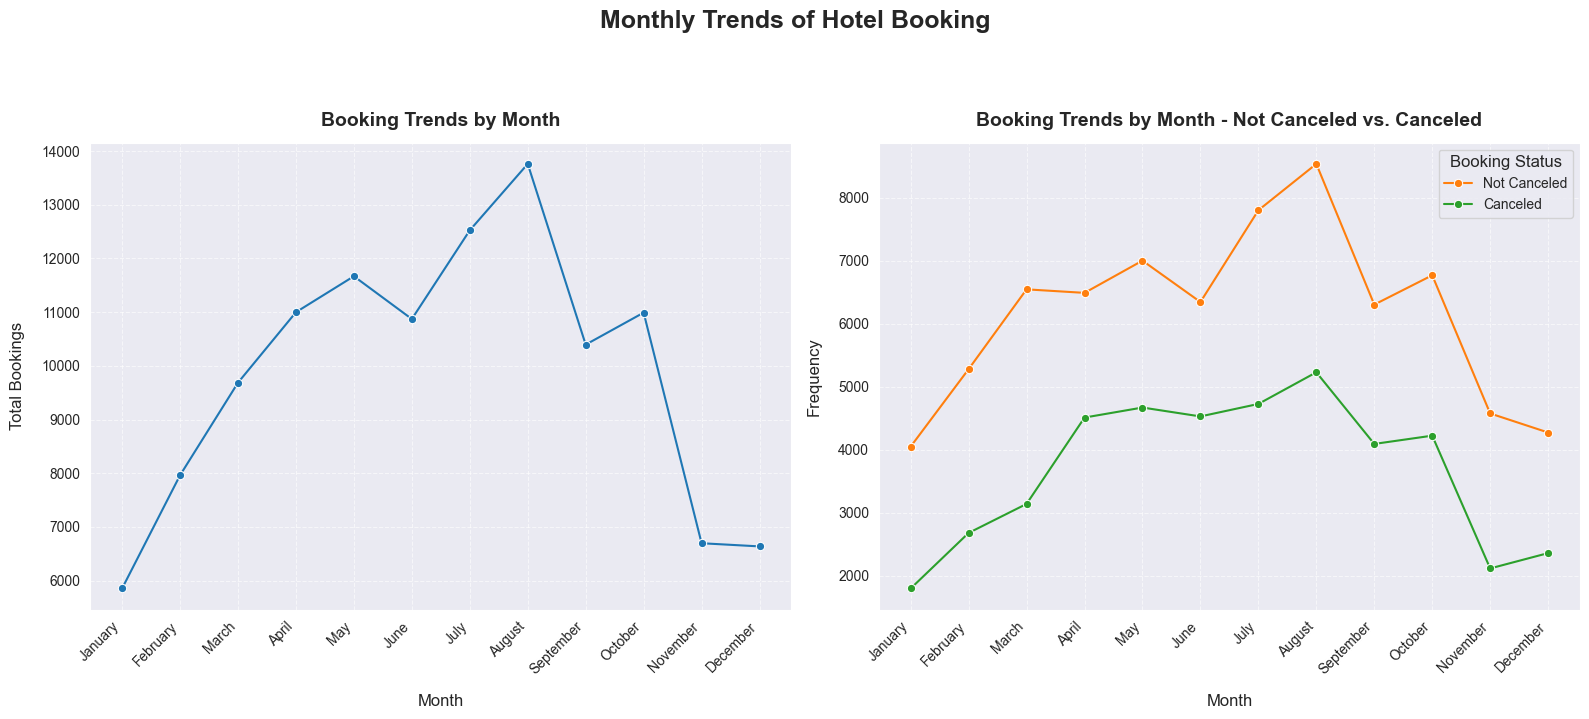

In [7]:
# Mengelompokkan data berdasarkan bulan dari arrival_date
df["arrival_date_month"] = df["arrival_date"].dt.strftime("%B")
df_monthly = df.groupby(["arrival_date_month", "is_canceled"]).size().unstack().reset_index()
df_monthly.columns.name = None
df_monthly["Total"] = df_monthly[0] + df_monthly[1]

# Menentukan urutan bulan
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
df_monthly["arrival_date_month"] = pd.Categorical(df_monthly["arrival_date_month"], categories=month_order, ordered=True)
df_monthly = df_monthly.sort_values("arrival_date_month")

# Membuat plot tren bulanan berdasarkan arrival_date_month
plt.figure(figsize=(16, 7))
plt.suptitle("Monthly Trends of Hotel Booking", fontsize=18, y=1.02, fontweight="bold")

# Tren pemesanan bulanan (Total)
plt.subplot(1, 2, 1)
sns.lineplot(data=df_monthly, x="arrival_date_month", y="Total", marker="o", color="#1f77b4")
plt.title("Booking Trends by Month", pad=12, fontweight="bold", fontsize=14)
plt.xlabel("Month", labelpad=12, fontsize=12)
plt.ylabel("Total Bookings", labelpad=12, fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Tren pemesanan bulanan - Not Canceled vs. Canceled
plt.subplot(1, 2, 2)
sns.lineplot(data=df_monthly, x="arrival_date_month", y=0, marker="o", color="#ff7f0e", label="Not Canceled")
sns.lineplot(data=df_monthly, x="arrival_date_month", y=1, marker="o", color="#2ca02c", label="Canceled")
plt.title("Booking Trends by Month - Not Canceled vs. Canceled", pad=12, fontweight="bold", fontsize=14)
plt.xlabel("Month", labelpad=12, fontsize=12)
plt.ylabel("Frequency", labelpad=12, fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Booking Status", fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Menyusun layout yang rapi
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



**Temuan Utama:**

1. **Tren Keseluruhan:** Grafik di sebelah kiri memperlihatkan bahwa total pemesanan hotel secara umum mengalami peningkatan dari Januari hingga Juni, mencapai puncaknya pada bulan Juli. Namun, terlihat penurunan signifikan pada bulan Desember. Hal ini mengindikasikan adanya fluktuasi musiman dalam permintaan.

2. **Perbandingan Pembatalan:** Grafik di sebelah kanan menyajikan perbandingan antara pemesanan yang dibatalkan (ditandai dengan garis magenta) dan yang tidak dibatalkan (ditandai dengan garis ungu). Terlihat bahwa seiring dengan meningkatnya tren pemesanan, jumlah pembatalan juga tetap signifikan dan berfluktuasi dari bulan ke bulan.

3. **Pola Musiman:** Pola musiman yang kuat terlihat jelas, di mana bulan-bulan tertentu (seperti Juli dan Agustus) menunjukkan jumlah pemesanan yang lebih tinggi, kemungkinan besar terkait dengan musim liburan dan acara-acara khusus.

**Rekomendasi:**

1. **Optimalisasi Strategi Pemasaran untuk Musim Liburan:** Mengingat puncak pemesanan terjadi pada bulan Juli dan Agustus, pihak hotel perlu mengembangkan strategi pemasaran yang agresif selama periode ini, seperti promosi khusus untuk menarik lebih banyak tamu.

2. **Penanganan Pembatalan:** Meningkatnya jumlah pembatalan mengindikasikan perlunya analisis mendalam mengenai penyebab pembatalan. Pihak hotel dapat mempertimbangkan untuk menawarkan kebijakan pembatalan yang lebih fleksibel atau memberikan insentif kepada tamu untuk mempertahankan reservasi mereka.

3. **Pemasaran untuk Bulan-Bulan Sepi:** Memperhatikan penurunan tajam pada bulan Desember, pihak hotel perlu mencari cara untuk menarik lebih banyak tamu selama bulan-bulan yang kurang populer, seperti menawarkan paket liburan atau diskon untuk pemesanan di awal.

4. **Analisis Pengaruh Eksternal:** Melakukan analisis untuk memahami faktor-faktor eksternal yang memengaruhi tren pemesanan, seperti kondisi ekonomi, acara lokal, atau kampanye pemasaran yang dilakukan oleh pesaing.

5. **Pemantauan Tren Secara Berkala:** Terus memantau tren pemesanan dan pembatalan, serta melakukan penyesuaian pada strategi harga dan pemasaran berdasarkan data terkini untuk memastikan respons yang cepat terhadap perubahan pola permintaan.


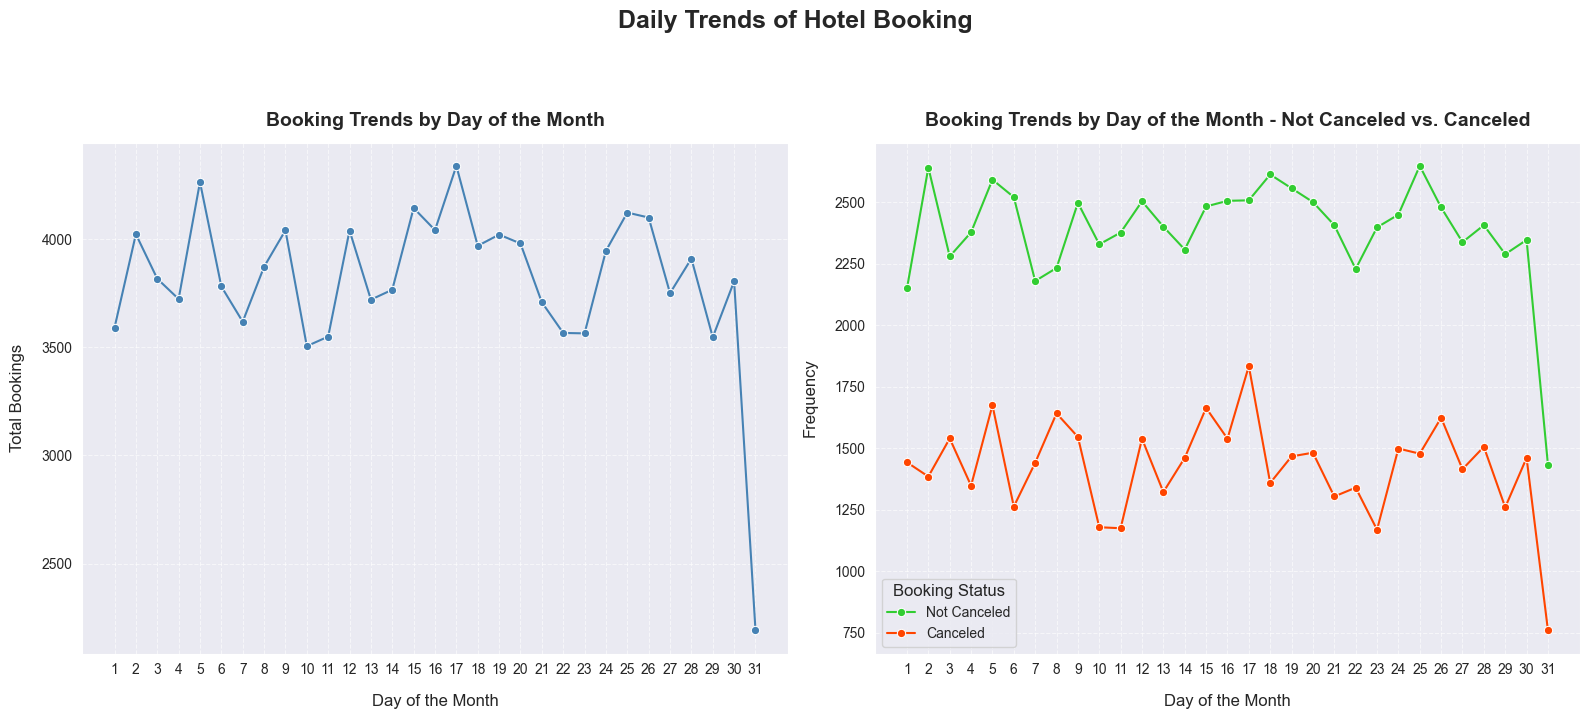

In [8]:
# Mengelompokkan data berdasarkan hari dalam bulan dari arrival_date
df["arrival_date_day"] = df["arrival_date"].dt.day
df_daily = df.groupby(["arrival_date_day", "is_canceled"]).size().unstack().reset_index()
df_daily.columns.name = None
df_daily["Total"] = df_daily[0] + df_daily[1]

# Membuat plot tren harian berdasarkan arrival_date_day
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle("Daily Trends of Hotel Booking", fontsize=18, y=1.02, fontweight="bold")

# Tren pemesanan harian (Total)
sns.lineplot(data=df_daily, x="arrival_date_day", y="Total", marker="o", color="#4682B4", ax=ax1)
ax1.set_title("Booking Trends by Day of the Month", pad=12, fontweight="bold", fontsize=14)
ax1.set_xlabel("Day of the Month", labelpad=12, fontsize=12)
ax1.set_ylabel("Total Bookings", labelpad=12, fontsize=12)
ax1.set_xticks(range(1, 32))  # Mengatur agar sumbu x menunjukkan hari 1-31
ax1.grid(True, linestyle='--', alpha=0.6)

# Tren pemesanan harian - Not Canceled vs. Canceled
sns.lineplot(data=df_daily, x="arrival_date_day", y=0, marker="o", color="#32CD32", label="Not Canceled", ax=ax2)
sns.lineplot(data=df_daily, x="arrival_date_day", y=1, marker="o", color="#FF4500", label="Canceled", ax=ax2)
ax2.set_title("Booking Trends by Day of the Month - Not Canceled vs. Canceled", pad=12, fontweight="bold", fontsize=14)
ax2.set_xlabel("Day of the Month", labelpad=12, fontsize=12)
ax2.set_ylabel("Frequency", labelpad=12, fontsize=12)
ax2.set_xticks(range(1, 32))  # Mengatur agar sumbu x menunjukkan hari 1-31
ax2.legend(title="Booking Status", fontsize=10, title_fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Menyusun layout yang rapi
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Temuan Utama:**

1. **Pola Pemesanan Harian:** Grafik di sebelah kiri memperlihatkan variasi jumlah pemesanan hotel sepanjang bulan, dengan beberapa puncak dan lembah yang mencerminkan fluktuasi permintaan. Puncak-puncak tersebut mengindikasikan periode permintaan tinggi, sementara lembah-lembahnya menandai waktu yang lebih sepi.

2. **Perbandingan Pembatalan:** Grafik di sebelah kanan menyajikan perbandingan antara pemesanan yang tidak dibatalkan (garis ungu) dan yang dibatalkan (garis magenta). Terlihat bahwa pembatalan terjadi secara konsisten sepanjang bulan, namun terdapat variasi dalam jumlah pemesanan yang tidak dibatalkan.

3. **Pengaruh Waktu:** Puncak dalam jumlah pemesanan mungkin bertepatan dengan akhir pekan atau hari libur, sementara pembatalan cenderung menunjukkan pola yang berbeda. Hal ini mengindikasikan bagaimana perilaku pemesanan dipengaruhi oleh waktu.

**Rekomendasi:**

1. **Analisis Musiman:** Pihak hotel perlu menganalisis periode puncak pemesanan untuk mengidentifikasi pola musiman dan menyesuaikan strategi pemasaran serta penetapan harga agar lebih efektif selama periode-periode tersebut.

2. **Strategi Pengurangan Pembatalan:** Dengan meningkatnya pembatalan pada hari-hari tertentu, pihak hotel dapat mengeksplorasi strategi untuk mengurangi tingkat pembatalan, seperti menawarkan kebijakan pembatalan yang lebih fleksibel atau insentif bagi tamu yang tidak membatalkan.

3. **Pemasaran Proaktif:** Memanfaatkan data pemesanan untuk mengidentifikasi hari-hari dengan permintaan tinggi dan merancang kampanye pemasaran yang menarik, seperti penawaran khusus untuk akhir pekan atau promosi musiman.

4. **Pemantauan Tren Harian:** Pihak hotel harus terus memantau tren harian pemesanan dan pembatalan, serta membuat penyesuaian berdasarkan data untuk meningkatkan kepuasan pelanggan dan pendapatan.

5. **Kebijakan Pembatalan yang Transparan:** Memastikan bahwa kebijakan pembatalan tersampaikan dengan jelas kepada tamu saat mereka melakukan pemesanan. Transparansi ini dapat membantu mengurangi pembatalan yang tidak terduga.


In [9]:
# membuat table distribusi is_canceled berdasarkan kolom arrival_date_month beserta persentase canceled-nya
df_arrival_date_month = df.groupby(["arrival_date_month", "is_canceled"]).size().unstack().reset_index()
df_arrival_date_month.columns.name = None
df_arrival_date_month["Total"] = df_arrival_date_month[0] + df_arrival_date_month[1]
df_arrival_date_month["% Canceled"] = (df_arrival_date_month[1] / df_arrival_date_month["Total"] * 100).round(2)
df_arrival_date_month

arrival_date_month     0     1  Total  % Canceled
0               April  6488  4511  10999       41.01
1              August  8533  5229  13762       38.00
2            December  4274  2362   6636       35.59
3            February  5279  2682   7961       33.69
4             January  4051  1801   5852       30.78
5                July  7798  4727  12525       37.74
6                June  6343  4529  10872       41.66
7               March  6544  3142   9686       32.44
8                 May  6999  4670  11669       40.02
9            November  4576  2119   6695       31.65
10            October  6767  4224  10991       38.43
11          September  6302  4093  10395       39.37

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_6218/3931961630.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


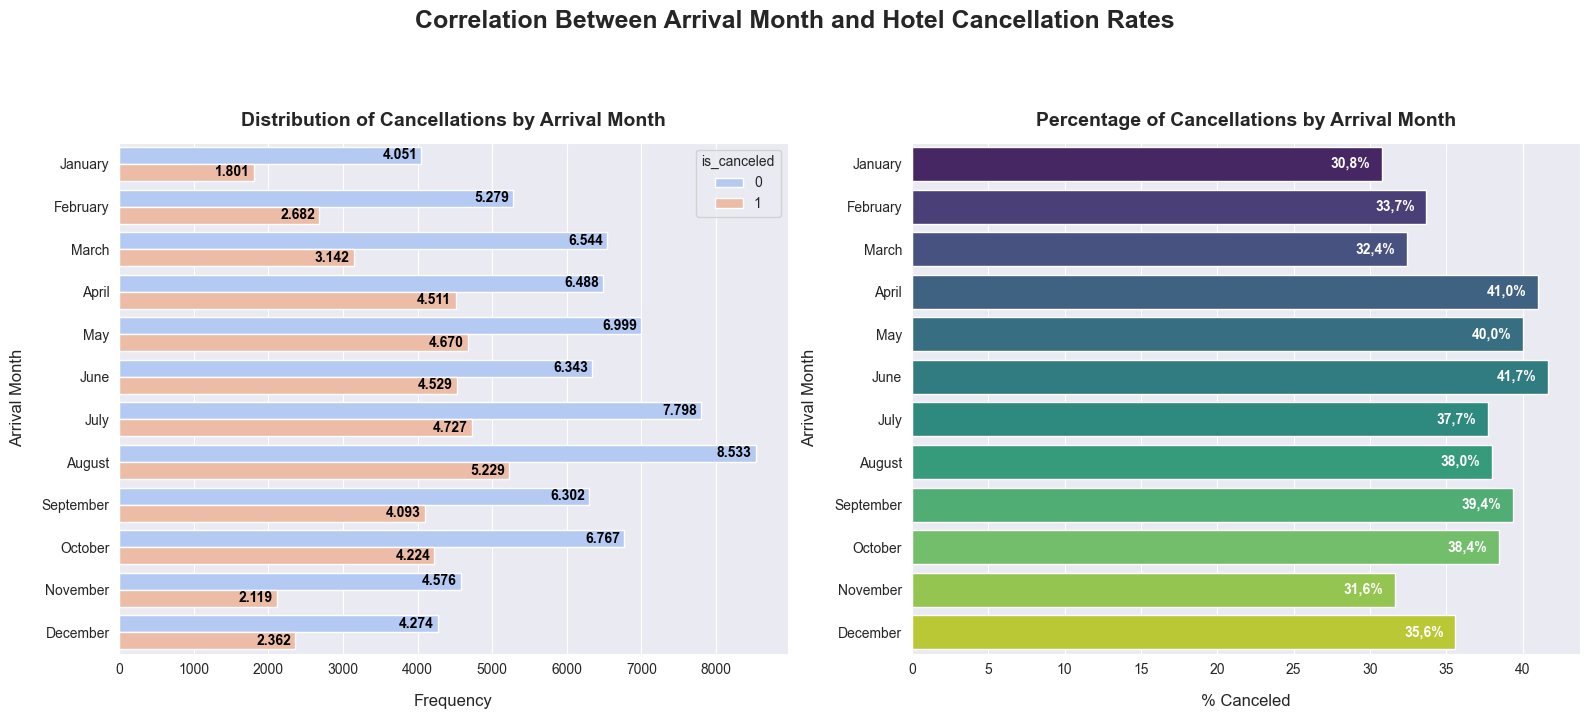

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengasumsikan df dan df_arrival_date_month sudah ada dengan data yang sesuai
plt.figure(figsize=(16, 7))  # Menambah ukuran figure untuk memberi lebih banyak ruang

plt.suptitle("Correlation Between Arrival Month and Hotel Cancellation Rates", fontsize=18, y=1.02, fontweight="bold")

# Distribusi is_canceled berdasarkan arrival_date_month
plt.subplot(1, 2, 1)
ax = sns.countplot(
    data=df, 
    y="arrival_date_month", 
    hue="is_canceled", 
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    palette="coolwarm"
)
ax.set_title("Distribution of Cancellations by Arrival Month", pad=12, fontweight="bold", fontsize=14)
ax.set_xlabel("Frequency", labelpad=12, fontsize=12)
ax.set_ylabel("Arrival Month", labelpad=12, fontsize=12)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type="edge",
        padding=-28,
        color="black",
        fontweight="bold",
        fontsize=10
    )

# Persentase Canceled berdasarkan arrival_date_month
plt.subplot(1, 2, 2)
ax = sns.barplot(
    data=df_arrival_date_month, 
    y="arrival_date_month", 
    x="% Canceled", 
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    palette="viridis"
)
ax.set_title("Percentage of Cancellations by Arrival Month", pad=12, fontweight="bold", fontsize=14)
ax.set_xlabel("% Canceled", labelpad=12, fontsize=12)
ax.set_ylabel("Arrival Month", labelpad=12, fontsize=12)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{float(x):.1f}%".replace(".", ",") for x in container.datavalues],
        label_type="edge",
        padding=-37,
        color="white",
        fontweight="bold",
        fontsize=10
    )

# Menyesuaikan tata letak agar lebih rapi
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Temuan Utama:**

1. **Distribusi Pembatalan:** Grafik di sebelah kiri menunjukkan variasi jumlah pembatalan sepanjang bulan, dengan puncak tertinggi pada bulan Agustus (8.533 pembatalan) dan terendah pada bulan Desember (2.362 pembatalan). Hal ini mengindikasikan adanya fluktuasi signifikan dalam perilaku pembatalan berdasarkan bulan.

2. **Persentase Pembatalan:** Grafik di sebelah kanan menggambarkan persentase pembatalan untuk setiap bulan. April mencatat persentase tertinggi (41,0%) dari seluruh pembatalan, menjadikannya bulan dengan risiko pembatalan tertinggi.

3. **Tren Bulanan:** Beberapa bulan (misalnya, Januari dan Februari) menunjukkan persentase pembatalan yang lebih tinggi dibandingkan bulan-bulan lainnya, yang mungkin menandakan bahwa tamu cenderung membatalkan reservasi mereka di awal tahun.

**Rekomendasi:**

1. **Analisis Musiman Pembatalan:** Mengingat fluktuasi jumlah dan persentase pembatalan, pihak hotel perlu melakukan analisis lebih lanjut untuk memahami penyebab tingginya pembatalan pada bulan-bulan tertentu. Analisis ini akan membantu dalam perencanaan dan penyesuaian kebijakan.

2. **Strategi Penanganan Pembatalan:** Dengan meningkatnya pembatalan, terutama pada bulan-bulan seperti April, pihak hotel perlu mempertimbangkan untuk menawarkan kebijakan pembatalan yang lebih fleksibel atau insentif bagi tamu yang tidak membatalkan. Misalnya, memberikan diskon bagi tamu yang memilih untuk tidak membatalkan.

3. **Pemasaran Proaktif:** Untuk bulan-bulan dengan tingkat pembatalan tinggi, pihak hotel dapat menerapkan strategi pemasaran untuk menarik tamu lebih awal, seperti promosi pemesanan awal. Hal ini dapat membantu mengurangi jumlah pembatalan menjelang hari kedatangan.

4. **Pemantauan Berkelanjutan:** Pihak hotel perlu terus memantau tren pembatalan dan mengumpulkan data mengenai alasan pembatalan. Dengan demikian, pihak hotel dapat menyesuaikan strategi mereka berdasarkan data terkini dan mengantisipasi periode dengan risiko pembatalan tinggi.

5. **Fokus pada Bulan dengan Pembatalan Tinggi:** Selama bulan-bulan dengan pembatalan tinggi, pihak hotel dapat mempertimbangkan untuk meningkatkan komunikasi dengan tamu, seperti pengingat reservasi, tawaran layanan tambahan, atau promosi menarik.


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_6218/137355248.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_6218/137355248.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


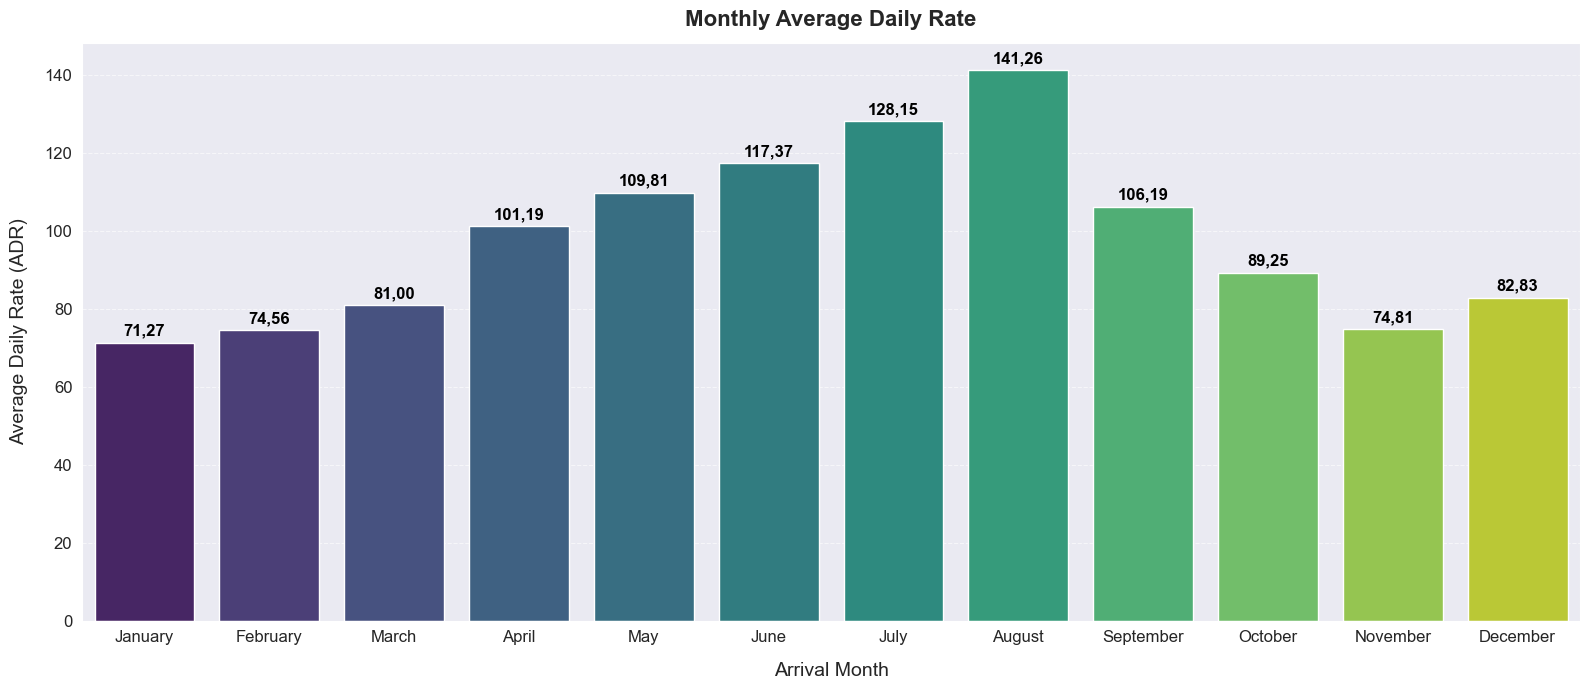

In [11]:
# Mengasumsikan df sudah ada dengan data yang sesuai
plt.figure(figsize=(16, 7))  

# Membuat plot ADR setiap bulannya
ax = sns.barplot(
    data=df, 
    x="arrival_date_month", 
    y="adr", 
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    ci=None, 
    palette="viridis"  # Ubah warna bar dengan palet 'viridis'
)

# Menambahkan judul dan label sumbu
ax.set_title("Monthly Average Daily Rate", pad=12, fontweight="bold", fontsize=16)
ax.set_xlabel("Arrival Month", labelpad=12, fontsize=14)
ax.set_ylabel("Average Daily Rate (ADR)", labelpad=12, fontsize=14)

# Menambahkan label pada setiap batang
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{float(x):,.2f}".replace(".", ",") for x in container.datavalues],
        label_type="edge",
        padding=3,
        color="black",
        fontweight="bold",
        fontsize=12
    )

# Menampilkan plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Menambahkan grid horizontal untuk membantu pembacaan data
plt.tight_layout()
plt.show()

**Temuan Utama:**

1. **Puncak Rata-Rata Tarif Harian:** Grafik menunjukkan bahwa bulan Agustus memiliki rata-rata tarif harian (ADR) tertinggi, yaitu 141,26. Hal ini kemungkinan besar disebabkan oleh tingginya permintaan pada bulan tersebut, yang mungkin dipicu oleh musim liburan atau acara-acara khusus.

2. **Penurunan Tarif di Beberapa Bulan:** Setelah Agustus, terlihat penurunan rata-rata tarif harian pada bulan September (106,19) dan bulan-bulan berikutnya. Penurunan ini mengindikasikan bahwa setelah periode puncak, permintaan mulai melemah.

3. **Fluktuasi Musiman:** Beberapa bulan, seperti Mei hingga Agustus, menunjukkan peningkatan yang konsisten dalam rata-rata tarif harian. Sementara itu, bulan-bulan seperti Januari dan Februari memiliki tarif yang lebih rendah. Hal ini mengisyaratkan adanya pola musiman dalam permintaan.

**Rekomendasi:**

1. **Strategi Penetapan Harga untuk Musim Puncak:** Mengingat puncak rata-rata tarif harian terjadi di bulan Agustus, pihak hotel sebaiknya mempertimbangkan untuk menyesuaikan harga selama periode ini guna memaksimalkan pendapatan, sembari tetap menjaga tingkat hunian.

2. **Promosi di Bulan-Bulan Sepi:** Untuk bulan-bulan dengan rata-rata tarif harian yang lebih rendah, seperti Januari dan Februari, pihak hotel dapat mempertimbangkan untuk meluncurkan promosi atau paket menarik guna menarik lebih banyak tamu dan meningkatkan tingkat hunian.

3. **Analisis Faktor yang Mempengaruhi Permintaan:** Melakukan analisis untuk memahami faktor-faktor yang menyebabkan tingginya permintaan pada bulan-bulan tertentu. Faktor-faktor ini dapat mencakup acara-acara khusus, festival, atau kondisi cuaca. Memahami faktor-faktor ini akan membantu dalam perencanaan pemesanan dan pemasaran.

4. **Diversifikasi Penawaran:** Mengembangkan paket yang ditargetkan berdasarkan musim dapat membantu menarik segmen pasar yang berbeda. Misalnya, paket untuk keluarga selama liburan sekolah atau diskon untuk perjalanan bisnis di bulan-bulan yang kurang ramai.

5. **Pemantauan Tren Secara Berkala:** Pihak hotel perlu terus memantau tren rata-rata tarif harian dan mengumpulkan data untuk menyesuaikan strategi penetapan harga dan pemasaran berdasarkan pola permintaan yang teridentifikasi.


#### **5.1.3 Seberapa besar pengaruh waktu kedatangan terhadap keputusan pelanggan untuk membatalkan pesanan?**


In [12]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y-%m-%d')

df_canceled=df[df['is_canceled']==1].copy()
df_canceled['cancelled_days_before_arrival']=df_canceled.apply(lambda x : (x['arrival_date']-x['reservation_status_date']).days,axis=1)
df_canceled.head()

hotel  is_canceled  lead_time  arrival_date_year  \
6   Resort Hotel            1         85               2015   
7   Resort Hotel            1         75               2015   
8   Resort Hotel            1         23               2015   
25  Resort Hotel            1         60               2015   
30  Resort Hotel            1         96               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
6                July                        27                          1   
7                July                        27                          1   
8                July                        27                          1   
25               July                        27                          1   
30               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
6                         0                     3       2         0       0   
7                         0                     3       2         0       0   
8                         0                     4       2         0       0   
25                        2                     5       2         0       0   
30                        2                     8       2         0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
6    BB     PRT      Online TA                TA/TO                  0   
7    HB     PRT  Offline TA/TO                TA/TO                  0   
8    BB     PRT      Online TA                TA/TO                  0   
25   BB     PRT      Online TA                TA/TO                  0   
30   BB     PRT         Direct               Direct                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
6                        0                               0                  A   
7                        0                               0                  D   
8                        0                               0                  E   
25                       0                               0                  E   
30                       0                               0                  E   

   assigned_room_type  booking_changes deposit_type    agent  company  \
6                   A                0   No Deposit    240.0  unknown   
7                   D                0   No Deposit     15.0  unknown   
8                   E                0   No Deposit    240.0  unknown   
25                  E                0   No Deposit    240.0  unknown   
30                  E                0   No Deposit  unknown  unknown   

    days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
6                      0     Transient   82.0                            0   
7                      0     Transient  105.5                            0   
8                      0     Transient  123.0                            0   
25                     0     Transient  107.0                            0   
30                     0     Transient  108.3                            0   

    total_of_special_requests reservation_status reservation_status_date  \
6                           1           Canceled              2015-05-06   
7                           0           Canceled              2015-04-22   
8                           0           Canceled              2015-06-23   
25                          2           Canceled              2015-05-11   
30                          2           Canceled              2015-05-29   

   arrival_date day_type lead_time_group  visitor visitor_group  \
6    2015-07-01  Weekday           61-90        2        Couple   
7    2015-07-01  Weekday           61-90        2        Couple   
8    2015-07-01  Weekday            <=30        2        Couple   
25   2015-07-01  Weekday           61-90        2        Couple   
30   2015-07-01  Weekday          91-120        2       

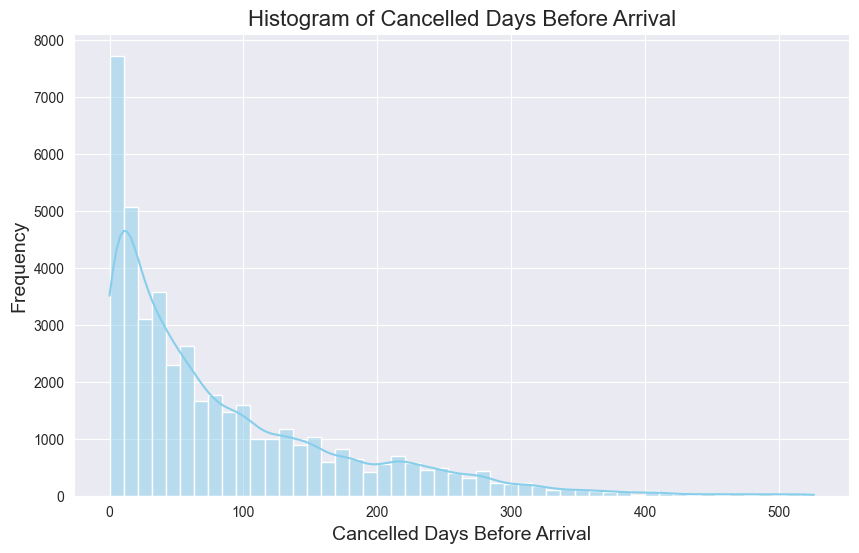

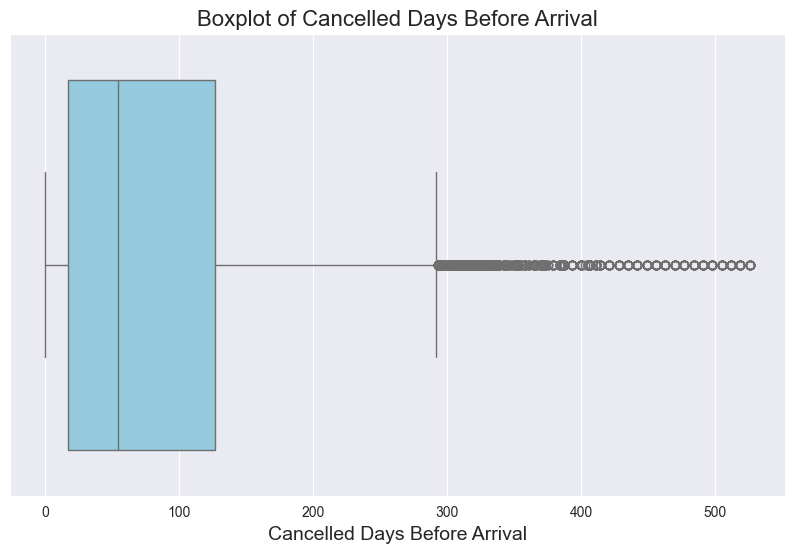

Statistic        Value
0                  Median    54.000000
1             Lower Bound  -148.000000
2             Upper Bound   292.000000
3      Number of Outliers  1590.000000
4  Percentage of Outliers     3.606342

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_canceled['cancelled_days_before_arrival'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Cancelled Days Before Arrival', fontsize=16)
plt.xlabel('Cancelled Days Before Arrival', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_canceled['cancelled_days_before_arrival'], color='skyblue')
plt.title('Boxplot of Cancelled Days Before Arrival', fontsize=16)
plt.xlabel('Cancelled Days Before Arrival', fontsize=14)
plt.show()

# Menghitung statistik deskriptif
median = df_canceled['cancelled_days_before_arrival'].median()
q1 = df_canceled['cancelled_days_before_arrival'].quantile(0.25)
q3 = df_canceled['cancelled_days_before_arrival'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghitung jumlah dan persentase outlier
outliers = df_canceled[(df_canceled['cancelled_days_before_arrival'] < lower_bound) | (df_canceled['cancelled_days_before_arrival'] > upper_bound)]
num_outliers = outliers.shape[0]
percent_outliers = (num_outliers / df_canceled.shape[0]) * 100

# Membuat tabel hasil
result = pd.DataFrame({
    'Statistic': ['Median', 'Lower Bound', 'Upper Bound', 'Number of Outliers', 'Percentage of Outliers'],
    'Value': [median, lower_bound, upper_bound, num_outliers, percent_outliers]
})

# Menampilkan tabel hasil
result


**Temuan Utama:**

1. **Pola Pembatalan:** Grafik menunjukkan bahwa sebagian besar pembatalan terjadi dalam rentang waktu yang singkat, dengan puncak frekuensi pembatalan terjadi sekitar 0 hingga 100 hari sebelum kedatangan. Hal ini mengindikasikan bahwa banyak tamu cenderung membatalkan reservasi mereka dalam waktu dekat.

2. **Nilai Tengah dan Anomali:** Nilai tengah pembatalan adalah 54 hari. Ini berarti bahwa setengah dari pembatalan terjadi kurang dari 54 hari sebelum kedatangan. Terlihat juga adanya pencilan (outlier) di sisi kanan grafik, yang menunjukkan beberapa kasus pembatalan yang terjadi lebih dari 400 hari sebelumnya.


**Rekomendasi:**

1. **Strategi Pengurangan Pembatalan Mendekat:** Pihak hotel dapat mengembangkan strategi untuk mengurangi tingkat pembatalan yang terjadi dalam waktu dekat. Strategi ini dapat mencakup menawarkan kebijakan pembatalan yang lebih ketat atau memberikan insentif bagi tamu yang tidak membatalkan.

2. **Analisis Penyebab Pembatalan:** Mengidentifikasi alasan di balik pembatalan yang terjadi dalam rentang waktu tertentu dapat memberikan wawasan berharga. Melakukan survei kepada tamu yang membatalkan reservasi dapat membantu memahami faktor-faktor yang mendorong keputusan tersebut.

3. **Kebijakan Pembatalan yang Adaptif:** Mengingat banyaknya pembatalan yang terjadi lebih awal, pihak hotel dapat mempertimbangkan untuk menawarkan kebijakan pembatalan yang lebih fleksibel untuk pemesanan jauh hari. Kebijakan ini dapat mendorong lebih banyak tamu untuk memesan tanpa merasa tertekan untuk membatalkan.

4. **Pemantauan Data Berkala:** Melakukan pemantauan dan analisis data secara berkala untuk melihat apakah pola ini berubah seiring waktu. Mengumpulkan data baru dan membandingkannya dengan data historis dapat membantu dalam perencanaan yang lebih baik.

5. **Penawaran Khusus untuk Pemesanan Jauh Hari:** Mengembangkan penawaran khusus untuk tamu yang memesan jauh hari dan tidak membatalkan, misalnya, diskon untuk pemesanan jangka panjang atau paket promosi yang menarik.


### **5.2 Berdasarkan Fasilitas Hotel**

#### **5.2.1 Tipe hotel mana yang memiliki *persentase pembatalan tertinggi*?**

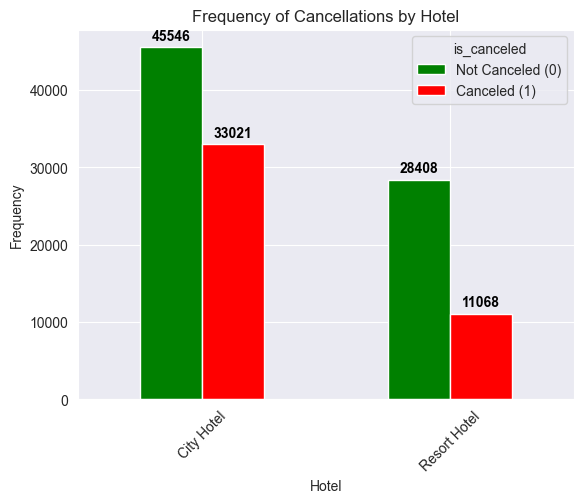

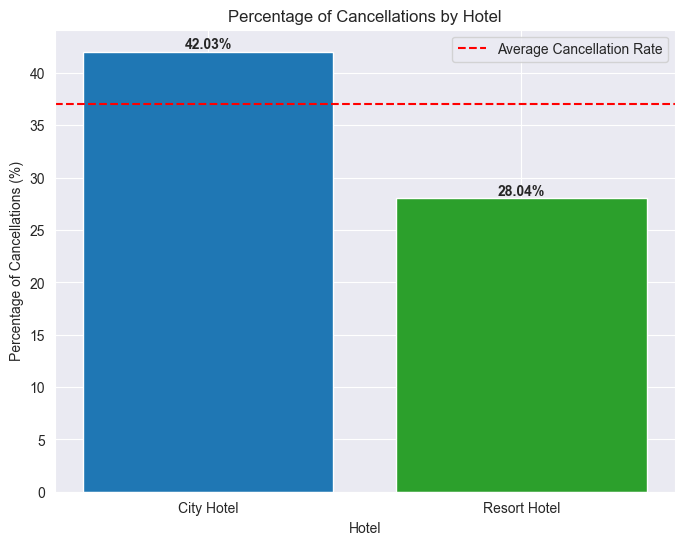

Hotel  Total Bookings  Total Cancellations  Cancellation Percentage  \
0    City Hotel           78567                33021                42.029096   
1  Resort Hotel           39476                11068                28.037288   

   Average Cancellation Rate  
0                  37.349949  
1                  37.349949

In [14]:
# Asumsikan dataframe df sudah ada dan memiliki kolom 'hotel' dan 'is_canceled'
# cancellation_by_hotel adalah hasil dari pengelompokan dataframe
cancellation_by_hotel = df.groupby(['hotel', 'is_canceled']).size().unstack()

# Membuat plot barchart
ax = cancellation_by_hotel.plot(kind='bar', stacked=False, color=['green', 'red'])

# Menambahkan judul dan label sumbu
plt.title('Frequency of Cancellations by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Frequency')

# Menampilkan legenda
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])

# Menambahkan frekuensi di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Asumsikan df adalah DataFrame yang sudah ada dan memiliki kolom 'hotel' dan 'is_canceled'
# cancellation_by_hotel adalah hasil dari pengelompokan dataframe
cancellation_by_hotel = df.groupby(['hotel', 'is_canceled']).size().unstack()

# Menghitung persentase pembatalan untuk setiap jenis hotel
cancellation_by_hotel_percentage = cancellation_by_hotel.div(cancellation_by_hotel.sum(axis=1), axis=0) * 100

# Membuat plot barchart
plt.figure(figsize=(8, 6))
bars = plt.bar(cancellation_by_hotel_percentage.index, cancellation_by_hotel_percentage[1], color=['#1f77b4', '#2ca02c'])

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = 37
plt.axhline(y=average_cancellation_rate, color='r', linestyle='--', label='Average Cancellation Rate')

# Menambahkan label dan judul
plt.xlabel('Hotel')
plt.ylabel('Percentage of Cancellations (%)')
plt.title('Percentage of Cancellations by Hotel')
plt.legend()

# Menambahkan persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Menampilkan plot
plt.show()

# Menghitung frekuensi pembatalan berdasarkan jenis hotel
cancellation_by_hotel = df.groupby('hotel')['is_canceled'].agg(['count', 'sum']).reset_index()
cancellation_by_hotel.columns = ['Hotel', 'Total Bookings', 'Total Cancellations']

# Menghitung persentase pembatalan
cancellation_by_hotel['Cancellation Percentage'] = (cancellation_by_hotel['Total Cancellations'] / cancellation_by_hotel['Total Bookings']) * 100

# Menghitung rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100

# Menambahkan rata-rata pembatalan ke tabel
cancellation_by_hotel['Average Cancellation Rate'] = average_cancellation_rate

# Menampilkan tabel
cancellation_by_hotel



Berdasarkan kedua *bar chart* di atas, dapat ditarik kesimpulan sebagai berikut:

1. **Tingkat Pembatalan di *City Hotel* Tinggi (42%)**
    * Tingkat pembatalan di *city hotel* lebih tinggi dibandingkan dengan *resort hotel*.  Hal ini dapat dipahami karena *city hotel* melayani berbagai keperluan bisnis dan rekreasi (*business and leisure hotel*, seperti yang dijelaskan [di sini](https://www.trustedstays.co.uk/blog/business-vs-leisure-travel)). Perjalanan bisnis seringkali mengalami perubahan rencana secara mendadak, yang menjelaskan mengapa tingkat pembatalan pada segmen ini cenderung lebih tinggi.
    * Selain itu, *city hotel* umumnya berlokasi di lingkungan yang lebih fleksibel dan berorientasi transit. Di area seperti ini, orang lebih mungkin mengubah rencana atau memesan beberapa hotel sekaligus untuk memastikan mendapatkan pilihan yang paling sesuai.

2. **Tingkat Pembatalan di *Resort Hotel* Rendah (28%)**
    * *Resort hotel* lebih ditujukan bagi wisatawan yang mencari relaksasi. Mereka cenderung tidak membatalkan pemesanan karena masa inap mereka sering kali direncanakan jauh hari sebagai bagian dari liburan atau perjalanan yang lebih besar.
    * Lebih lanjut, kebijakan pembatalan di *resort hotel* mungkin lebih ketat. Atau, wisatawan yang memilih *resort hotel* mungkin lebih berkomitmen pada rencana liburan mereka karena waktu dan upaya yang telah mereka curahkan untuk perencanaan.

3. **Total Pemesanan**
    * Meskipun *city hotel* memiliki volume pemesanan keseluruhan yang lebih tinggi, perlu diperhatikan bahwa sebagian besar pemesanan (hampir setengahnya) berakhir dengan pembatalan.
    * Sementara itu, *resort hotel* memiliki total pemesanan yang lebih sedikit, namun tingkat pembatalannya juga lebih rendah jika dibandingkan dengan *city hotel*.

---


#### **5.2.2 Bagaimana kaitan antara *market segment* dengan pembatalan pemesanan hotel?**

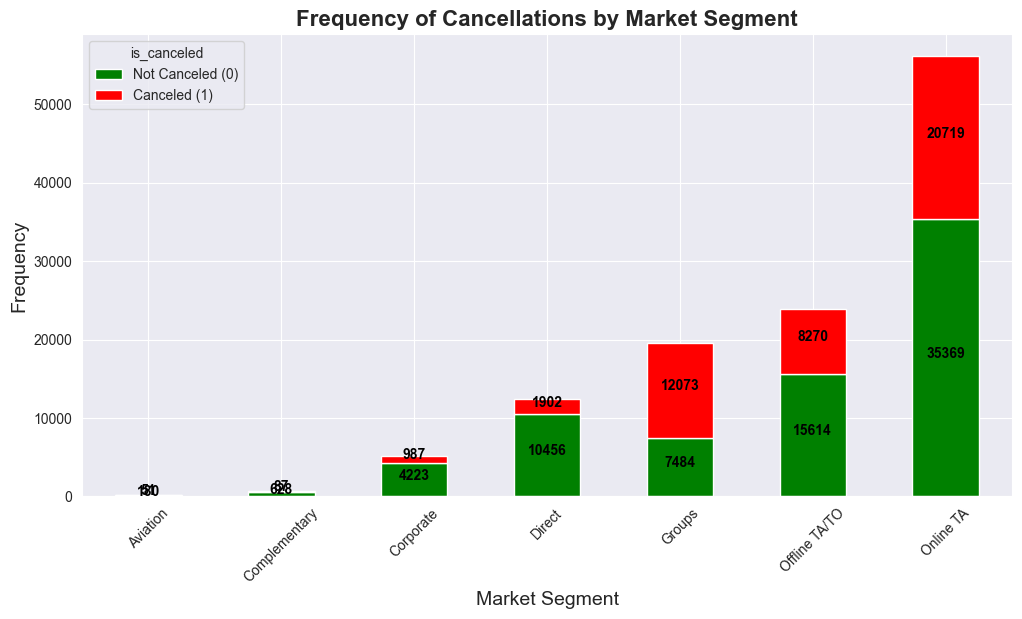

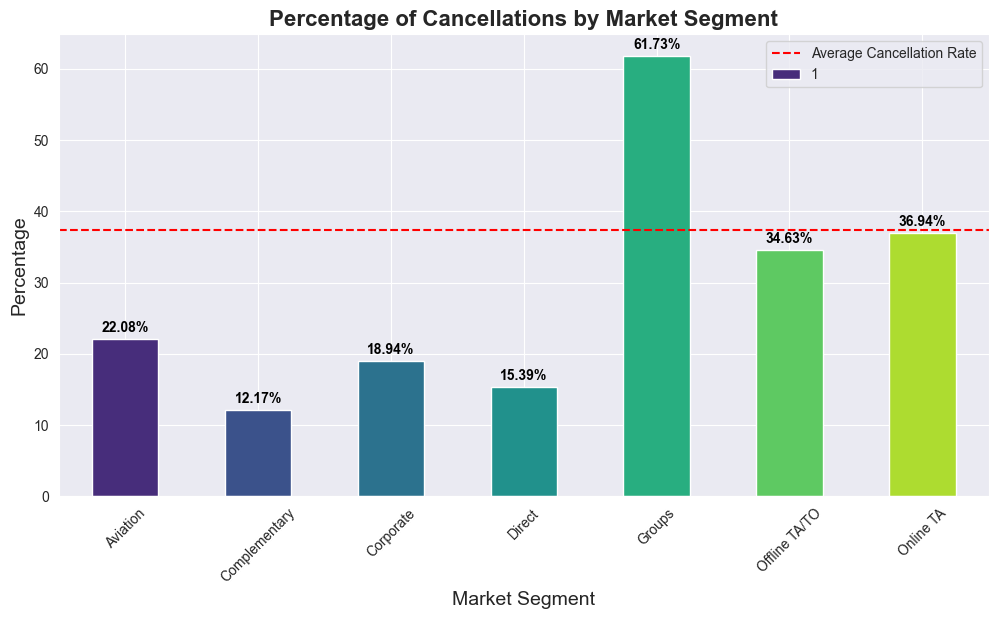

Hotel  Cancellation Rate (%)
0    City Hotel              42.029096
1  Resort Hotel              28.037288
2       Average              37.349949

In [20]:
# Menghitung frekuensi pembatalan berdasarkan market_segment
cancellation_by_segment = df.groupby(['market_segment', 'is_canceled']).size().unstack()

# Membuat plot stacked barchart
ax = cancellation_by_segment.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 6))

# Menambahkan judul dan label sumbu
plt.title('Frequency of Cancellations by Market Segment', fontsize=16, fontweight='bold')
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Menampilkan legenda
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])

# Menambahkan frekuensi di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues], label_type="center", padding=3, color="black", fontweight="bold")

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


# Menghitung frekuensi pembatalan berdasarkan market_segment
cancellation_by_segment = df.groupby(['market_segment', 'is_canceled']).size().unstack()

# Menghitung persentase pembatalan untuk setiap segmen pasar
cancellation_by_segment_percentage = cancellation_by_segment.div(cancellation_by_segment.sum(axis=1), axis=0) * 100

# Membuat plot barchart hanya untuk pembatalan
plt.figure(figsize=(12, 6))
ax = cancellation_by_segment_percentage[1].plot(kind='bar', color=sns.color_palette("viridis", len(cancellation_by_segment_percentage)), figsize=(12, 6))

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = 37.349948747490316
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Market Segment', fontsize=16, fontweight='bold')
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend()

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Menghitung rata-rata tingkat pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100

# Membuat tabel rata-rata tingkat pembatalan
average_cancellation_table = pd.DataFrame({
    'Hotel': ['City Hotel', 'Resort Hotel', 'Average'],
    'Cancellation Rate (%)': [
        cancellation_by_hotel.loc[cancellation_by_hotel['Hotel'] == 'City Hotel', 'Cancellation Percentage'].values[0],
        cancellation_by_hotel.loc[cancellation_by_hotel['Hotel'] == 'Resort Hotel', 'Cancellation Percentage'].values[0],
        average_cancellation_rate
    ]
})

# Menampilkan tabel
average_cancellation_table



Berdasarkan kedua *bar chart* di atas, dapat ditarik kesimpulan sebagai berikut:

1. **Pemesanan Grup Sangat Rentan terhadap Pembatalan (61,73%)**
    * Lebih dari enam dari sepuluh pemesanan grup dibatalkan. Perjalanan grup sering kali lebih kompleks dalam hal koordinasi, dan perubahan rencana dari satu anggota saja dapat menyebabkan pembatalan seluruh pemesanan grup.
    * Pihak hotel mungkin perlu menyesuaikan kebijakan pembatalan untuk pemesanan grup guna memitigasi risiko pembatalan yang tinggi ini.

2. **Tingkat Pembatalan Tinggi pada Pemesanan melalui *Online Travel Agent* (OTA) (36,94%)**
    * Pemesanan yang dilakukan melalui *Online Travel Agent* (OTA) memiliki kecenderungan lebih tinggi untuk dibatalkan dibandingkan dengan segmen lainnya. Kemungkinan besar, hal ini disebabkan karena OTA seringkali menawarkan opsi pembatalan yang lebih fleksibel.
    * Kondisi ini umum terjadi pada wisatawan yang mungkin memesan beberapa opsi akomodasi sekaligus, dan kemudian membatalkan beberapa di antaranya berdasarkan perubahan rencana atau apabila menemukan penawaran yang lebih menarik.

3. **Pemesanan `Langsung` (Direct Booking) Memiliki Tingkat Pembatalan Terendah (15,39%)**
    * Pemesanan langsung cenderung lebih andal, dengan tingkat pembatalan paling rendah. Hal ini mungkin disebabkan oleh kebijakan pembatalan yang kurang fleksibel atau tingkat komitmen yang lebih tinggi dari pelanggan yang memesan langsung melalui pihak hotel.

4. **Pemesanan melalui `Agen Perjalanan Offline/Operator Tur` (34,6%)**
    * Meskipun masih tergolong signifikan, tingkat pembatalan untuk pemesanan melalui agen perjalanan *offline* dan operator tur lebih rendah dibandingkan dengan platform *online*. Perbedaan ini mungkin disebabkan oleh persyaratan yang lebih ketat atau karena perjalanan yang dipesan melalui kanal *offline* umumnya lebih terstruktur dan direncanakan dengan lebih matang sebelumnya (perbandingan [antara *Online* vs *Offline*, Agen Perjalanan](https://www.rezgo.com/blog/advantages-and-disadvantages-of-online-travel-agencies-otas/)).

5. **Segmen Pasar `Corporate, Complementary, Aviation` Memiliki Frekuensi dan Tingkat Pembatalan yang Rendah**
    * Dengan tingkat pembatalan rendah padakategori Corporate, Complementary, Aviation. Kemungkinan besar mencerminkan metode pemesanan yang lebih khusus atau *niche*, di mana pembatalan jarang terjadi.



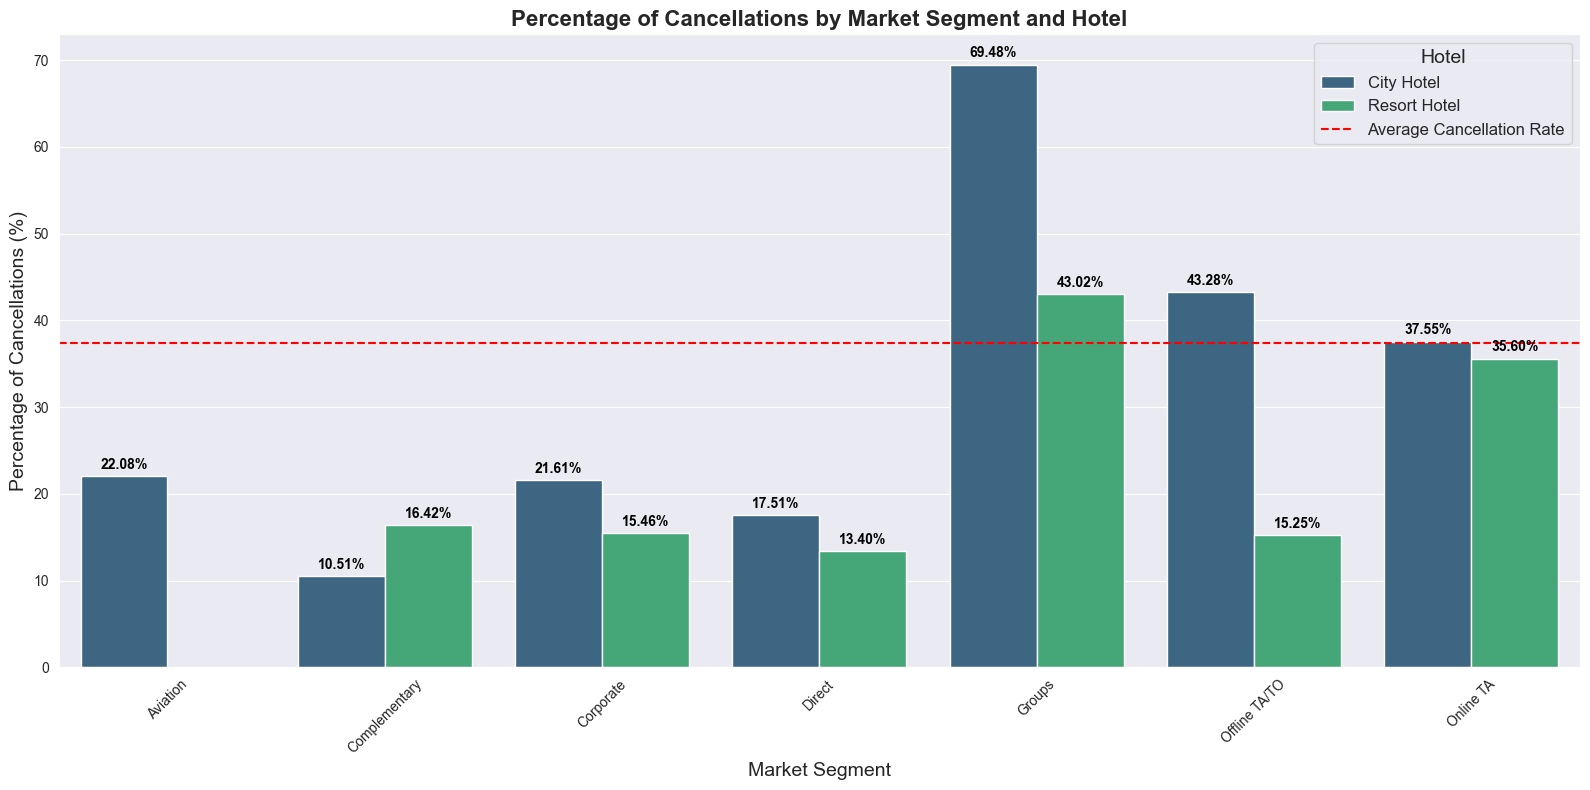

In [16]:
# Menghitung persentase pembatalan untuk setiap segmen pasar dan hotel
cancellation_by_segment_hotel = df.groupby(['market_segment', 'hotel', 'is_canceled']).size().unstack().reset_index()
cancellation_by_segment_hotel.columns.name = None
cancellation_by_segment_hotel['Total'] = cancellation_by_segment_hotel[0] + cancellation_by_segment_hotel[1]
cancellation_by_segment_hotel['% Canceled'] = (cancellation_by_segment_hotel[1] / cancellation_by_segment_hotel['Total']) * 100

# Membuat plot barchart
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cancellation_by_segment_hotel, x='market_segment', y='% Canceled', hue='hotel', palette='viridis')

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Market Segment and Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend(title='Hotel', fontsize=12, title_fontsize=14)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Jika dilihat berdasarkan persentase `market_segment` dan dikelompokkan berdasarkan jenis `hotel`, dapat ditarik kesimpulan sebagai berikut:

1. **Segmen Berisiko Tinggi: Pemesanan Grup Mengalami Pembatalan Signifikan di Hotel Kota**
   * Hotel Kota mencatatkan tingkat pembatalan tertinggi pada segmen Grup, yaitu sebesar 69,5%. Sementara itu, Hotel Resor memiliki tingkat pembatalan yang jauh lebih rendah pada segmen yang sama, yaitu 43,0%.  Perbandingan ini mengindikasikan bahwa pemesanan grup di Hotel Kota memiliki kemungkinan yang jauh lebih besar untuk dibatalkan dibandingkan dengan di Hotel Resor.

2. **Pola Pembatalan Serupa: Agen Perjalanan Offline dan Online Menunjukkan Tingkat Pembatalan yang Hampir Sama**
   * Agen Perjalanan Offline/Operator Tur menunjukkan tingkat pembatalan sebesar 43,3% untuk Hotel Kota dan 43,0% untuk Hotel Resor. Angka ini memperlihatkan kecenderungan pembatalan yang serupa pada segmen ini di kedua jenis hotel.
   * Agen Perjalanan Online memiliki tingkat pembatalan yang sedikit lebih rendah, yaitu 37,6% untuk Hotel Kota dan 35,6% untuk Hotel Resor. Meskipun demikian, tingkat pembatalan pada segmen ini masih tergolong tinggi.

3. **Segmen Andal: Pemesanan Langsung Membuktikan Tingkat Pembatalan Terendah**
   * Tingkat pembatalan untuk pemesanan langsung tercatat lebih rendah pada kedua jenis hotel, yaitu 17,5% untuk Hotel Kota dan 13,4% untuk Hotel Resor. Hal ini menandakan tingkat stabilitas yang lebih baik pada segmen pemesanan langsung.

4. **Risiko Moderat: Segmen Pasar Lain Menunjukkan Tingkat Pembatalan yang Cukup Seimbang**
   * Pada segmen pasar 'Lain', Hotel Kota memiliki tingkat pembatalan sebesar 20,1%, sementara Hotel Resor mencatatkan tingkat yang sedikit lebih rendah, yaitu 15,5%.


#### **5.2.3 Apakah perbedaan jenis *Distribution Channel* mempengaruhi pembatalan pemesanan hotel ?**


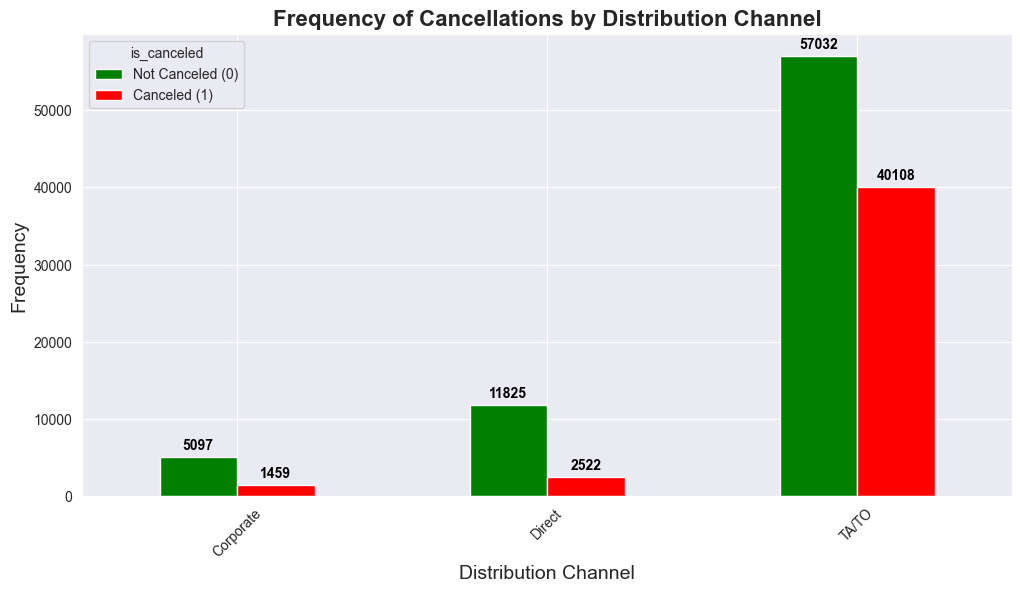

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/3804425626.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


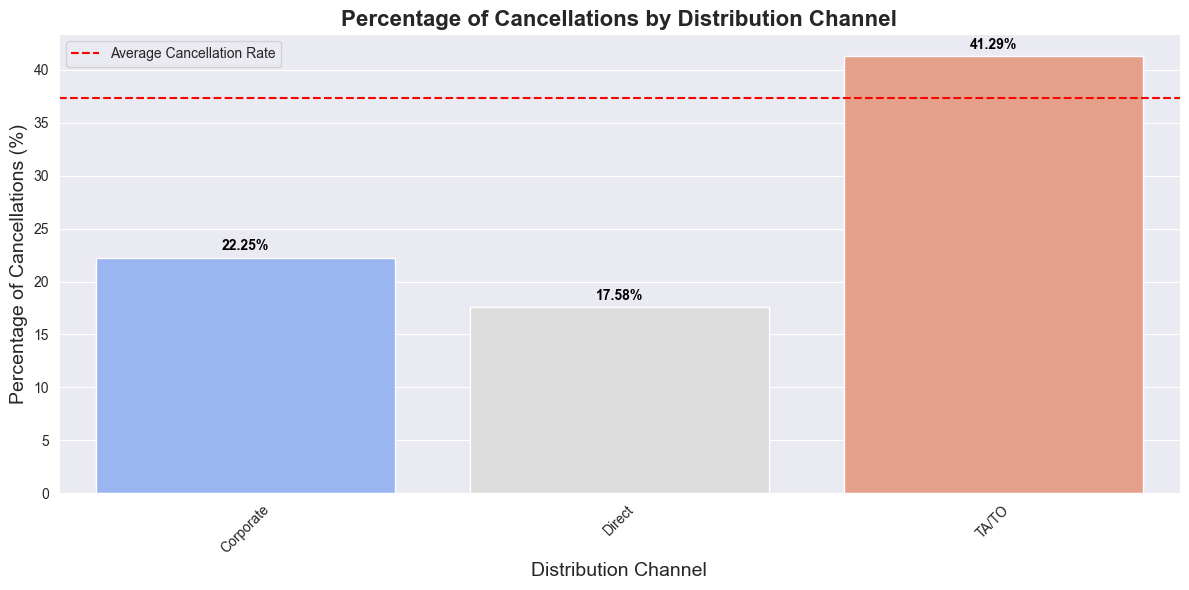

distribution_channel  Not Cancelled  Cancelled  Total  % Canceled  \
0            Corporate           5097       1459   6556   22.254423   
1               Direct          11825       2522  14347   17.578588   
2                TA/TO          57032      40108  97140   41.288861   

   Average Cancellation Rate  
0                  37.349949  
1                  37.349949  
2                  37.349949

In [17]:
# Menghitung frekuensi pembatalan berdasarkan distribution_channel
cancellation_by_channel = df.groupby(['distribution_channel', 'is_canceled']).size().unstack()

# Membuat plot barchart
ax = cancellation_by_channel.plot(kind='bar', stacked=False, color=['green', 'red'], figsize=(12, 6))

# Menambahkan judul dan label sumbu
plt.title('Frequency of Cancellations by Distribution Channel', fontsize=16, fontweight='bold')
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Menampilkan legenda
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])

# Menambahkan frekuensi di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Menghitung persentase pembatalan untuk setiap distribution channel
cancellation_by_channel_percentage = cancellation_by_channel.div(cancellation_by_channel.sum(axis=1), axis=0) * 100

# Membuat plot barchart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=cancellation_by_channel_percentage.reset_index(), 
    x='distribution_channel', 
    y=1, 
    palette='coolwarm'  # Mengubah warna bar dengan palet 'coolwarm'
)

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Distribution Channel', fontsize=16, fontweight='bold')
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend()

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menghitung frekuensi pembatalan berdasarkan distribution_channel
cancellation_by_channel = df.groupby(['distribution_channel', 'is_canceled']).size().unstack().reset_index()
cancellation_by_channel.columns.name = None
cancellation_by_channel.columns = ['distribution_channel', 'Not Cancelled', 'Cancelled']
cancellation_by_channel['Total'] = cancellation_by_channel['Not Cancelled'] + cancellation_by_channel['Cancelled']

# Menghitung persentase pembatalan untuk setiap distribution channel
cancellation_by_channel['% Canceled'] = (cancellation_by_channel['Cancelled'] / cancellation_by_channel['Total']) * 100

# Menghitung rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100

# Menambahkan rata-rata pembatalan ke tabel
cancellation_by_channel['Average Cancellation Rate'] = average_cancellation_rate

# Menampilkan tabel
cancellation_by_channel


Berdasarkan kedua *bar chart* di atas, dapat ditarik kesimpulan sebagai berikut:

1. **Tingkat Pembatalan Tinggi pada Pemesanan melalui `Agen Perjalanan/Operator Tur`**
    * Volume pembatalan yang tinggi (41,3%) pada kanal ini mungkin disebabkan oleh fleksibilitas yang umumnya ditawarkan oleh agen perjalanan serta platform pihak ketiga. Pelanggan seringkali memiliki opsi pembatalan yang lebih mudah, terutama jika dilakukan secara *online* (perlu diingat bahwa `Agen Perjalanan/Operator Tur`, seperti dijelaskan [di sini](https://mize.tech/blog/the-battle-of-booking-otas-vs-traditional-travel-agents/), dapat berupa platform pemesanan *online* maupun *offline*).
    * Selain itu, pelanggan mungkin juga cenderung memesan beberapa opsi akomodasi sekaligus dan kemudian melakukan pembatalan berdasarkan perubahan rencana atau jika mereka menemukan penawaran yang lebih menarik.

2. **Pemesanan `Korporat` Memiliki Tingkat Pembatalan Sedang**
    * Dengan tingkat pembatalan sebesar 22,3%, pemesanan `Korporat` kemungkinan mencerminkan adanya perubahan dalam rencana perjalanan bisnis. Tingkat pembatalan ini memang lebih rendah dibandingkan dengan melalui `Agen Perjalanan`, yang mungkin disebabkan karena perjalanan bisnis umumnya lebih terstruktur. Namun, tingkat pembatalan yang relatif tinggi ini tetap mengindikasikan adanya penyesuaian atau pembatalan yang dilakukan pada menit-menit terakhir akibat perubahan jadwal korporat.

3. **Pemesanan `Langsung` Paling Andal**
    * Tingkat pembatalan untuk pemesanan secara `Langsung` adalah yang terendah, yaitu hanya 17,6%. Pelanggan yang memesan secara langsung cenderung memiliki komitmen yang lebih kuat, dan **kebijakan pembatalan** untuk pemesanan `Langsung` umumnya **lebih ketat** (seperti yang dijelaskan mengenai [Kebijakan Pembatalan](https://www.littlehotelier.com/blog/running-your-property/hotel-cancellation-policy/)).
    * Kanal `Langsung` seringkali menawarkan program loyalitas, opsi *non-refundable*, atau berbagai insentif lain yang membuat pelanggan lebih cenderung untuk mempertahankan reservasi mereka.


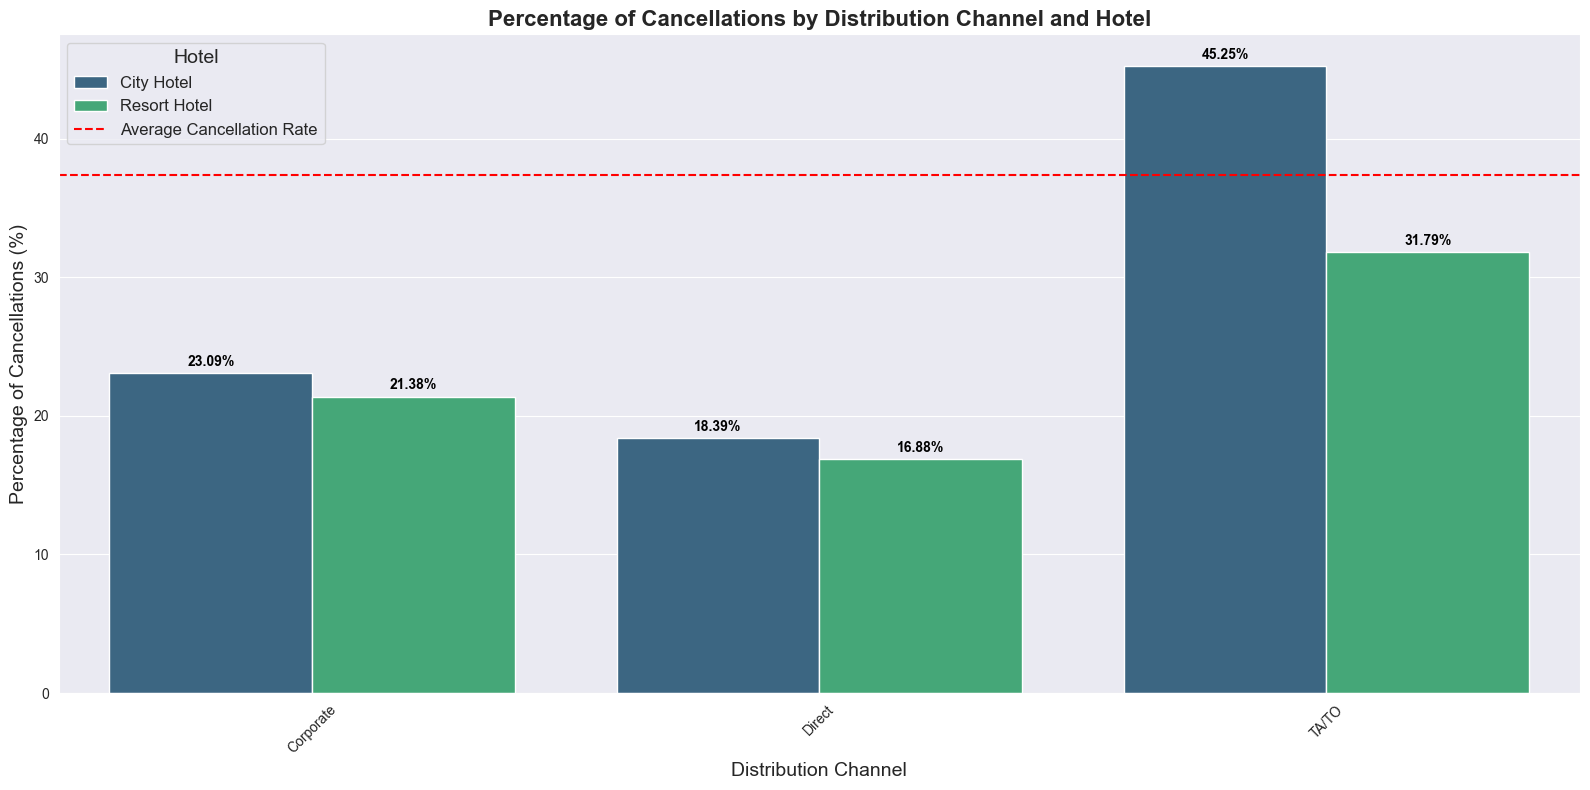

In [18]:
# Menghitung persentase pembatalan untuk setiap distribution channel dan hotel
cancellation_by_channel_hotel = df.groupby(['distribution_channel', 'hotel', 'is_canceled']).size().unstack().reset_index()
cancellation_by_channel_hotel.columns.name = None
cancellation_by_channel_hotel['Total'] = cancellation_by_channel_hotel[0] + cancellation_by_channel_hotel[1]
cancellation_by_channel_hotel['% Canceled'] = (cancellation_by_channel_hotel[1] / cancellation_by_channel_hotel['Total']) * 100

# Membuat plot barchart
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cancellation_by_channel_hotel, x='distribution_channel', y='% Canceled', hue='hotel', palette='viridis')

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Distribution Channel and Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend(title='Hotel', fontsize=12, title_fontsize=14)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan analisis persentase `distribution_channel` dan jenis `hotel`, dapat ditarik beberapa kesimpulan penting mengenai tingkat pembatalan pemesanan:

1.  **Hotel Kota (*City Hotel*) Cenderung Memiliki Tingkat Pembatalan Lebih Tinggi di Semua Kanal Distribusi:**
    *   `City Hotel` secara konsisten menunjukkan **tingkat pembatalan yang lebih tinggi** dibandingkan `Resort Hotel` di semua kanal pemesanan.
    *   Perbedaan paling signifikan terlihat pada kanal **`Travel Agent/Tour Operators`**, mengindikasikan **volatilitas yang lebih besar** pada kanal ini untuk `City Hotel`.
    *   **Kemungkinan penyebab:** Pemesanan `City Hotel` mungkin lebih fleksibel dan rentan dibatalkan karena faktor seperti perjalanan bisnis, acara, atau preferensi pelanggan untuk memesan di beberapa hotel sekaligus sebelum keputusan final.

2.  **Kanal `Travel Agents/Tour Operators` Menunjukkan Perbedaan Tingkat Pembatalan Terbesar Antara Hotel Kota dan Hotel Resor:**
    *   Kesenjangan tingkat pembatalan yang **signifikan** antara `City Hotel` dan `Resort Hotel` pada kanal `Travel Agent/Tour Operators` menyoroti **kerentanan** `City Hotel` terhadap pembatalan melalui metode pemesanan ini.
    *   Hal ini mungkin mencerminkan **sifat pemesanan jangka pendek** atau **fleksibel** melalui agen perjalanan/operator tur, terutama untuk perjalanan yang terkait acara, bisnis, atau wisata yang lebih mudah dibatalkan atau dimodifikasi.

3.  **Pemesanan melalui Kanal `Corporate` dan `Direct` Lebih Stabil dengan Tingkat Pembatalan Rendah:**
    *   Kanal `Corporate` dan `Direct` menunjukkan **tingkat pembatalan yang relatif rendah** untuk kedua jenis hotel.
    *   Pemesanan `Direct` bahkan teridentifikasi sebagai **kanal yang paling stabil dan dapat diandalkan** untuk `City Hotel` dan `Resort Hotel`.
    *   **Kemungkinan penyebab:**  Kestabilan ini mencerminkan karakteristik perjalanan bisnis yang lebih terencana dan komitmen yang lebih tinggi pada pemesanan langsung. Insentif seperti **tarif non-refundable** atau **program loyalitas** pada pemesanan langsung juga dapat berperan dalam mengurangi tingkat pembatalan.



#### **5.2.4 Apakah ada perbedaan signifikan dalam tingkat pembatalan antara tamu yang menerima tipe kamar sesuai pesanan dan tamu yang tidak?**


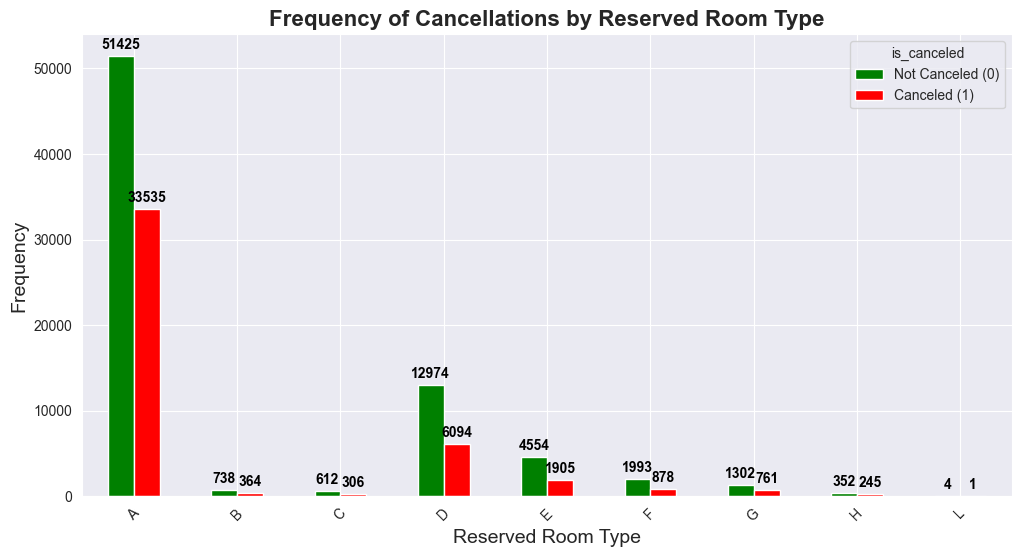

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/4143165272.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


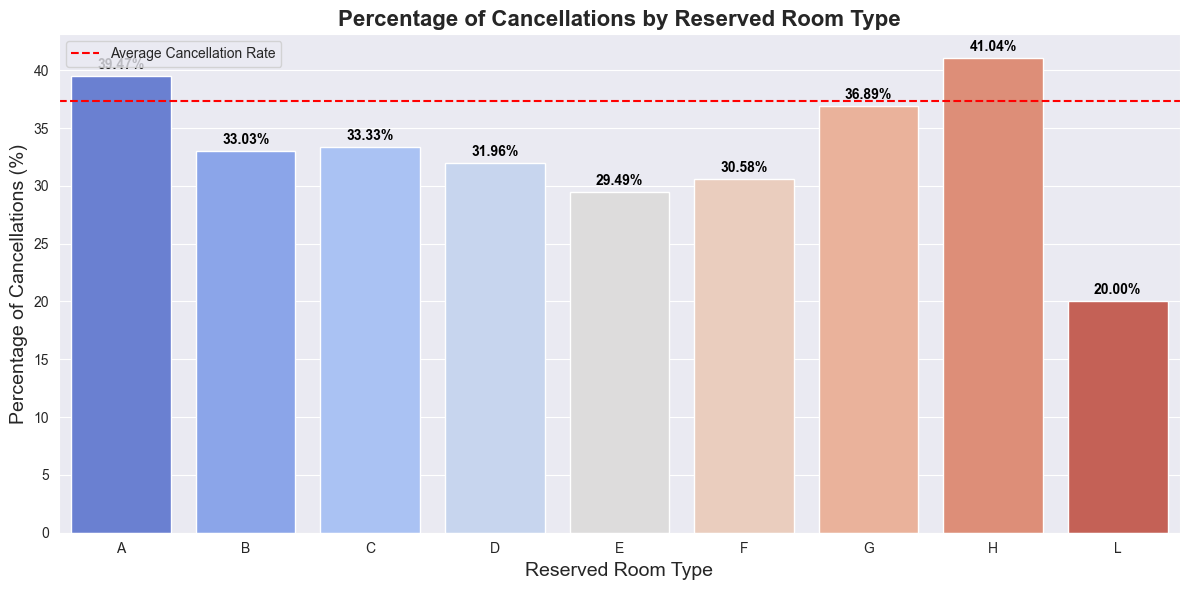

In [19]:
# Menghitung frekuensi pembatalan berdasarkan reserved_room_type
cancellation_by_room_type = df.groupby(['reserved_room_type', 'is_canceled']).size().unstack()

# Membuat plot barchart
ax = cancellation_by_room_type.plot(kind='bar', stacked=False, color=['green', 'red'], figsize=(12, 6))

# Menambahkan judul dan label sumbu
plt.title('Frequency of Cancellations by Reserved Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Reserved Room Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Menampilkan legenda
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])

# Menambahkan frekuensi di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Calculate the percentage of cancellations for each reserved room type
cancellation_by_room_type_percentage = cancellation_by_room_type.div(cancellation_by_room_type.sum(axis=1), axis=0) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=cancellation_by_room_type_percentage.reset_index(), 
    x='reserved_room_type', 
    y=1, 
    palette='coolwarm'  # Mengubah warna bar dengan palet 'coolwarm'
)

# Add a line for the average cancellation rate
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Add title and labels
plt.title('Percentage of Cancellations by Reserved Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Reserved Room Type', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Berdasarkan analisis dari *bar chart*, dapat ditarik kesimpulan berikut mengenai tingkat pembatalan pemesanan berdasarkan tipe kamar:

1.  **Tipe Kamar A: Tingkat Pembatalan Tertinggi Meskipun Paling Populer:**
    *   **Tingkat Pembatalan Tinggi:** Tipe Kamar A memiliki tingkat pembatalan **relatif tinggi** sebesar **39,5%**, meskipun merupakan tipe kamar dengan **volume pemesanan terbesar**.
    *   **Interpretasi:** Tingkat pembatalan yang tinggi pada Tipe Kamar A, meski populer, mengindikasikan bahwa banyak tamu **memesan tipe kamar ini dengan fleksibilitas tinggi**,  kemungkinan untuk mengakomodasi perubahan rencana, mencari ketersediaan yang lebih baik di tempat lain, atau alasan lainnya.
    *   **Rekomendasi:** Hotel disarankan untuk **memfokuskan strategi pengurangan pembatalan** pada Tipe Kamar A, mempertimbangkan penyesuaian kebijakan pembatalan atau menawarkan insentif untuk meningkatkan komitmen pemesanan.

2.  **Tipe Kamar D dan E: Tingkat Pembatalan Menengah dan Lebih Stabil:**
    *   **Tingkat Pembatalan Menengah:** Tipe Kamar D (32%) dan Tipe Kamar E (29,5%) menunjukkan tingkat pembatalan yang **lebih rendah** dibandingkan Tipe Kamar A.
    *   **Interpretasi:**  Meskipun tingkat pembatalan tetap signifikan, Tipe Kamar D dan E menunjukkan **stabilitas pemesanan yang lebih baik** dibandingkan Tipe Kamar A, menandakan komitmen pemesanan yang lebih kuat.

3.  **Tipe Kamar H: *Outlier* dengan Tingkat Pembatalan Sangat Tinggi Namun Volume Rendah:**
    *   **Tingkat Pembatalan Tertinggi Namun Tidak Representatif:** Tipe Kamar H memiliki tingkat pembatalan **tertinggi (41%)**, tetapi dengan **volume pemesanan total yang sangat rendah**.
    *   **Interpretasi:** Tingkat pembatalan tinggi pada Tipe Kamar H kemungkinan **kurang representatif sebagai tren umum** karena volume pemesanan yang minim. Hal ini mungkin disebabkan oleh **kondisi khusus** atau **situasi pemesanan yang unik** untuk tipe kamar ini, bukan pola pembatalan yang konsisten.

4.  **Tipe Kamar L: Tingkat Pembatalan Terendah dan Paling Andal:**
    *   **Tingkat Pembatalan Terendah:** Tipe Kamar L menunjukkan tingkat pembatalan **terendah (20%)** di antara semua tipe kamar.
    *   **Interpretasi:** Meskipun volume pemesanan Tipe Kamar L **lebih rendah**, tingkat pembatalan yang rendah mengindikasikan **tingkat komitmen pemesanan yang sangat tinggi** dari tamu yang memilih tipe kamar ini. Kemungkinan tamu yang memesan Tipe Kamar L merasakan **nilai lebih besar** atau memiliki **kebutuhan spesifik** yang membuat mereka lebih yakin dengan pemesanan.
    *   **Potensi Peluang:** Tingkat pembatalan rendah pada Tipe Kamar L dapat menjadi indikasi **peluang untuk memaksimalkan pendapatan** dari tipe kamar ini, misalnya melalui strategi *upselling* atau promosi target.


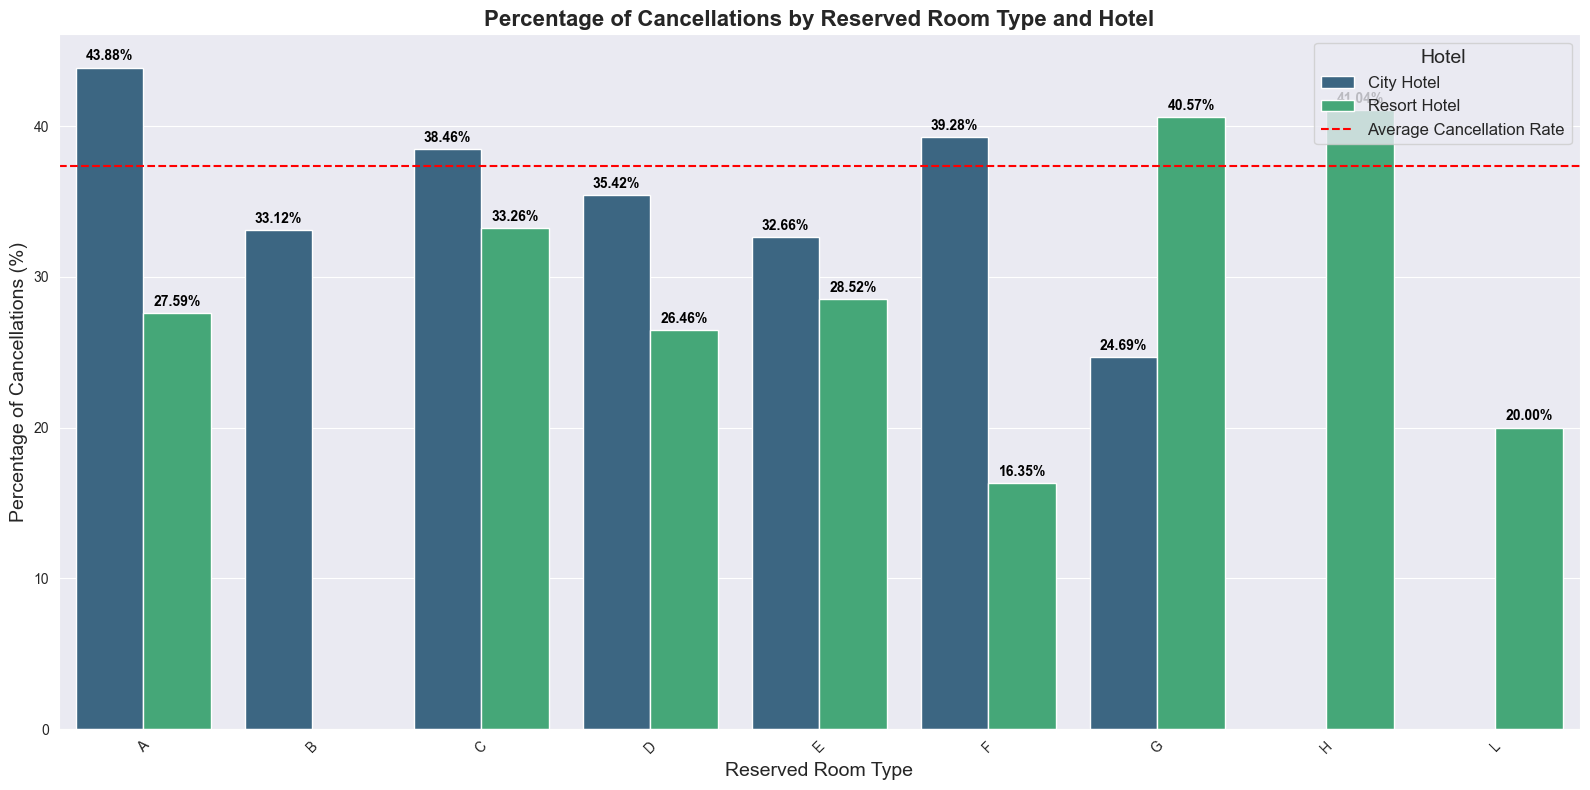

In [20]:
# Menghitung persentase pembatalan untuk setiap reserved room type dan hotel
cancellation_by_room_type_hotel = df.groupby(['reserved_room_type', 'hotel', 'is_canceled']).size().unstack().reset_index()
cancellation_by_room_type_hotel.columns.name = None
cancellation_by_room_type_hotel['Total'] = cancellation_by_room_type_hotel[0] + cancellation_by_room_type_hotel[1]
cancellation_by_room_type_hotel['% Canceled'] = (cancellation_by_room_type_hotel[1] / cancellation_by_room_type_hotel['Total']) * 100

# Membuat plot barchart
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cancellation_by_room_type_hotel, x='reserved_room_type', y='% Canceled', hue='hotel', palette='viridis')

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Reserved Room Type and Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Reserved Room Type', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend(title='Hotel', fontsize=12, title_fontsize=14)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan data persentase `reserved_room_type` dan klasifikasi `hotel`, beberapa kesimpulan penting dapat ditarik mengenai tingkat pembatalan:

1.  **Hotel Kota Cenderung Memiliki Tingkat Pembatalan Lebih Tinggi**:
    *   Secara umum, **Hotel Kota** memperlihatkan tingkat pembatalan yang lebih tinggi dibandingkan **Hotel Resor** untuk sebagian besar tipe kamar yang tersedia.
    *   **Tipe Kamar A** menjadi contoh utama, dengan tingkat pembatalan tertinggi di Hotel Kota mencapai **43,9%**, jauh melebihi **27,6%** di Hotel Resor.
    *   Fenomena ini mengindikasikan bahwa **Hotel Kota**, yang seringkali mengakomodasi kebutuhan perjalanan bisnis dan preferensi fleksibilitas tamu, lebih sering menghadapi pembatalan pemesanan.

2.  **Perbedaan Pembatalan Terbesar Terlihat pada Tipe Kamar F dan A**:
    *   **Tipe Kamar F** mencatat tingkat pembatalan signifikan di **Hotel Kota**, yaitu **39,3%**, dibandingkan dengan hanya **16,3%** di **Hotel Resor**.
    *   **Tipe Kamar A** juga mengikuti tren serupa, dengan tingkat pembatalan yang lebih tinggi di Hotel Kota. Hal ini kemungkinan disebabkan oleh tingginya permintaan untuk tipe kamar ini di hotel kota serta perilaku pemesanan yang lebih fleksibel dari tamu.

3.  **Hotel Resor Menunjukkan Stabilitas Pembatalan yang Lebih Baik**:
    *   **Hotel Resor** pada umumnya menunjukkan tingkat pembatalan yang lebih rendah dan lebih stabil dibandingkan Hotel Kota.
    *   Terutama untuk tipe kamar seperti **Tipe Kamar F**, tingkat pembatalan di Hotel Resor cenderung lebih stabil dan rendah. Hal ini mungkin disebabkan oleh karakteristik pemesanan untuk tujuan liburan yang umumnya lebih terencana dan memiliki komitmen yang lebih kuat.

4.  **Tingkat Pembatalan Hampir Nol atau Sangat Rendah pada Tipe Kamar B, H, dan L di Hotel Resor**:
    *   **Tipe Kamar B, H, dan L** di **Hotel Resor** menunjukkan tingkat pembatalan yang mendekati nol atau sangat rendah.
    *   Ini mengisyaratkan tingkat komitmen pemesanan yang sangat tinggi untuk tipe-tipe kamar tersebut ketika dipesan di Hotel Resor.


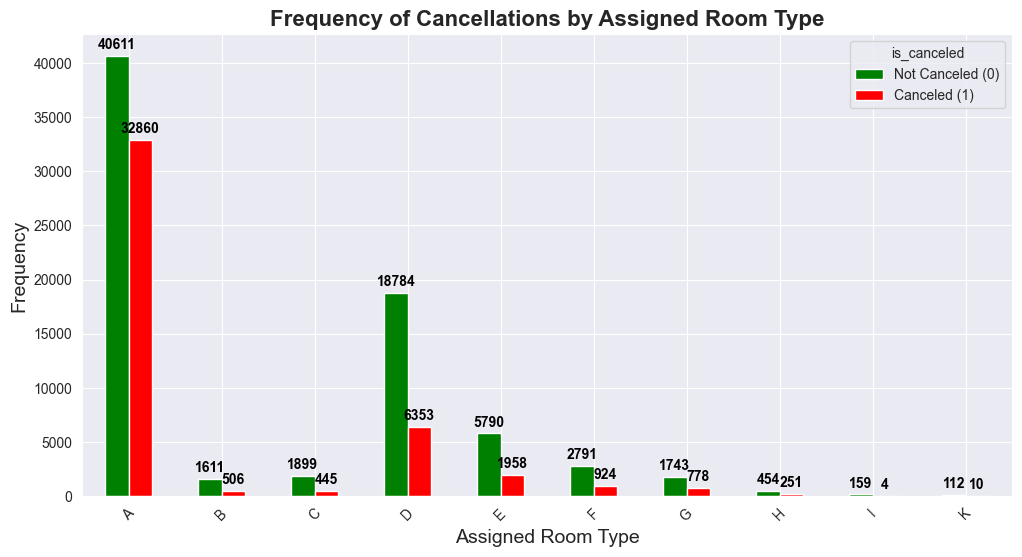

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/3047727550.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


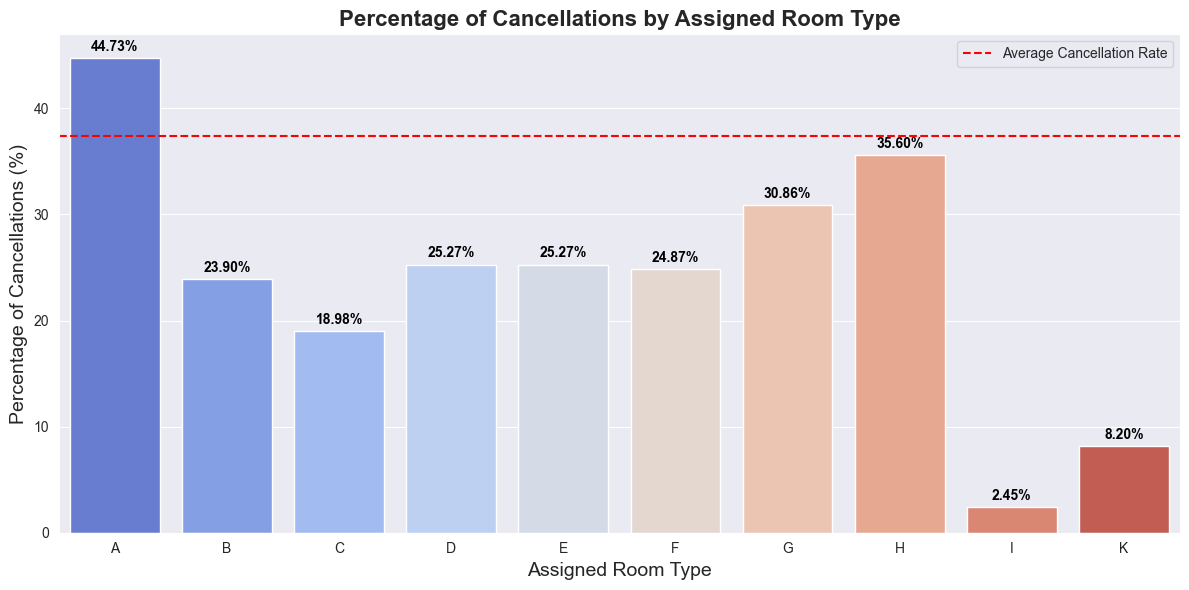

In [21]:
# Menghitung frekuensi pembatalan berdasarkan assigned_room_type
cancellation_by_assigned_room_type = df.groupby(['assigned_room_type', 'is_canceled']).size().unstack()

# Membuat plot barchart
ax = cancellation_by_assigned_room_type.plot(kind='bar', stacked=False, color=['green', 'red'], figsize=(12, 6))

# Menambahkan judul dan label sumbu
plt.title('Frequency of Cancellations by Assigned Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Assigned Room Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Menampilkan legenda
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])

# Menambahkan frekuensi di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Calculate the percentage of cancellations for each assigned room type
cancellation_by_assigned_room_type_percentage = cancellation_by_assigned_room_type.div(cancellation_by_assigned_room_type.sum(axis=1), axis=0) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=cancellation_by_assigned_room_type_percentage.reset_index(), 
    x='assigned_room_type', 
    y=1, 
    palette='coolwarm'  # Change the color palette
)

# Add a line for the average cancellation rate
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Add title and labels
plt.title('Percentage of Cancellations by Assigned Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Assigned Room Type', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Berdasarkan kedua *bar chart* di atas, beberapa kesimpulan penting dapat ditarik terkait tingkat pembatalan untuk berbagai tipe kamar:

1.  **Tipe Kamar A Menunjukkan Volatilitas yang Tinggi**:
    *   Dengan frekuensi pemesanan paling tinggi dan tingkat pembatalan 44,7%, Tipe Kamar A menunjukkan volatilitas yang signifikan. Hal ini bisa jadi akibat dari strategi overbooking atau fungsinya sebagai kamar alternatif saat kamar lain tidak tersedia.

2.  **Tipe Kamar D, E, dan F Cenderung Relatif Stabil**:
    *   **Tipe Kamar D, E, dan F** menunjukkan tingkat pembatalan yang moderat, berkisar di angka **25%**.
    *   Dibandingkan dengan Tipe Kamar A, ketiga tipe kamar ini memperlihatkan volatilitas pemesanan yang lebih rendah dan cenderung lebih stabil. Namun, tingkat pembatalan yang masih signifikan mengindikasikan bahwa penerapan kebijakan pembatalan yang lebih ketat atau pemberian insentif bagi tamu untuk mempertahankan pemesanan mungkin akan memberikan manfaat.

3.  **Tingkat Pembatalan Rendah pada Tipe Kamar I dan K**:
    *   **Tipe Kamar I** dan **Tipe Kamar K** memiliki tingkat pembatalan yang sangat rendah, masing-masing sebesar **2,5%** untuk Tipe Kamar I dan **8,2%** untuk Tipe Kamar K.
    *   Hal ini menunjukkan bahwa tamu yang memilih tipe kamar ini memiliki kecenderungan yang lebih kuat untuk mempertahankan reservasi mereka. Kemungkinan, hal ini disebabkan oleh fitur unik yang ditawarkan oleh tipe kamar ini atau karena tipe kamar ini menarik segmen tamu yang lebih berkomitmen.

4.  **Tipe Kamar G dan H Menunjukkan Risiko Pembatalan yang Lebih Tinggi**:
    *   Meskipun memiliki volume pemesanan yang lebih rendah dibandingkan Tipe Kamar A, **Tipe Kamar G** (**35,6%**) dan **Tipe Kamar H** (**30,9%**) menunjukkan tingkat pembatalan yang relatif tinggi.
    *   Tipe kamar ini mungkin termasuk kategori kamar premium atau kamar spesialis. Tingkat pembatalan yang tinggi dapat mencerminkan fleksibilitas rencana pemesanan yang terkait dengan tipe kamar ini, atau mungkin mengindikasikan bahwa tipe kamar ini lebih menarik bagi tamu yang memiliki kemungkinan perubahan rencana yang lebih besar.


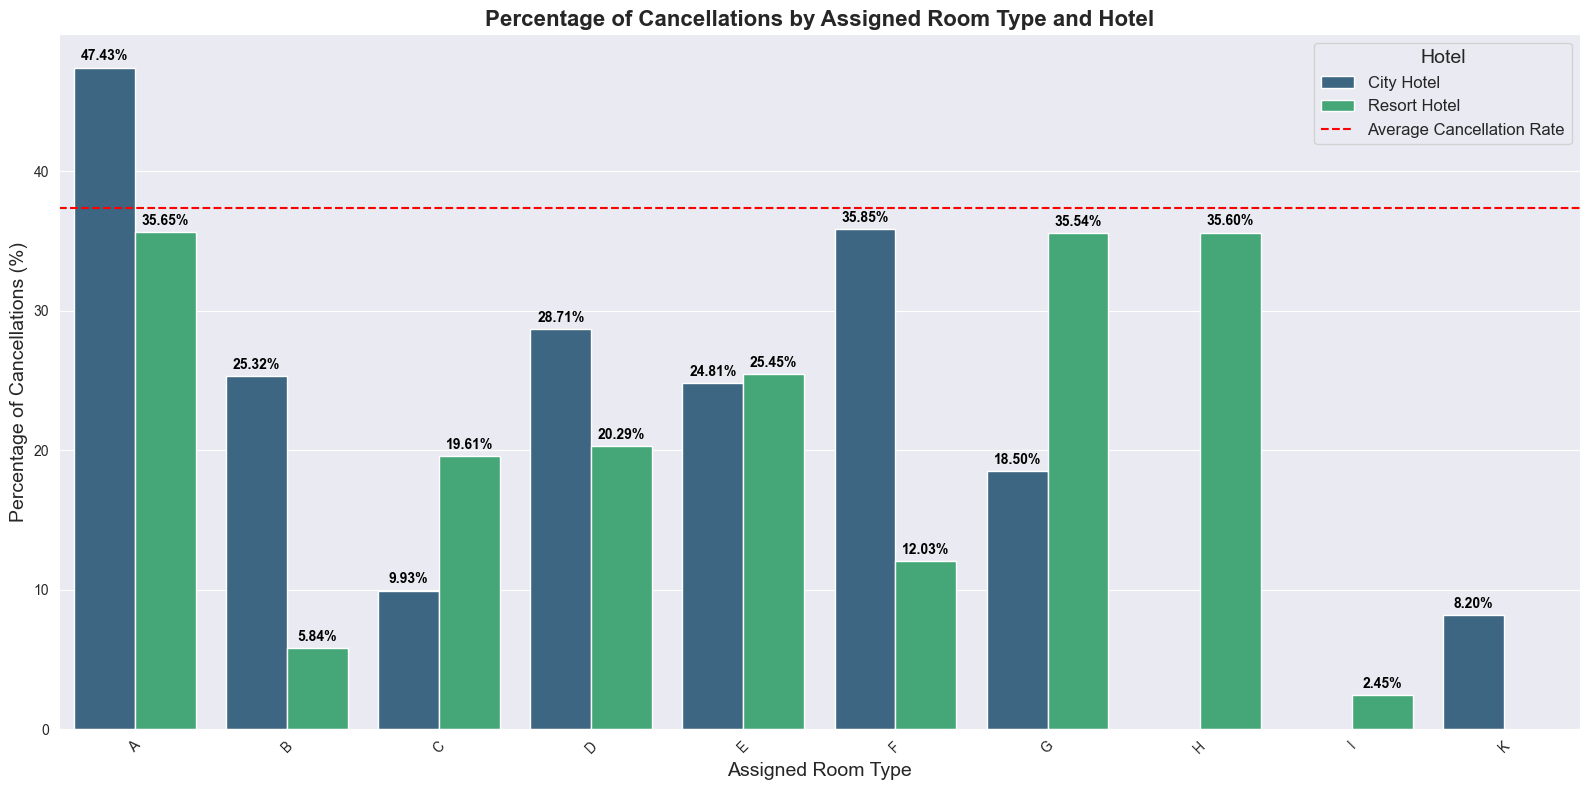

In [22]:
# Menghitung persentase pembatalan untuk setiap assigned room type dan hotel
cancellation_by_assigned_room_type_hotel = df.groupby(['assigned_room_type', 'hotel', 'is_canceled']).size().unstack().reset_index()
cancellation_by_assigned_room_type_hotel.columns.name = None
cancellation_by_assigned_room_type_hotel['Total'] = cancellation_by_assigned_room_type_hotel[0] + cancellation_by_assigned_room_type_hotel[1]
cancellation_by_assigned_room_type_hotel['% Canceled'] = (cancellation_by_assigned_room_type_hotel[1] / cancellation_by_assigned_room_type_hotel['Total']) * 100

# Membuat plot barchart
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cancellation_by_assigned_room_type_hotel, x='assigned_room_type', y='% Canceled', hue='hotel', palette='viridis')

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Assigned Room Type and Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Assigned Room Type', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend(title='Hotel', fontsize=12, title_fontsize=14)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Berdasarkan persentase `assigned_room_type` dan pembagian `hotel`, dapat ditarik beberapa kesimpulan sebagai berikut:

1.  **Hotel Kota Menunjukkan Tingkat Pembatalan yang Lebih Tinggi pada Sebagian Besar Tipe Kamar**:
    *   Secara umum, **Hotel Kota** memiliki kecenderungan tingkat pembatalan yang lebih tinggi, terutama terlihat pada **Tipe Kamar A dan F**.
    *   Tipe kamar ini menghadapi **volatilitas yang lebih besar**, yang kemungkinan disebabkan oleh **rencana perjalanan tamu yang lebih fleksibel** atau **tingkat persaingan yang lebih ketat** untuk tipe kamar tersebut.

2.  **Stabilitas Tipe Kamar Tertentu Lebih Menonjol di Hotel Resor**:
    *   **Tipe Kamar B, C, dan F** menunjukkan **stabilitas yang jauh lebih baik di Hotel Resor**. Tingkat pembatalan untuk tipe kamar-kamar ini lebih rendah dibandingkan di Hotel Kota.
    *   Hal ini mengindikasikan adanya **pemesanan yang lebih berkomitmen** di Hotel Resor, yang besar kemungkinan berkaitan dengan **kunjungan yang berorientasi pada liburan**.

3.  **Tren Pembatalan yang Berbeda pada Tipe Kamar G**:
    *   **Tipe Kamar G** memperlihatkan **tren yang berkebalikan**. **Hotel Resor justru mengalami tingkat pembatalan yang lebih tinggi** (**35,5%**) dibandingkan dengan Hotel Kota (**18,5%**).
    *   Fenomena ini bisa menandakan bahwa tipe kamar ini di resor **lebih sering dibatalkan**, mungkin akibat **praktik *overbooking*** atau **perubahan preferensi tamu setelah melakukan pemesanan awal**.

4.  **Pemesanan yang Stabil pada Tipe Kamar I dan K**:
    *   **Tipe Kamar I dan K** memiliki **tingkat pembatalan terendah**. **Tipe Kamar I** hanya mencatat **2,5%** pembatalan di Hotel Resor, sementara **Tipe Kamar K** menunjukkan **8,2%** di Hotel Kota.
    *   Ini mengisyaratkan bahwa tipe kamar-kamar ini mungkin merupakan **tipe kamar khusus (*niche*)** atau lebih menarik bagi **tamu yang memiliki rencana perjalanan yang lebih pasti**.


#### **5.2.5 Apakah *Booking Changes* dan *Deposit Type* memengaruhi pembatalan hotel?**



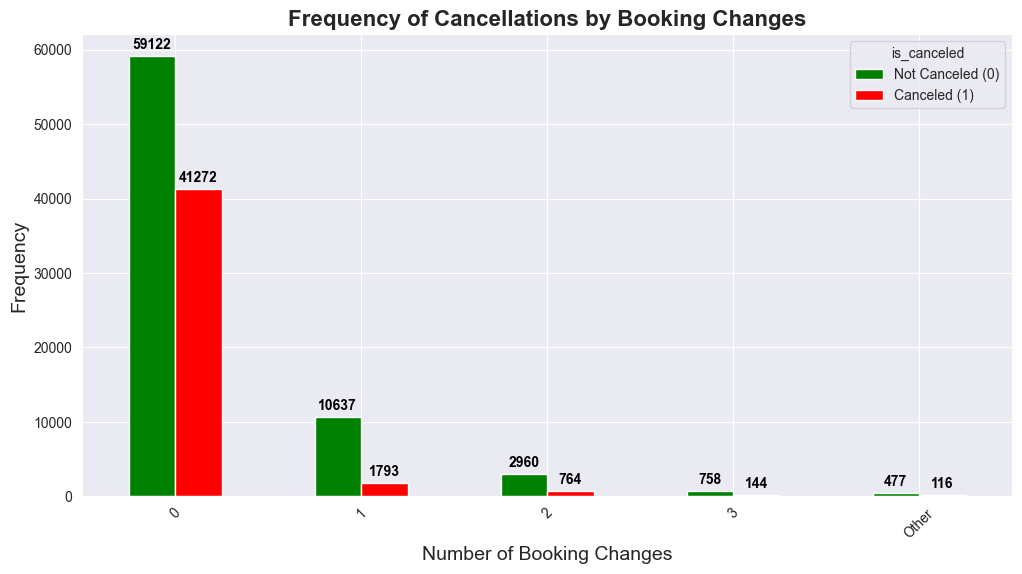

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/822648348.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


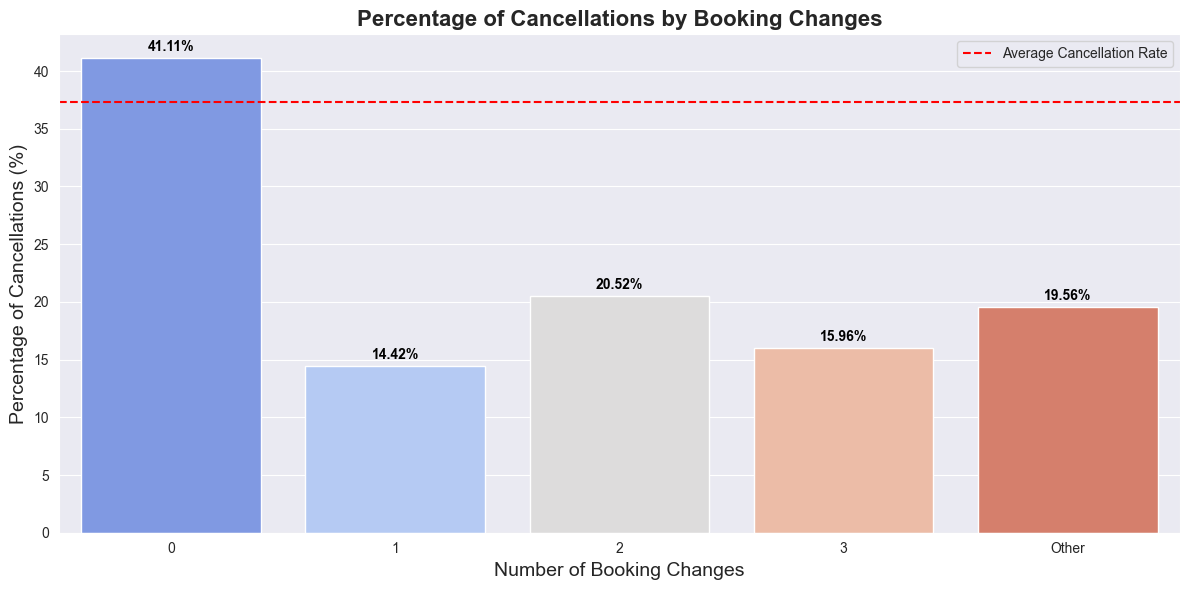

In [23]:
# Menghitung frekuensi pembatalan berdasarkan booking_changes
cancellation_by_booking_changes = df.groupby(['booking_changes', 'is_canceled']).size().unstack()

# Menggabungkan kategori booking_changes selain 0, 1, 2, 3 ke dalam kategori "Other"
cancellation_by_booking_changes.loc['Other'] = cancellation_by_booking_changes.loc[4:].sum()
cancellation_by_booking_changes = cancellation_by_booking_changes.loc[[0, 1, 2, 3, 'Other']]

# Membuat plot barchart
ax = cancellation_by_booking_changes.plot(kind='bar', stacked=False, color=['green', 'red'], figsize=(12, 6))

# Menambahkan judul dan label sumbu
plt.title('Frequency of Cancellations by Booking Changes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Booking Changes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Menampilkan legenda
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])

# Menambahkan frekuensi di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Calculate the percentage of cancellations for each booking change
cancellation_by_booking_changes_percentage = cancellation_by_booking_changes.div(cancellation_by_booking_changes.sum(axis=1), axis=0) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=cancellation_by_booking_changes_percentage.reset_index(), 
    x='booking_changes', 
    y=1, 
    palette='coolwarm'  # Change the color palette
)

# Add a line for the average cancellation rate
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Add title and labels
plt.title('Percentage of Cancellations by Booking Changes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Booking Changes', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Berdasarkan dua *bar chart* yang disajikan, dapat ditarik beberapa kesimpulan penting mengenai hubungan antara jumlah perubahan pemesanan dan tingkat pembatalan:

1.  **Pemesanan Tanpa Perubahan Memiliki Tingkat Pembatalan Tertinggi**:
    *   Pemesanan yang **tidak mengalami perubahan sama sekali** menunjukkan tingkat pembatalan paling tinggi, yaitu **41,1%**.
    *   Hal ini mengindikasikan bahwa tamu yang **tidak membuat penyesuaian** pada pemesanan mereka cenderung memiliki rencana yang lebih fleksibel atau belum pasti, sehingga **berpotensi lebih besar untuk membatalkan** pemesanan tersebut.

2.  **Satu Kali Perubahan Pemesanan Menurunkan Tingkat Pembatalan Secara Signifikan**:
    *   Ketika tamu melakukan **satu kali perubahan pemesanan**, tingkat pembatalan **turun drastis menjadi 14,4%**.
    *   Ini menunjukkan bahwa tamu yang **memodifikasi pemesanan mereka setidaknya sekali** lebih cenderung untuk mempertahankannya. Kemungkinan, perubahan tersebut mencerminkan penyesuaian rencana yang lebih konkret daripada indikasi pembatalan.

3.  **Dua Kali Perubahan Pemesanan Menghasilkan Tingkat Pembatalan Moderat**:
    *   Untuk pemesanan yang mengalami **dua kali perubahan**, tingkat pembatalan **kembali meningkat menjadi 20,5%**.
    *   Meskipun tamu telah melakukan modifikasi, peningkatan tingkat pembatalan ini menandakan bahwa mereka mungkin masih menghadapi ketidakpastian tertentu. Akibatnya, **risiko pembatalan menjadi lebih tinggi** dibandingkan dengan tamu yang hanya melakukan satu kali perubahan.

4.  **Tiga Kali Perubahan Pemesanan Menunjukkan Penurunan Lebih Lanjut Tingkat Pembatalan**:
    *   Tingkat pembatalan untuk pemesanan dengan **tiga kali perubahan** adalah **16,0%**, yang **lebih rendah dibandingkan dengan tingkat pembatalan pada dua kali perubahan**.
    *   Tamu yang melakukan penyesuaian lebih sering tampaknya sedang **memperhalus rencana perjalanan** mereka, yang mengindikasikan **komitmen yang lebih kuat** untuk mempertahankan pemesanan.

5.  **Kategori "Lainnya" (Empat Kali Perubahan atau Lebih)**:
    *   Kelompok pemesanan dengan **empat kali perubahan atau lebih** (dikategorikan sebagai "Lainnya") menunjukkan tingkat pembatalan sebesar **19,6%**.
    *   Angka ini mencerminkan **risiko pembatalan yang moderat** untuk pemesanan dengan perubahan yang tidak standar atau tidak terdefinisi secara spesifik dalam kategori perubahan satu, dua, atau tiga kali.


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/2271460850.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cancellation_by_booking_changes_hotel.loc[cancellation_by_booking_changes_hotel['booking_changes'] > 3, 'booking_changes'] = 'Other'


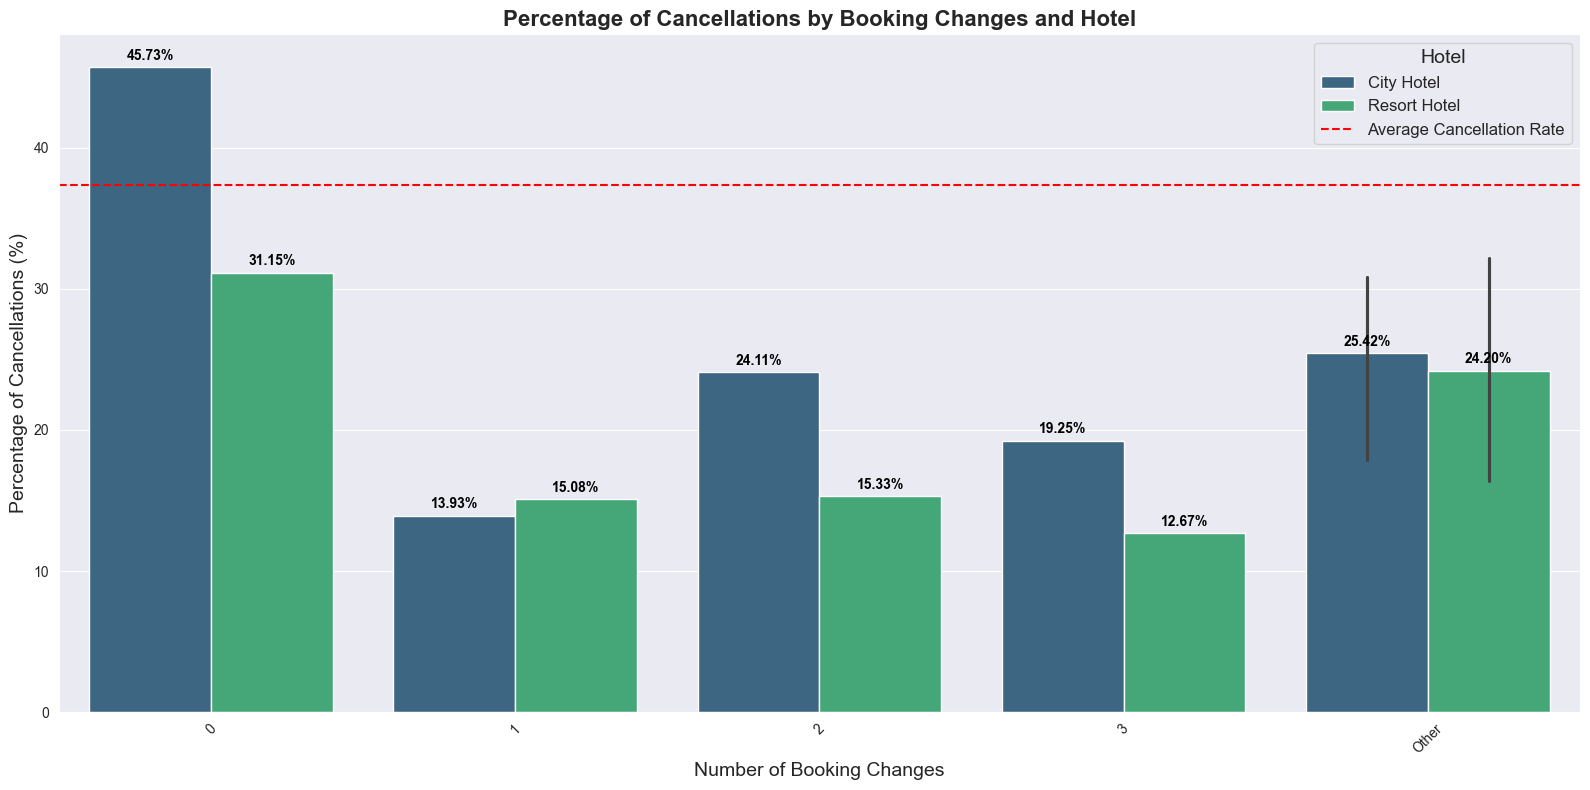

In [24]:
# Menghitung persentase pembatalan untuk setiap booking change dan hotel
cancellation_by_booking_changes_hotel = df.groupby(['booking_changes', 'hotel', 'is_canceled']).size().unstack().reset_index()
cancellation_by_booking_changes_hotel.columns.name = None
cancellation_by_booking_changes_hotel['Total'] = cancellation_by_booking_changes_hotel[0] + cancellation_by_booking_changes_hotel[1]
cancellation_by_booking_changes_hotel['% Canceled'] = (cancellation_by_booking_changes_hotel[1] / cancellation_by_booking_changes_hotel['Total']) * 100

# Menggabungkan kategori booking_changes selain 0, 1, 2, 3 ke dalam kategori "Other"
cancellation_by_booking_changes_hotel.loc[cancellation_by_booking_changes_hotel['booking_changes'] > 3, 'booking_changes'] = 'Other'

# Membuat plot barchart
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cancellation_by_booking_changes_hotel, x='booking_changes', y='% Canceled', hue='hotel', palette='viridis')

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Booking Changes and Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Number of Booking Changes', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend(title='Hotel', fontsize=12, title_fontsize=14)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisis Tingkat Pembatalan Berdasarkan Perubahan Pemesanan dan Jenis Hotel**

Berdasarkan persentase `booking_changes` dan pembagian `hotel`, dapat ditarik beberapa kesimpulan penting:

*   **Hotel Kota Secara Umum Lebih Rentan Terhadap Risiko Pembatalan**, khususnya pada pemesanan yang tidak mengalami perubahan. Hal ini mengindikasikan bahwa pemesanan di Hotel Kota cenderung lebih fleksibel atau memiliki potensi pembatalan yang lebih tinggi dibandingkan dengan Hotel Resor.

*   **Satu Kali Perubahan Pemesanan Menghasilkan Tingkat Pembatalan Terendah** baik untuk Hotel Kota maupun Hotel Resor. Ini menunjukkan bahwa tamu yang melakukan setidaknya satu penyesuaian pada pemesanan mereka memiliki kecenderungan yang lebih besar untuk mempertahankan reservasi tersebut.

*   **Pada Pemesanan dengan Beberapa Perubahan, Hotel Resor Secara Konsisten Menunjukkan Tingkat Pembatalan yang Lebih Rendah**. Hal ini mencerminkan karakteristik pemesanan liburan yang lebih stabil dan terencana di Hotel Resor. Sebaliknya, Hotel Kota memperlihatkan volatilitas yang lebih tinggi meskipun pemesanan telah dimodifikasi beberapa kali.


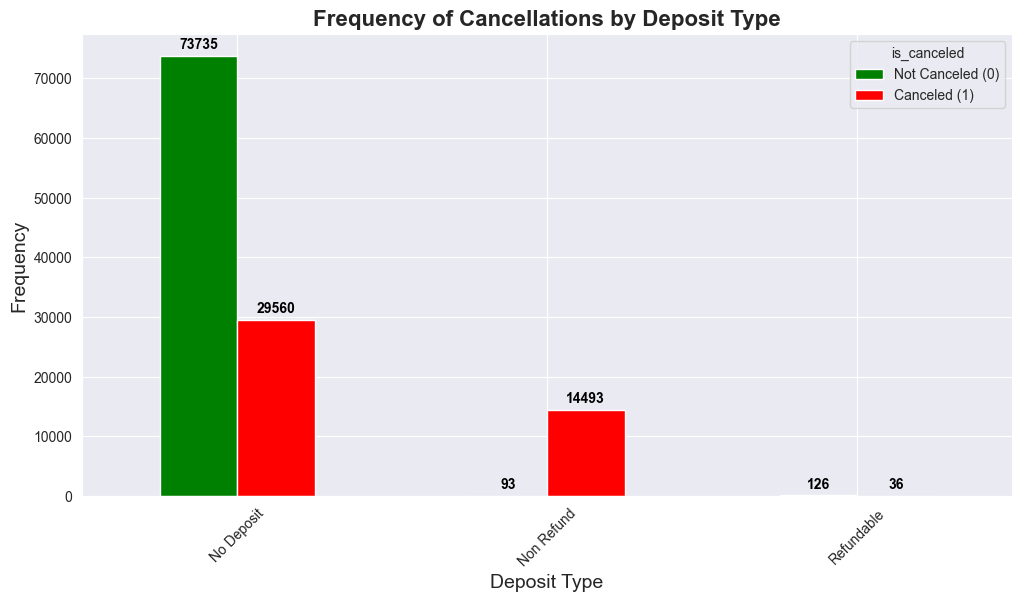

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/4037586444.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


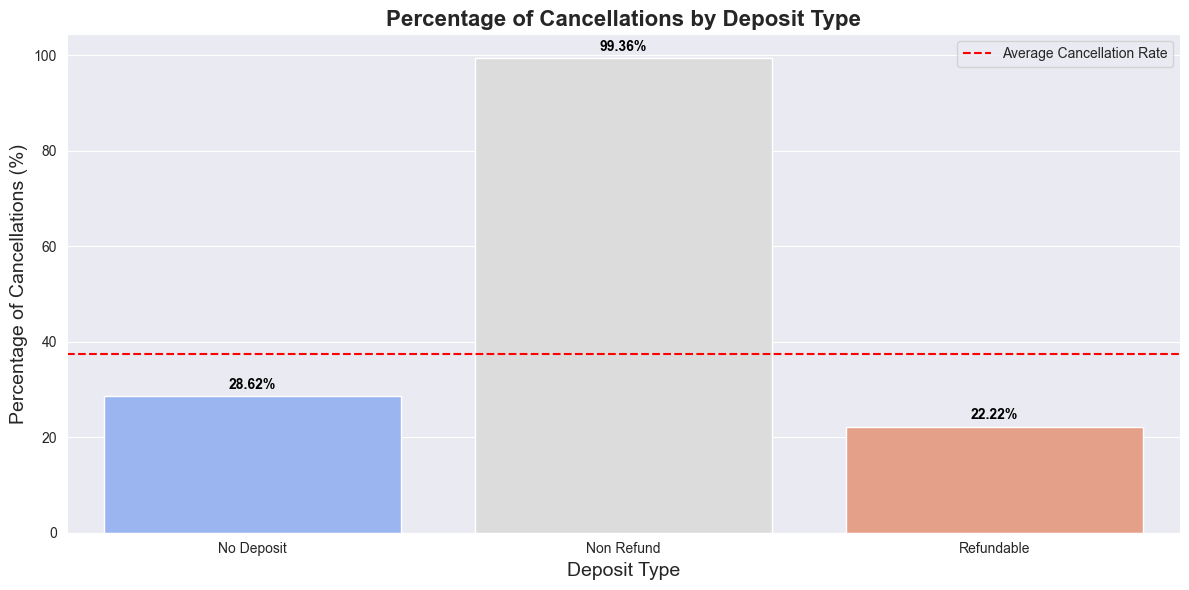

In [25]:
# Menghitung frekuensi pembatalan berdasarkan deposit_type
cancellation_by_deposit_type = df.groupby(['deposit_type', 'is_canceled']).size().unstack()

# Membuat plot barchart
ax = cancellation_by_deposit_type.plot(kind='bar', stacked=False, color=['green', 'red'], figsize=(12, 6))

# Menambahkan judul dan label sumbu
plt.title('Frequency of Cancellations by Deposit Type', fontsize=16, fontweight='bold')
plt.xlabel('Deposit Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Menampilkan legenda
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])

# Menambahkan frekuensi di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Mengatur rotasi label x-axis untuk kemudahan baca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

# Calculate the percentage of cancellations for each deposit type
cancellation_by_deposit_type_percentage = cancellation_by_deposit_type.div(cancellation_by_deposit_type.sum(axis=1), axis=0) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=cancellation_by_deposit_type_percentage.reset_index(), 
    x='deposit_type', 
    y=1, 
    palette='coolwarm'  # Change the color palette
)

# Add a line for the average cancellation rate
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Add title and labels
plt.title('Percentage of Cancellations by Deposit Type', fontsize=16, fontweight='bold')
plt.xlabel('Deposit Type', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Berdasarkan dua *bar chart* di atas, dapat ditarik beberapa kesimpulan penting terkait hubungan antara jenis setoran dan tingkat pembatalan pada pemesanan hotel:

1.  **Tingkat pembatalan tertinggi dikaitkan dengan setoran non-refundable**:
    *   Tingkat pembatalan untuk pemesanan dengan **setoran non-refundable** tergolong sangat tinggi, mencapai **99,4%**, meskipun terdapat potensi kerugian finansial akibat pembatalan.
    *   Hal ini mengindikasikan bahwa tamu tetap memilih untuk membatalkan, kemungkinan karena **keputusan yang bersifat mendadak** atau **pemesanan yang dilakukan secara spekulatif**. Dalam situasi ini, biaya yang dibayarkan di awal dianggap sebagai risiko yang dapat diterima demi mendapatkan fleksibilitas yang lebih besar.

2.  **Tingkat pembatalan moderat pada pemesanan tanpa setoran**:
    *   Opsi pemesanan **tanpa setoran** menghadapi risiko pembatalan yang moderat, dengan tingkat pembatalan tercatat sebesar **28,6%**.
    *   **Tidak adanya komitmen finansial** membuat tamu lebih leluasa untuk membatalkan rencana mereka tanpa dikenakan denda. Hal ini menyoroti **daya tarik fleksibilitas** bagi wisatawan, namun juga meningkatkan **risiko pembatalan bagi pihak hotel**.

3.  **Pemesanan lebih stabil dengan setoran Refundable**:
    *   Pemesanan dengan **setoran refundable** memiliki **tingkat pembatalan terendah**, yaitu **22,2%**. Ini menunjukkan bahwa tamu cenderung lebih mempertahankan reservasi mereka karena mengetahui adanya opsi untuk membatalkan tanpa kehilangan dana yang telah mereka bayarkan.
    *   **Keseimbangan antara fleksibilitas dan komitmen** ini menjadikan setoran refundable sebagai pilihan yang **paling stabil bagi hotel** dalam upaya meminimalkan tingkat pembatalan.


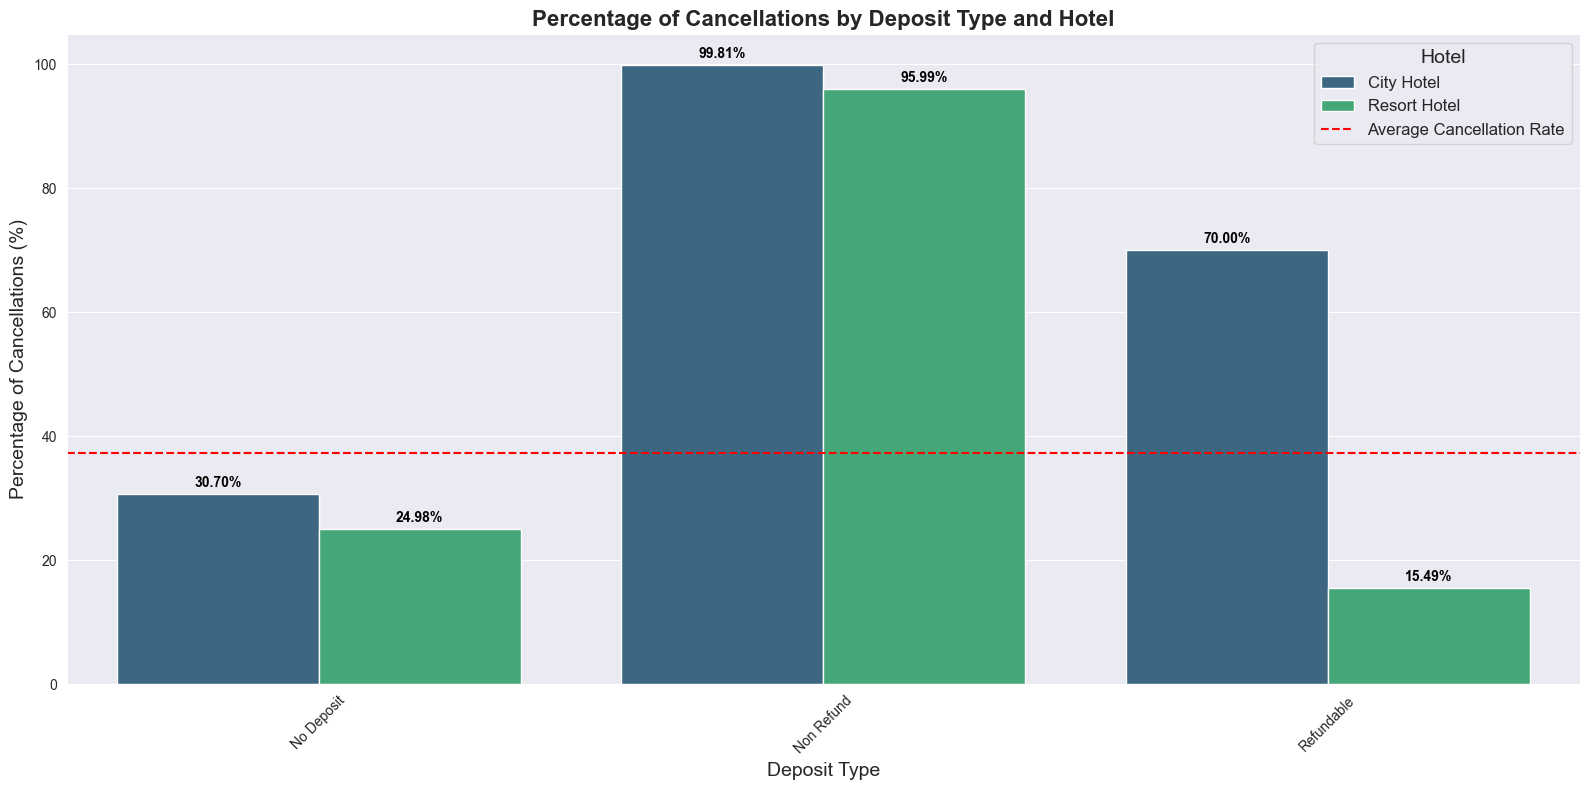

In [26]:
# Menghitung persentase pembatalan untuk setiap deposit type dan hotel
cancellation_by_deposit_type_hotel = df.groupby(['deposit_type', 'hotel', 'is_canceled']).size().unstack().reset_index()
cancellation_by_deposit_type_hotel.columns.name = None
cancellation_by_deposit_type_hotel['Total'] = cancellation_by_deposit_type_hotel[0] + cancellation_by_deposit_type_hotel[1]
cancellation_by_deposit_type_hotel['% Canceled'] = (cancellation_by_deposit_type_hotel[1] / cancellation_by_deposit_type_hotel['Total']) * 100

# Membuat plot barchart
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cancellation_by_deposit_type_hotel, x='deposit_type', y='% Canceled', hue='hotel', palette='viridis')

# Menambahkan garis rata-rata pembatalan
average_cancellation_rate = df['is_canceled'].mean() * 100
plt.axhline(y=average_cancellation_rate, color='red', linestyle='--', label='Average Cancellation Rate')

# Menambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Deposit Type and Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Deposit Type', fontsize=14)
plt.ylabel('Percentage of Cancellations (%)', fontsize=14)

# Menambahkan persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{x:.2f}%" for x in container.datavalues], label_type="edge", padding=3, color="black", fontweight="bold")

# Menambahkan legenda
plt.legend(title='Hotel', fontsize=12, title_fontsize=14)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan persentase `deposit_type` dan pembagian `hotel`, dapat ditarik kesimpulan berikut:

1.  **Setoran *Non-Refundable* Berhubungan dengan Tingkat Pembatalan yang Teramat Tinggi**:

    *   **Pilihan 1 (Menekankan Perbandingan Hotel):**
        > Tingkat pembatalan untuk setoran *non-refundable* terlampau tinggi, bahkan mendekati sempurna di **Hotel Kota** dengan **99,8%**, diikuti **Hotel Resor** yang juga signifikan di angka **96,0%**.  Meskipun setoran tidak dapat dikembalikan, tamu tetap saja membatalkan hampir semua pemesanan jenis ini.

    *   **Pilihan 2 (Menekankan Alasan Pembatalan):**
        > Meskipun ada kerugian finansial dari setoran yang *non-refundable*, tingkat pembatalan tetap luar biasa tinggi, mencapai **99,8% di Hotel Kota** dan **96,0% di Hotel Resor**. Ini menunjukkan bahwa **sanksi finansial tidak cukup mencegah pembatalan**, kemungkinan besar karena **pemesanan spekulatif atau keputusan mendadak**, di mana tamu rela mengorbankan setoran demi mendapatkan fleksibilitas.

    *   **Pilihan 3 (Lebih Ringkas):**
        >  Tingkat pembatalan untuk setoran *non-refundable* **sangat ekstrem**, mencapai **99,8% untuk Hotel Kota** dan **96,0% untuk Hotel Resor**.  Ini mengindikasikan bahwa meskipun dana sudah dibayar dan tidak dapat dikembalikan, pembatalan tetap marak terjadi, menandakan bahwa fleksibilitas lebih diprioritaskan daripada kerugian finansial kecil.

2.  **Setoran *Refundable* Menghasilkan Variasi Hasil yang Signifikan**:

    *   **Pilihan 1 (Menekankan Perbedaan Hotel):**
        >  Setoran *refundable* menghasilkan tingkat pembatalan yang sangat berbeda antara kedua jenis hotel: **70,0% di Hotel Kota** dan **15,5% di Hotel Resor**.

    *   **Pilihan 2 (Menekankan Perilaku Tamu):**
        >  Dengan setoran *refundable*, perilaku tamu sangat berbeda tergantung jenis hotel. **Tamu Hotel Kota** cenderung memanfaatkan fleksibilitas setoran yang dapat dikembalikan, dengan tingkat pembatalan mencapai **70,0%**. Sebaliknya, **tamu Hotel Resor** lebih berkomitmen pada reservasi mereka, dengan tingkat pembatalan jauh lebih rendah yaitu **15,5%**.

    *   **Pilihan 3 (Menekankan Struktur Liburan):**
        >  Penggunaan setoran *refundable* memperlihatkan perbedaan mencolok dalam tingkat pembatalan. **Hotel Kota mencatat 70,0%**, mengindikasikan fleksibilitas yang dimanfaatkan tamu. Namun, **Hotel Resor hanya 15,5%**, kemungkinan karena rencana liburan di resor lebih terstruktur dan jarang berubah, sehingga komitmen pemesanan lebih tinggi.

3.  **Pemesanan Tanpa Setoran Menunjukkan Tingkat Pembatalan yang Moderat**:

    *   **Pilihan 1 (Menekankan Perbandingan Hotel):**
        >  Untuk pemesanan tanpa setoran, **Hotel Kota** memiliki tingkat pembatalan **30,7%**, sedikit lebih tinggi dibandingkan **Hotel Resor** yang sebesar **25,0%**.

    *   **Pilihan 2 (Menekankan Kurangnya Komitmen Finansial):**
        >  Opsi pemesanan tanpa setoran memperlihatkan tingkat pembatalan yang moderat: **30,7% di Hotel Kota** dan **25,0% di Hotel Resor**. **Tidak adanya komitmen finansial awal** meningkatkan kemungkinan pembatalan, meskipun tidak seekstrem setoran *non-refundable*.

    *   **Pilihan 3 (Menekankan Daya Tarik Fleksibilitas):**
        >  Meskipun tidak setinggi *non-refundable*, tingkat pembatalan untuk pemesanan tanpa setoran tetap moderat, yaitu **30,7% di Hotel Kota** dan **25,0% di Hotel Resor**. Ini mencerminkan **daya tarik fleksibilitas bagi tamu**, yang mungkin membatalkan reservasi karena tidak ada penalti finansial yang dikenakan.


#### **5.2.6 Bagaimana jenis *Agent* yang digunakan dan *Company* tamu berpengaruh pada pembatalan pemesanan hotel?**


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/3709573769.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_data.index, y='percentage', data=freq_data, palette='coolwarm')


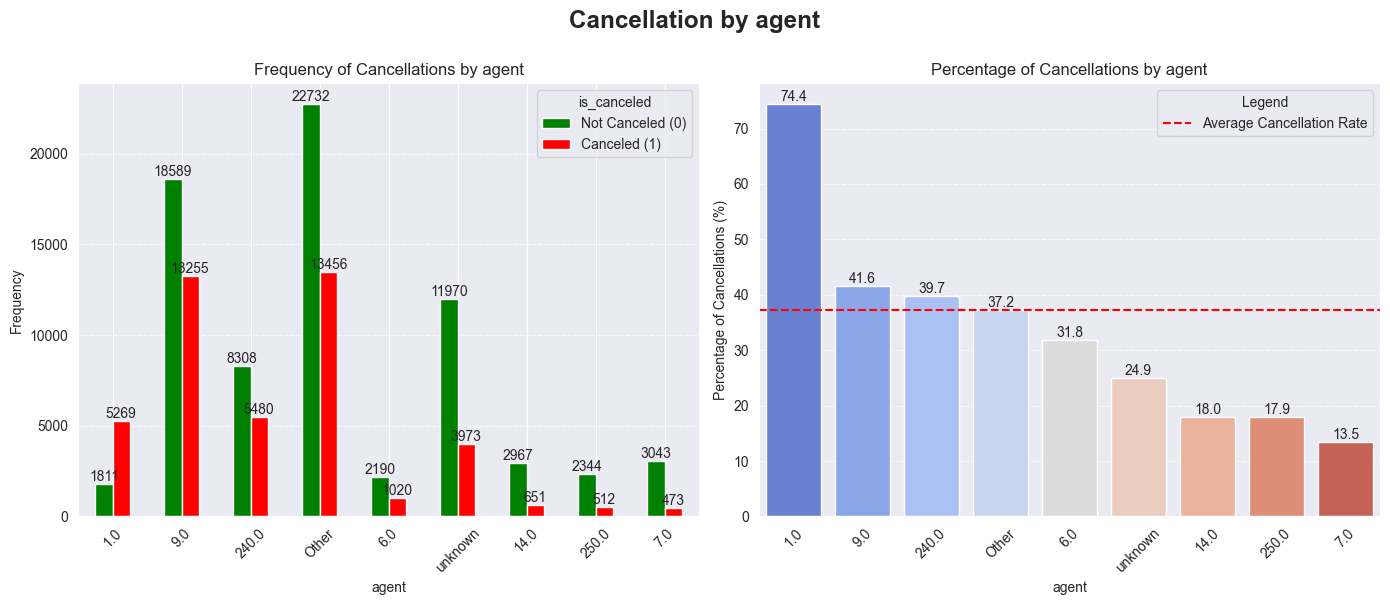

In [27]:
# Copy the dataframe
df1 = df.copy()

# Calculate the value counts and percentages
counts = df1['agent'].value_counts(normalize=True) * 100
rare_labels = counts[counts < 2].index

# Replace rare labels with 'Other'
df1['agent'] = df1['agent'].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or 'agent' not in df1.columns:
    raise ValueError("The DataFrame must contain the 'is_canceled' column and the 'agent' column.")

# Frequency data
freq_data = df1.groupby(['agent', 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby('agent').size()
freq_data['percentage'] = freq_data[1] / total_counts * 100

# Sort by percentage in descending order
freq_data = freq_data.sort_values('percentage', ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
plt.suptitle('Cancellation by agent', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.drop('percentage', axis=1).plot(kind='bar', ax=plt.gca(), color=['green', 'red'])
plt.title('Frequency of Cancellations by agent')
plt.xlabel('agent')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
sns.barplot(x=freq_data.index, y='percentage', data=freq_data, palette='coolwarm')
plt.title('Percentage of Cancellations by agent')
plt.xlabel('agent')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)
for index, value in enumerate(freq_data['percentage']):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Add a line for the average cancellation rate
average_cancellation = 37.3
plt.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')
plt.legend(title='Legend')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Dari kedua bar chart tersebut, kesimpulannya:

1.  **Tingkat Pembatalan Tertinggi Terlihat pada Agen 1**:
    *   Pemesanan yang diproses melalui Agen 1 **terindikasi memiliki kecenderungan spekulatif yang kuat** atau **kerap mengalami perubahan rencana dadakan**. Konsekuensinya, Agen 1 mencatat **proporsi pembatalan yang paling tinggi**, mencapai angka **74,4%**.

2.  **Agen 9 Juga Berada dalam Kategori Tingkat Pembatalan Tinggi**:
    *   **Fleksibilitas ketentuan pemesanan Agen 9** atau **karakteristik pelanggan yang lebih dinamis dalam mengubah rencana** mungkin menjadi faktor pendorong tingkat pembatalan yang tinggi pada agen ini, yang tercatat sebesar **41,6%**.

3.  **Tingkat Pembatalan Moderat pada Agen 240 dan ‘Lainnya’**:
    *   Dibandingkan Agen 1 dan 9, **Agen 240** dan kategori **‘Lainnya’** memiliki **frekuensi pembatalan yang lebih terkendali**. Meskipun fleksibilitas tetap ada, tamu yang memesan melalui kanal-kanal ini **cenderung lebih sedikit melakukan pembatalan**, dengan persentase di kisaran **30-an persen**.

4.  **Agen dengan Tingkat Pembatalan Minimum (Agen 7, 250, dan 14)**:
    *   **Opsi pemesanan yang lebih rigit** atau **fokus pada segmen pelanggan yang lebih pasti dengan rencana perjalanan mereka** menjadi ciri khas Agen 7, 250, dan 14. Hal ini berimbas pada **tingkat pembatalan yang minimal** jika dibandingkan agen lain.

5.  **Rata-Rata Tingkat Pembatalan pada Agen Tidak Dikenal dan Agen 6**:
    *   **Keseimbangan antara fleksibilitas dan kepastian** tampak pada Agen Tidak Dikenal dan Agen 6. Tingkat pembatalan yang **moderat** mengisyaratkan adanya **akomodasi terhadap perubahan rencana tamu**, namun **tidak sampai kehilangan kendali atas prediksi hunian**.


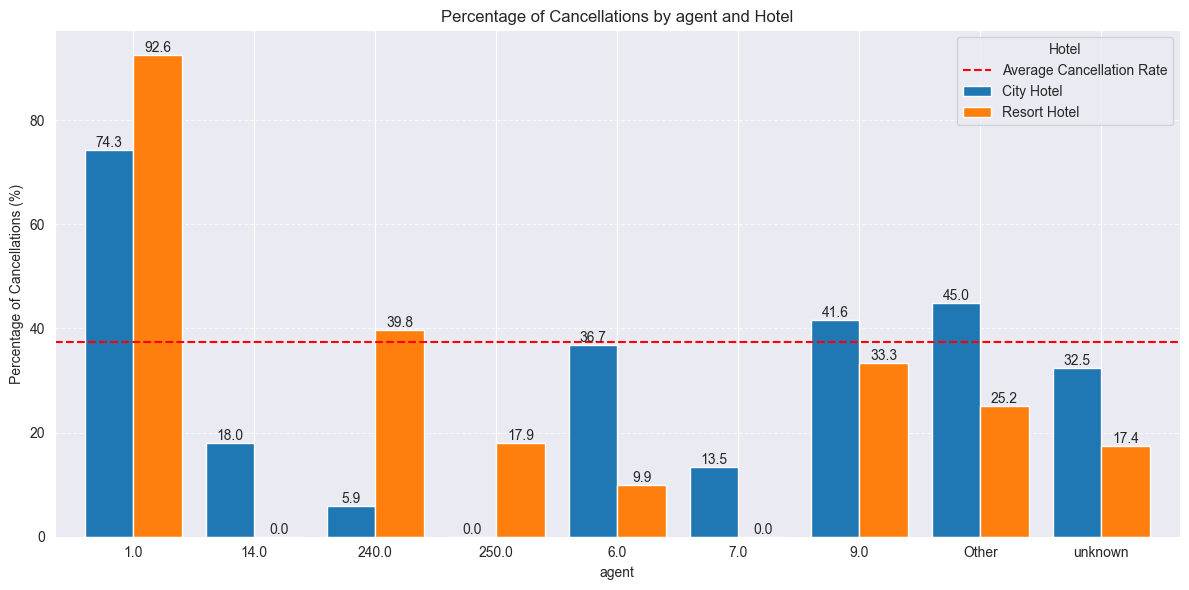

In [28]:
# Copy the dataframe
df1 = df.copy()

# Calculate the value counts and percentages
counts = df1['agent'].value_counts(normalize=True) * 100
rare_labels = counts[counts < 2].index

# Replace rare labels with 'Other'
df1['agent'] = df1['agent'].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or 'agent' not in df1.columns:
    raise ValueError("The DataFrame must contain the 'is_canceled' column and the 'agent' column.")

# Frequency data
freq_data = df1.groupby(['agent', 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby('agent').size()
freq_data['percentage'] = freq_data[1] / total_counts * 100

# Sort by percentage in descending order
freq_data = freq_data.sort_values('percentage', ascending=False)

# Copy the dataframe
df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Calculate the value counts and percentages
counts = df1['agent'].value_counts(normalize=True) * 100
rare_labels = counts[counts < 2].index
df1['agent'] = df1['agent'].replace(rare_labels, 'Other')

# Group by hotel and agent
grouped = df1.groupby(['hotel', 'agent'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped['percentage'] = grouped['is_canceled'] * 100

# Sort by percentage in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot the DataFrame for better plotting
pivot_table = grouped.pivot(index='agent', columns='hotel', values='percentage')

# Create a bar plot with custom colors
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for the bars
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Add a line for the average cancellation rate
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by agent and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('agent')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Kesimpulan dari barchart diatas:

1.  **Agen 1: Pelopor Tingkat Pembatalan Tertinggi di Seluruh Jenis Hotel**:
    *   Baik **Hotel Kota** maupun **Hotel Resor** sama-sama mencatatkan **Agen 1** sebagai penyumbang tingkat pembatalan tertinggi. Di **Hotel Kota**, persentasenya mencapai **74,3%**, sementara di **Hotel Resor** bahkan melonjak hingga **92,6%**.
    *   Implikasi dari data ini adalah bahwa pemesanan melalui Agen 1 **cenderung bersifat sangat fleksibel atau spekulatif**. Tamu yang menggunakan agen ini tampak **lebih mungkin untuk membatalkan reservasi**, terutama jika tujuan akomodasinya adalah Hotel Resor. Fenomena ini mungkin dipicu oleh karakteristik **pemesanan yang impulsif** atau **kebijakan pembatalan yang longgar** yang diasosiasikan dengan Agen 1.

2.  **Kategori ‘Lainnya’: Kontras Signifikan Tingkat Pembatalan Antar Jenis Hotel**:
    *   Kategori agen **‘Lainnya’** memperlihatkan **perbedaan mencolok** dalam hal tingkat pembatalan, tergantung pada jenis hotel. **Hotel Kota** mengalami tingkat pembatalan yang **jauh lebih tinggi** (**45,0%**) dibandingkan dengan **Hotel Resor** yang hanya **25,2%**.
    *   Hal ini mengindikasikan bahwa tamu yang memesan **Hotel Kota** melalui kategori agen ‘Lainnya’ **lebih berpotensi untuk membatalkan**, kemungkinan karena **fleksibilitas rencana perjalanan** yang lebih tinggi, seperti halnya perjalanan bisnis atau kunjungan singkat. Sebaliknya, **Hotel Resor** dalam kategori ini mungkin lebih menarik bagi tamu dengan **rencana liburan yang lebih definitif**, sehingga tingkat pembatalan pun lebih rendah.

3.  **Agen 9: Tingkat Pembatalan Moderat yang Konsisten di Berbagai Jenis Hotel**:
    *   **Hotel Kota** mencatatkan tingkat pembatalan **41,6%** untuk Agen 9, sementara **Hotel Resor** menunjukkan angka yang sedikit lebih rendah, yaitu **33,3%**.
    *   Meskipun tingkat pembatalan melalui Agen 9 tergolong **moderat** di kedua jenis hotel, **Hotel Resor** tetap menunjukkan **stabilitas pemesanan yang lebih baik**. Tingkat pembatalan yang lebih tinggi di Hotel Kota mungkin mencerminkan **dinamika perjalanan perkotaan** yang lebih sering mengalami perubahan rencana mendadak.

4.  **Agen 240: Volatilitas Tinggi Khusus pada Pemesanan Hotel Resor**:
    *   **Hotel Resor** mengalami tingkat pembatalan yang **signifikan** sebesar **39,8%** saat pemesanan dilakukan melalui Agen 240. Namun, **menariknya, tidak ada pembatalan tercatat untuk Hotel Kota** melalui agen yang sama.
    *   Situasi ini mengisyaratkan bahwa pemesanan **Hotel Resor** melalui Agen 240 **lebih volatil**, kemungkinan besar karena tamu mencari **fleksibilitas dalam rencana liburan resor** mereka atau karena **sifat pemesanan yang lebih spekulatif**. Sebaliknya, **ketiadaan pembatalan di Hotel Kota** melalui Agen 240 menunjukkan **komitmen yang lebih kuat** dari tamu yang menggunakan agen ini untuk keperluan akomodasi di perkotaan.

5.  **Agen 6, ‘Tidak Dikenal’, dan 14: Tingkat Pembatalan Bervariasi Tergantung Jenis Hotel**:
    *   **Hotel Kota** mencatat tingkat pembatalan sebesar **36,7%** untuk Agen 6, **32,5%** untuk agen ‘Tidak Dikenal’, dan **18,0%** untuk Agen 14. Di **Hotel Resor**, tingkat pembatalan untuk agen-agen ini secara konsisten **lebih rendah**: **Agen 6** di **9,9%**, **‘Tidak Dikenal’** di **17,4%**, dan **Agen 14** **tidak mencatatkan pembatalan**.
    *   Data ini mengindikasikan bahwa tamu yang menggunakan Agen 6, ‘Tidak Dikenal’, dan 14 untuk **Hotel Kota** cenderung **lebih mungkin untuk membatalkan** dibandingkan dengan tamu yang memesan **Hotel Resor** melalui agen yang sama. Pemesanan di Hotel Resor melalui agen-agen ini tampak **lebih stabil**, kemungkinan disebabkan oleh **kebijakan pembatalan yang lebih ketat** atau **rencana liburan yang lebih terencana dan berkomitmen**.

6.  **Agen 7 dan 250: Tingkat Pembatalan yang Konsisten Terendah**:
    *   **Hotel Kota** mencatatkan tingkat pembatalan yang rendah untuk Agen 7 (**13,5%**) dan Agen 250 (**17,9%**).
    *   Sebagai catatan menarik, **tidak ada pembatalan sama sekali** yang tercatat untuk kedua agen ini di **Hotel Resor**. Tingkat pembatalan yang secara umum rendah ini menunjukkan bahwa pemesanan melalui Agen 7 dan 250 **cenderung lebih stabil**, dengan indikasi **komitmen tamu yang lebih tinggi** atau pengaruh dari **kebijakan pemesanan yang lebih restriktif**.


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/333305775.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')  # Change bar color here


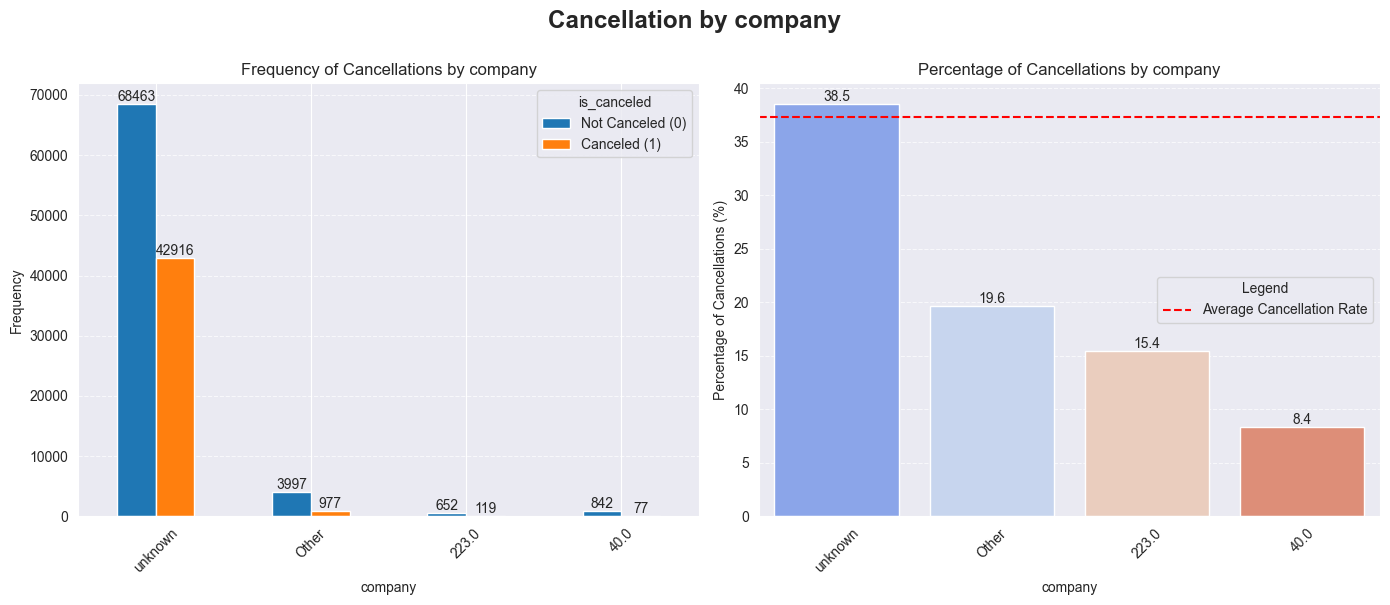

In [29]:
# Copy the DataFrame
df1 = df.copy()

# Set parameters
category_col = 'company'
percentage_threshold = 0.5
sort = True

# Get percentages
counts = df1[category_col].value_counts(normalize=True) * 100

# Identify rare labels
rare_labels = counts[counts < percentage_threshold].index

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])  # Change bar colors here
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')  # Change bar color here
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Kesimpulan dari kedua barchart diatas:

1.  **Tingkat pembatalan terunggul tercatat pada kategori Perusahaan 'Tidak Dikenal'**:
    *   Kategori **Perusahaan Tidak Dikenal** memimpin dalam hal tingkat pembatalan, dengan persentase mencapai **38,5%**. Angka ini diperoleh dari **42.916 pembatalan** dari total **111.379 pemesanan**.
    *   Data ini mengimplikasikan bahwa **ketika detail perusahaan tidak teridentifikasi atau tidak tersedia dalam catatan, pemesanan menjadi lebih rentan terhadap pembatalan atau bersifat lebih spekulatif**. Situasi ini mungkin berkaitan dengan **pelancong individu** atau **pemesanan korporat yang tidak terdata secara lengkap**.

2.  **Kategori Perusahaan 'Other' Menunjukkan Tingkat Pembatalan yang Moderat**:
    *   Kategori **Perusahaan Other** memperlihatkan tingkat pembatalan yang **moderat**, yaitu **19,6%**. Rinciannya adalah **977 pembatalan** dari **4.974 pemesanan**.
    *   Tingkat moderat ini mungkin **merefleksikan karakteristik pemesanan korporat yang lebih terstruktur**, yang umumnya memiliki **tingkat pembatalan lebih rendah** jika dibandingkan dengan pemesanan individual atau yang tidak teridentifikasi.

3.  **Tingkat Pembatalan yang Lebih Rendah Pada Perusahaan 223 **:
    *   **Perusahaan 223** menunjukkan performa yang lebih baik dengan tingkat pembatalan yang **lebih rendah**, yaitu **15,4%**. Angka ini berasal dari **119 pembatalan** dari **771 pemesanan** yang tercatat.
    *   Tingkat pembatalan yang lebih rendah ini **mengindikasikan stabilitas yang lebih tinggi** pada pemesanan yang dilakukan melalui Perusahaan 223. Tamu yang memesan melalui perusahaan ini **cenderung lebih kecil kemungkinannya untuk membatalkan**, yang kemungkinan disebabkan oleh **kebijakan perjalanan korporat yang lebih disiplin** atau **komitmen yang lebih kuat dari para pelancong bisnis**.

4.  **Perusahaan 40 Meraih Predikat Tingkat Pembatalan Terendah**:
    *   **Perusahaan 40** berhasil mencatatkan **tingkat pembatalan terendah** di antara semua kategori, yaitu hanya **8,4%**. Data ini dihitung dari **77 pembatalan** dari total **919 pemesanan**.
    *   Tingkat pembatalan yang **luar biasa rendah** ini **menunjukkan tingkat komitmen yang sangat kuat** terhadap pemesanan yang dilakukan melalui Perusahaan 40. Hal ini kemungkinan besar mencerminkan **efektivitas kebijakan korporat yang diterapkan** atau keberadaan **kemitraan jangka panjang yang berhasil meminimalisasi pembatalan**.


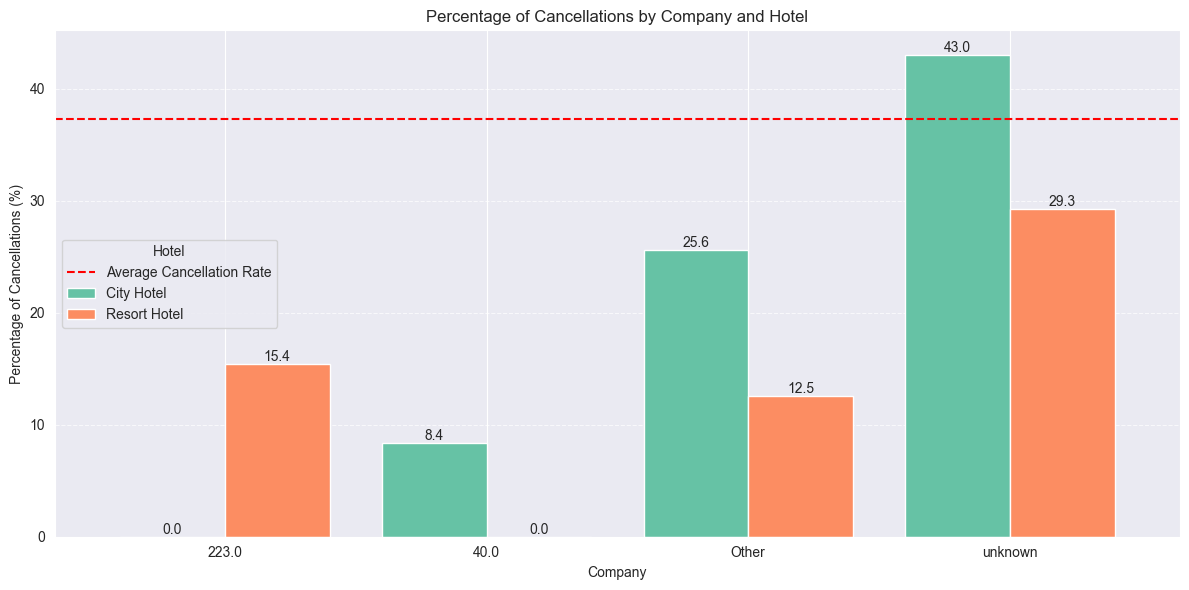

In [30]:
# Salin DataFrame
df1 = df.copy()

# Tentukan kolom kategori dan ambang batas persentase
category_col = 'company'
percentage_threshold = 0.5
sort = True

# Hitung persentase
counts = df1[category_col].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index

# Ganti label yang jarang dengan 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Periksa apakah kolom 'is_canceled' dan kolom kategori ada
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Data frekuensi
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Data persentase untuk is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Group by company and hotel
grouped_company_hotel = df1.groupby(['company', 'hotel'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped_company_hotel['percentage'] = grouped_company_hotel['is_canceled'] * 100

# Pivot the DataFrame for better plotting
pivot_table_company_hotel = grouped_company_hotel.pivot(index='company', columns='hotel', values='percentage')

# Create a bar plot with custom colors
colors = sns.color_palette("Set2")  # Use a seaborn color palette
ax = pivot_table_company_hotel.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Add a line for the average cancellation rate
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Company and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Company')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut adalah kesimpulan yang ditarik dari barchart diatas:

1.  **Dominasi Tingkat Pembatalan Tertinggi oleh Perusahaan 'Tidak Dikenal' di Kedua Jenis Hotel**:
    *   Untuk **Hotel Kota**, tingkat pembatalan yang dicatatkan oleh kategori Perusahaan 'Tidak Dikenal' mencapai **43,0%**. Di **Hotel Resor**, meskipun lebih rendah, angka tersebut masih signifikan, yaitu **29,3%**.
    *   Data ini mengindikasikan bahwa **ketidakjelasan informasi perusahaan menjadi indikator kerentanan pemesanan terhadap pembatalan**, terutama saat memesan **Hotel Kota**. Hal ini dapat dikaitkan dengan **ketidakpastian atau fleksibilitas rencana perjalanan yang lebih umum** pada pemesanan bisnis atau korporat di wilayah perkotaan.

2.  **Kontras Signifikan Tingkat Pembatalan Perusahaan 'Lain' Antara Hotel Kota dan Resor**:
    *   Perusahaan dengan kategori "Lain" menunjukkan **perbedaan yang mencolok** dalam tingkat pembatalan antara **Hotel Kota** dan **Hotel Resor**. Di **Hotel Kota**, tingkat pembatalan mencapai **25,6%**, sementara di **Hotel Resor** angkanya jauh lebih kecil, hanya **12,5%**.
    *   Implikasi dari data ini adalah bahwa **pemesanan Hotel Kota oleh perusahaan dengan kategori "Lain" memiliki probabilitas pembatalan yang lebih tinggi** dibandingkan dengan pemesanan di Hotel Resor. **Hotel Resor cenderung menarik pemesanan yang lebih terikat**, kemungkinan karena **rencana liburan yang lebih kecil kemungkinannya untuk berubah**.

3.  **Stabilitas Pemesanan Melalui Perusahaan 40: Nol Pembatalan di Hotel Resor dan Tingkat Rendah di Hotel Kota**:
    *   **Hotel Kota** mencatatkan tingkat pembatalan sebesar **8,4%** untuk pemesanan melalui Perusahaan 40. Sementara itu, **Hotel Resor sama sekali tidak mengalami pembatalan** dari perusahaan ini.
    *   Hal ini menunjukkan bahwa **pemesanan yang difasilitasi oleh Perusahaan 40 memiliki tingkat stabilitas yang sangat tinggi**. Ini mencerminkan **komitmen yang kuat** atau **efektivitas kebijakan korporat** yang diterapkan. Tamu yang menggunakan Perusahaan 40 untuk memesan hotel kemungkinan memiliki **fleksibilitas rencana perjalanan yang terbatas** atau **tingkat kepastian rencana yang tinggi**.

4.  **Perusahaan 223: Pembatalan Nihil di Hotel Kota, Tingkat Moderat di Hotel Resor**:
    *   **Hotel Kota mencatatkan nol pembatalan** untuk pemesanan melalui Perusahaan 223. Namun, **Hotel Resor** menunjukkan tingkat pembatalan yang **moderat**, yaitu **15,4%**.
    *   Situasi ini menandakan bahwa **pemesanan Hotel Kota melalui Perusahaan 223 sangat stabil**, kemungkinan besar akibat **kebijakan korporat yang ketat**. Tingkat pembatalan yang moderat di Hotel Resor, meskipun ada, tetap menunjukkan adanya **tingkat fleksibilitas tertentu**, namun secara umum mengindikasikan **pemesanan yang cukup berkomitmen**.


#### **5.2.7 Di antara berbagai tipe *Meal* yang ditawarkan, mana yang memiliki tingkat pembatalan tertinggi?**


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/3468917670.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x='meal', y='percentage', data=freq_data2, palette='coolwarm')


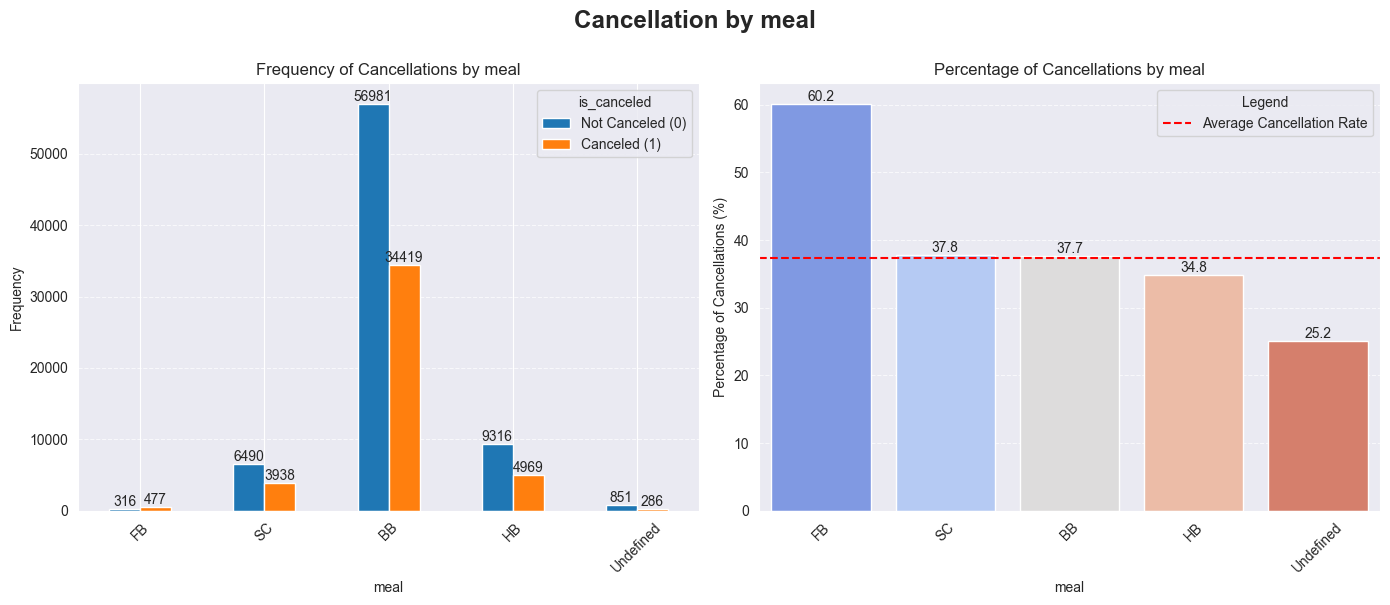

In [31]:
# Salin DataFrame
df1 = df.copy()

# Hitung persentase
counts = df1['meal'].value_counts(normalize=True) * 100
rare_labels = counts[counts < 0].index

# Ganti label yang jarang dengan 'Other'
df1['meal'] = df1['meal'].replace(rare_labels, 'Other')

# Periksa apakah kolom 'is_canceled' dan 'meal' ada
if 'is_canceled' not in df1.columns or 'meal' not in df1.columns:
    raise ValueError("DataFrame harus mengandung kolom 'is_canceled' dan 'meal'.")

# Data frekuensi
freq_data = df1.groupby(['meal', 'is_canceled']).size().unstack(fill_value=0)

# Data persentase untuk is_canceled = 1
total_counts = df1.groupby('meal').size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

# Urutkan data jika diperlukan
if True:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Atur ukuran gambar
plt.figure(figsize=(14, 6))
plt.suptitle('Cancellation by meal', fontsize=17.5, y=1, fontweight="bold")

# Grafik batang untuk frekuensi pembatalan (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
plt.title('Frequency of Cancellations by meal')
plt.xlabel('meal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label pada batang frekuensi
for container in ax.containers:
    ax.bar_label(container)

# Grafik batang untuk persentase pembatalan (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x='meal', y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by meal')
plt.xlabel('meal')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Tambahkan label pada batang persentase
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Hitung dan plot garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Tampilkan legenda untuk garis rata-rata
percentage_ax.legend(title='Legend')

# Tampilkan plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut adalah kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan tipe paket makan yang dipilih tamu:

1.  **Paket *Full Board* sebagai Puncak Tingkat Pembatalan**:
    *   Dalam hal tingkat pembatalan, paket *Full Board* menempati urutan teratas dengan angka **60,2%**.  Meskipun demikian, paket ini memiliki **volume pemesanan paling rendah** dibandingkan opsi lain, yaitu hanya **793 pemesanan**.
    *   Kondisi ini mengisyaratkan bahwa tamu yang memilih *Full Board* **cenderung lebih fleksibel dalam mengatur rencana perjalanan mereka**. Kemungkinan lain, tingkat pembatalan yang tinggi ini dipengaruhi oleh **biaya awal yang lebih besar** karena paket ini mencakup semua hidangan di hotel, sehingga tamu mungkin lebih mempertimbangkan ulang atau membatalkan jika ada perubahan rencana.

2.  **Paket *Bed and Breakfast* Menunjukkan Tingkat Pembatalan Moderat dengan Volume Pemesanan Terbanyak**:
    *   Paket *Bed and Breakfast* mencatatkan tingkat pembatalan **moderat** sebesar **37,7%**. Namun, paket ini justru menjadi **pilihan terpopuler** dengan **volume pemesanan tertinggi** mencapai **91.400 pemesanan**.
    *   Jumlah pembatalan yang besar secara absolut (**34.419**) menunjukkan bahwa meskipun rencana makan ini sangat digemari, ia tetap **rentan terhadap tingkat pembatalan yang cukup signifikan**. Hal ini mungkin disebabkan karena *Bed and Breakfast* menawarkan **keseimbangan antara fleksibilitas dan biaya**, yang menarik bagi tamu yang mungkin masih memiliki potensi untuk mengubah rencana perjalanan mereka.

3.  **Kesamaan Tingkat Pembatalan antara Paket *Self-Catering* dan *Bed and Breakfast***:
    *   Paket *Self-Catering* menunjukkan tingkat pembatalan yang **hampir identik** dengan *Bed and Breakfast*, yaitu **36,5%**, sedikit di bawah *Bed and Breakfast*.
    *   Meskipun **volume pembatalan pada *Self-Catering* lebih kecil**, tingkat pembatalan yang serupa mengindikasikan bahwa tamu yang memilih opsi ini, yang **lebih mengutamakan kebebasan dalam hal makanan**, juga **cukup sering melakukan pembatalan**. Hal ini mungkin disebabkan oleh **fleksibilitas inheren yang ditawarkan oleh opsi *Self-Catering*** itu sendiri.

4.  **Paket *Half Board* Meraih Tingkat Pembatalan Terendah**:
    *   Paket *Half Board* tercatat memiliki tingkat pembatalan **paling rendah** di antara semua opsi, yaitu **34,8%**. Angka ini berasal dari **4.969 pembatalan** dari total **14.285 pemesanan**.
    *   Tingkat pembatalan yang lebih rendah ini berpotensi mengindikasikan bahwa tamu yang memilih paket makan *Half Board* **lebih berkomitmen terhadap rencana perjalanan mereka**. Paket ini tampaknya berhasil **menyeimbangkan antara fleksibilitas dan komitmen** untuk menyertakan beberapa kali makan dalam akomodasi mereka, sehingga menghasilkan tingkat pembatalan yang lebih rendah.


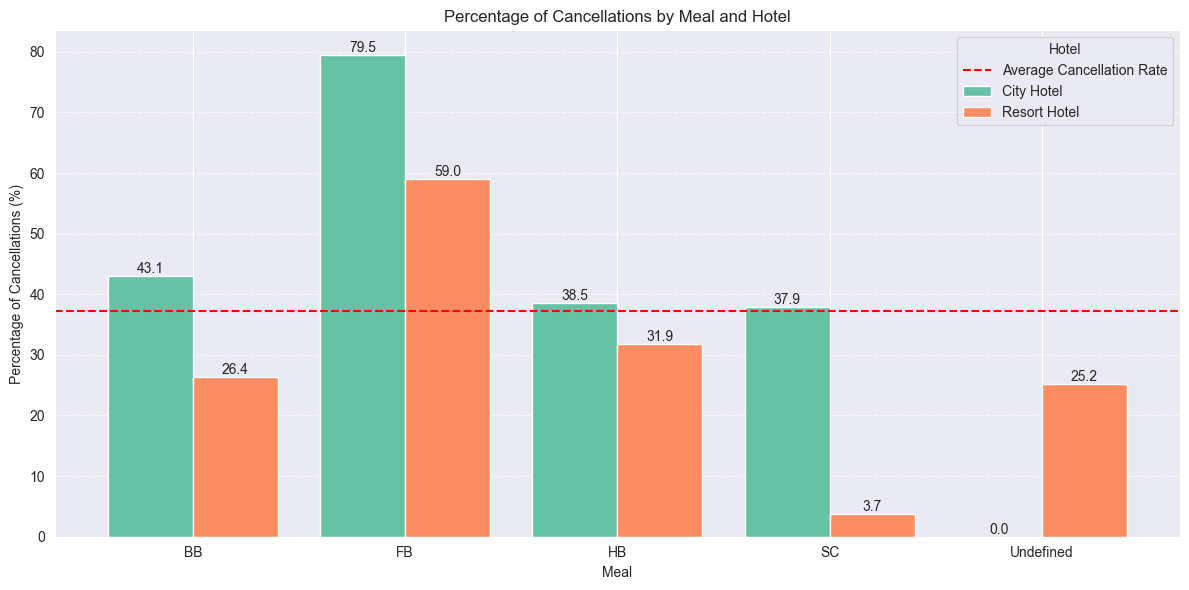

In [32]:

# Salin DataFrame
df1 = df.copy()

# Ubah tipe data kolom 'is_canceled' menjadi integer
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Hitung persentase
counts = df1['meal'].value_counts(normalize=True) * 100
rare_labels = counts[counts < 0.5].index
df1['meal'] = df1['meal'].replace(rare_labels, 'Other')

# Kelompokkan data berdasarkan 'hotel' dan 'meal'
grouped = df1.groupby(['hotel', 'meal'])['is_canceled'].mean().reset_index()

# Hitung persentase pembatalan
grouped['percentage'] = grouped['is_canceled'] * 100

# Urutkan berdasarkan persentase pembatalan secara menurun
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot DataFrame untuk mempermudah plotting
pivot_table = grouped.pivot(index='meal', columns='hotel', values='percentage')

# Buat plot batang dengan palet warna yang menarik
colors = sns.color_palette("Set2")
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Tambahkan label data
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Tambahkan judul dan label sumbu
plt.title('Percentage of Cancellations by Meal and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Meal')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()



Berikut adalah kesimpulan yang ditarik berdasarkan persentase `meal` dan pembagian `hotel`:

1.  **Paket *Full Board* Mendominasi Tingkat Pembatalan Tertinggi di Kedua Jenis Hotel**:
    *   Tingkat pembatalan paket *Full Board* **melambung tinggi** di kedua jenis hotel. **Hotel Kota** mencatat angka **79,5%**, diikuti oleh **Hotel Resor** dengan **59,0%**.
    *   Data ini menegaskan bahwa paket makan *Full Board* **sangat rentan terhadap pembatalan**, terutama ketika dipesan di **Hotel Kota**. Situasi ini mengindikasikan bahwa tamu di hotel kota mungkin **kurang terikat dengan pengaturan makan** yang telah ditetapkan atau memiliki **rencana perjalanan yang lebih fleksibel**. Selain itu, **biaya yang lebih tinggi** untuk paket yang mencakup seluruh hidangan juga berpotensi menjadi faktor pemicu tingkat pembatalan yang lebih tinggi.

2.  **Paket *Bed and Breakfast* Memperlihatkan Perbedaan Tingkat Pembatalan yang Moderat Antar Jenis Hotel**:
    *   Terdapat **perbedaan tingkat pembatalan yang moderat** untuk paket *Bed and Breakfast* antara kedua jenis hotel. **Hotel Kota** memiliki tingkat pembatalan sebesar **43,1%**, sedangkan **Hotel Resor** jauh lebih rendah di angka **26,4%**.
    *   Hal ini menunjukkan bahwa tamu yang memesan **Hotel Kota** dengan paket *Bed and Breakfast* **lebih mungkin untuk mengubah rencana mereka**. Perilaku ini kontras dengan tamu yang menginap di **Hotel Resor**, di mana **rencana liburan cenderung lebih stabil dan tidak fleksibel**.

3.  **Paket *Half Board* Menunjukkan Kecenderungan Tingkat Pembatalan yang Lebih Rendah**:
    *   Paket *Half Board* memperlihatkan **tingkat pembatalan yang lebih rendah** dibandingkan paket lainnya. **Hotel Kota** mencatat angka **38,5%**, sementara **Hotel Resor** sedikit lebih rendah di **31,9%**.
    *   Temuan ini mengisyaratkan bahwa paket makan *Half Board* **berhasil menawarkan keseimbangan yang baik antara komitmen dan fleksibilitas**. Stabilitas pemesanan terlihat **sedikit lebih tinggi di Hotel Resor**, di mana tamu mungkin lebih menghargai kombinasi antara kemudahan makan di hotel dan kebebasan untuk menjelajahi opsi kuliner di luar hotel.

4.  **Paket *Self-Catering* Meraih Tingkat Pembatalan Terendah, Khususnya di Hotel Resor**:
    *   Paket *Self-Catering* menunjukkan tingkat pembatalan sebesar **37,9%** di **Hotel Kota**. Namun, di **Hotel Resor**, tingkat pembatalan paket ini **jauh lebih rendah**, yaitu **24,7%**.
    *   Tingkat pembatalan yang **signifikan lebih rendah di Hotel Resor** ini berpotensi mengindikasikan bahwa tamu yang memilih opsi *self-catering* **lebih berkomitmen terhadap durasi menginap mereka**. Hal ini mungkin disebabkan karena mereka memiliki **kendali penuh atas pengaturan makan** dan kemungkinan merencanakan **masa tinggal yang lebih panjang** atau **perjalanan yang lebih matang perencanaannya**.


#### **5.2.8 Di antara berbagai tipe pelanggan, manakah yang memiliki tingkat pembatalan tertinggi?**


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/3152084614.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


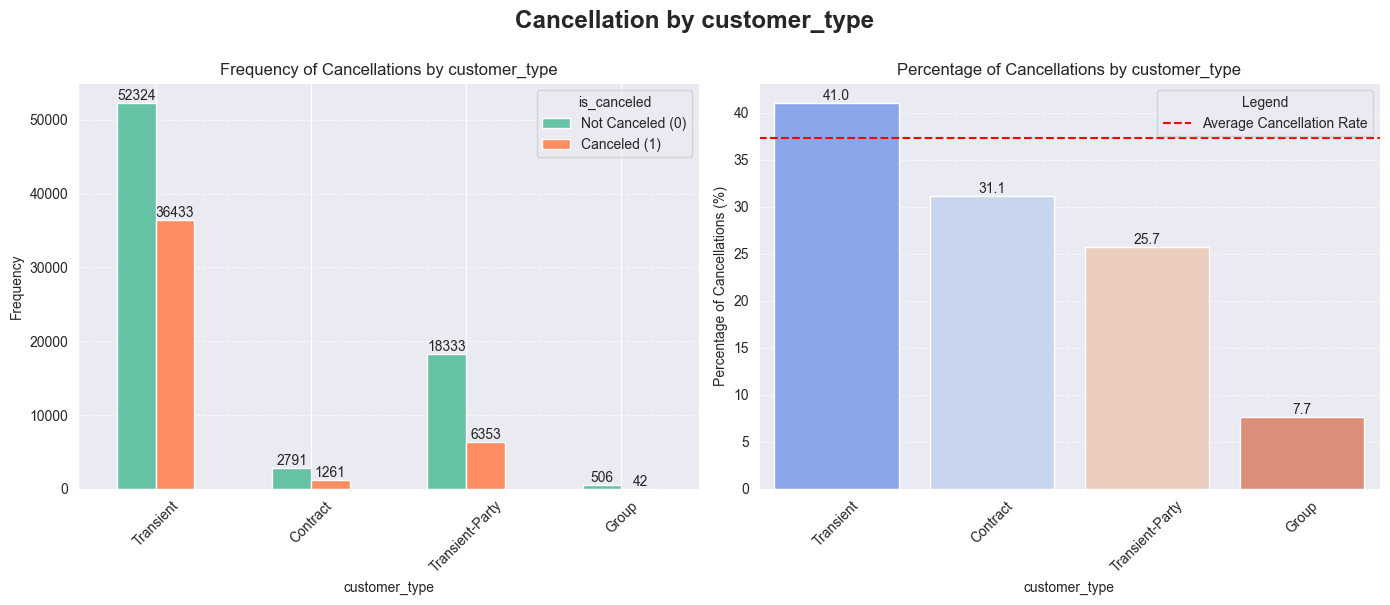

In [33]:
df1 = df.copy()
category_col = 'customer_type'
percentage_threshold = 0
sort = True

counts = df1[category_col].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < percentage_threshold].index  # Identify rare labels

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")
    
# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari persentase `customer` dan pembagian `hotel`:

1.  **Tingkat Pembatalan Tertinggi Didominasi oleh Pelanggan Transien**:
    *   Pelanggan dengan klasifikasi **transien** menunjukkan **angka pembatalan teratas**, mencapai **41,0%**, yang berasal dari **36.433 pembatalan** dari total **88.757 pemesanan**.
    *   Tipe pelanggan ini lazimnya meliputi **pelancong individu** yang memesan **masa inap singkat**, seringkali untuk tujuan **rekreasi atau perjalanan bisnis yang sifatnya mendadak**.  Probabilitas pembatalan yang lebih tinggi mengindikasikan **tingkat fleksibilitas atau kecenderungan perubahan rencana perjalanan yang lebih besar** dibandingkan segmen pelanggan lainnya.

2.  **Pelanggan Kontrak Menunjukkan Tingkat Pembatalan yang Moderat**:
    *   Kategori **pelanggan kontrak** mencatat tingkat pembatalan **moderat** sebesar **31,1%**, yang dihitung dari **1.261 pembatalan** dari **4.052 pemesanan**.
    *   **Pelanggan kontrak** kemungkinan besar merepresentasikan **pemesanan korporat atau pengaturan akomodasi jangka panjang**. Tingkat pembatalan yang lebih rendah pada segmen ini mencerminkan **rencana perjalanan yang lebih terstruktur** dan **minim potensi perubahan atau pembatalan yang bersifat impulsif**.

3.  **Tingkat Pembatalan Moderat Juga Terlihat pada Pelanggan Transien-Kelompok**:
    *   **Pelanggan transien-kelompok** memiliki tingkat pembatalan **moderat** sebesar **25,7%**, dengan **6.353 pembatalan** dari **24.686 pemesanan**.
    *   Kategori ini mencakup **pelanggan yang bepergian dalam rombongan tetapi melakukan pemesanan secara terpisah**. Tingkat pembatalan yang **lebih rendah dibandingkan pelanggan transien individu** mungkin disebabkan oleh **perjalanan kelompok yang seringkali memerlukan koordinasi lebih intensif** dan **lebih sedikit ruang untuk perubahan rencana secara fleksibel**.

4.  **Pelanggan Grup Meraih Tingkat Pembatalan Terendah**:
    *   **Pelanggan grup** memegang rekor sebagai segmen dengan tingkat pembatalan **terendah**, yaitu hanya **7,7%**. Angka ini didapatkan dari **42 pembatalan** dari total **548 pemesanan**.
    *   Temuan ini mengisyaratkan bahwa **pemesanan grup besar**, yang umumnya ditujukan untuk **acara atau tur yang terorganisir**, cenderung **lebih stabil dan kecil kemungkinan untuk dibatalkan**. Hal ini dikarenakan pemesanan grup biasanya **direncanakan jauh hari** dan melibatkan **koordinasi yang signifikan**, sehingga pembatalan menjadi lebih jarang terjadi.


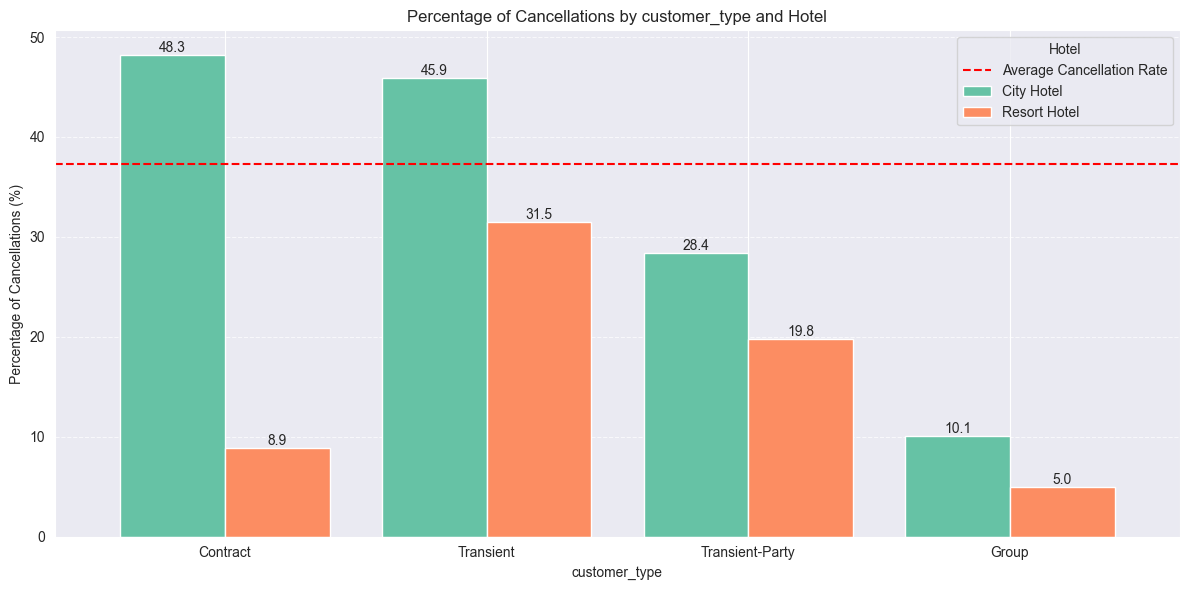

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salin DataFrame
df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Hitung persentase
counts = df1[category_col].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Grupkan data berdasarkan hotel dan kategori
grouped = df1.groupby(['hotel', category_col])['is_canceled'].mean().reset_index()

# Hitung persentase pembatalan
grouped['percentage'] = grouped['is_canceled'] * 100

# Urutkan berdasarkan persentase secara menurun
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot DataFrame untuk plotting
pivot_table = grouped.pivot(index=category_col, columns='hotel', values='percentage')
if sort:
    pivot_table = pivot_table.sort_values(by='City Hotel', ascending=False)

# Buat bar plot dengan palet warna yang menarik
colors = sns.color_palette("Set2")
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Tambahkan label data
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title(f'Percentage of Cancellations by {category_col} and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Dari visualisasi persentase `customer_type` dan pembagian `hotel` diatas kesimpulan yang ditarik adalah:

1.  **Kontras Tajam pada Tingkat Pembatalan Pelanggan Kontrak Antara Hotel Kota dan Resor**:
    *   **Perbedaan mencolok** dalam tingkat pembatalan pelanggan kontrak terlihat antara **Hotel Kota** dan **Hotel Resor**. **Hotel Kota** mencatat tingkat pembatalan yang **tinggi** sebesar **48,3%**, sementara **Hotel Resor** jauh lebih stabil dengan tingkat pembatalan **8,9%**.
    *   Implikasinya adalah bahwa **pemesanan kontrak di Hotel Kota cenderung lebih fluktuatif**, kemungkinan disebabkan oleh **ketidakpastian rencana perjalanan bisnis atau korporat**. Sebaliknya, **Hotel Resor** menarik **pemesanan kontrak yang lebih stabil**, yang bisa dikaitkan dengan **masa inap yang lebih terencana dan berorientasi pada liburan**.

2.  **Hotel Kota Lebih Rentan Terhadap Pembatalan dari Pelanggan Transien**:
    *   Untuk kategori **pelanggan transien**, **Hotel Kota** menunjukkan tingkat pembatalan sebesar **45,9%**. Angka ini **lebih tinggi** dibandingkan dengan **Hotel Resor** yang mencatat **31,5%**.
    *   **Pelanggan transien**, yang umumnya memesan **masa inap lebih singkat**, tampak **lebih sering membatalkan pemesanan mereka di Hotel Kota**. Hal ini mungkin disebabkan oleh **rencana perjalanan yang lebih fleksibel atau sifatnya yang mendadak**. Tingkat pembatalan yang **lebih rendah di Hotel Resor** mengindikasikan **rencana perjalanan yang lebih pasti**, kemungkinan untuk tujuan **rekreasi atau liburan yang telah direncanakan**.

3.  **Tingkat Pembatalan Moderat Pelanggan Transien-Kelompok Lebih Terlihat di Hotel Kota**:
    *   **Pelanggan transien-kelompok** menunjukkan tingkat pembatalan **moderat**. Namun, **Hotel Kota** mencatat angka yang lebih tinggi (**28,4%**) dibandingkan dengan **Hotel Resor** (**19,8%**).
    *   Temuan ini mengisyaratkan bahwa **pelancong kelompok yang memesan secara terpisah lebih mungkin melakukan pembatalan di Hotel Kota**. Sementara itu, **Hotel Resor** cenderung mengalami **pemesanan yang lebih stabil** dari tipe pelanggan ini, mungkin karena **rencana perjalanan kelompok yang lebih terkoordinasi**, meskipun pemesanan dilakukan individu.

4.  **Stabilitas Pemesanan Grup Terkonfirmasi di Kedua Jenis Hotel**:
    *   **Pelanggan grup** memvalidasi diri sebagai segmen dengan tingkat pembatalan **terendah** di kedua jenis hotel. **Hotel Kota** mencatat tingkat pembatalan **10,1%**, dan **Hotel Resor** bahkan lebih rendah, yaitu **5,0%**.
    *   Hal ini menegaskan bahwa **pemesanan grup adalah yang paling stabil**, terlepas dari jenis hotelnya, dengan **insiden pembatalan yang minimal**. **Perjalanan kelompok**, yang seringkali direncanakan dalam jangka waktu yang panjang dan melibatkan **koordinasi yang signifikan**, secara inheren **kurang fleksibel untuk dibatalkan**.


#### **5.2.9 Bagaimana permintaan akan tempat parkir mobil berkontribusi pada pembatalan reservasi hotel?**



/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/3707797900.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x='required_car_parking_spaces', y='percentage', data=freq_data2, palette='coolwarm')


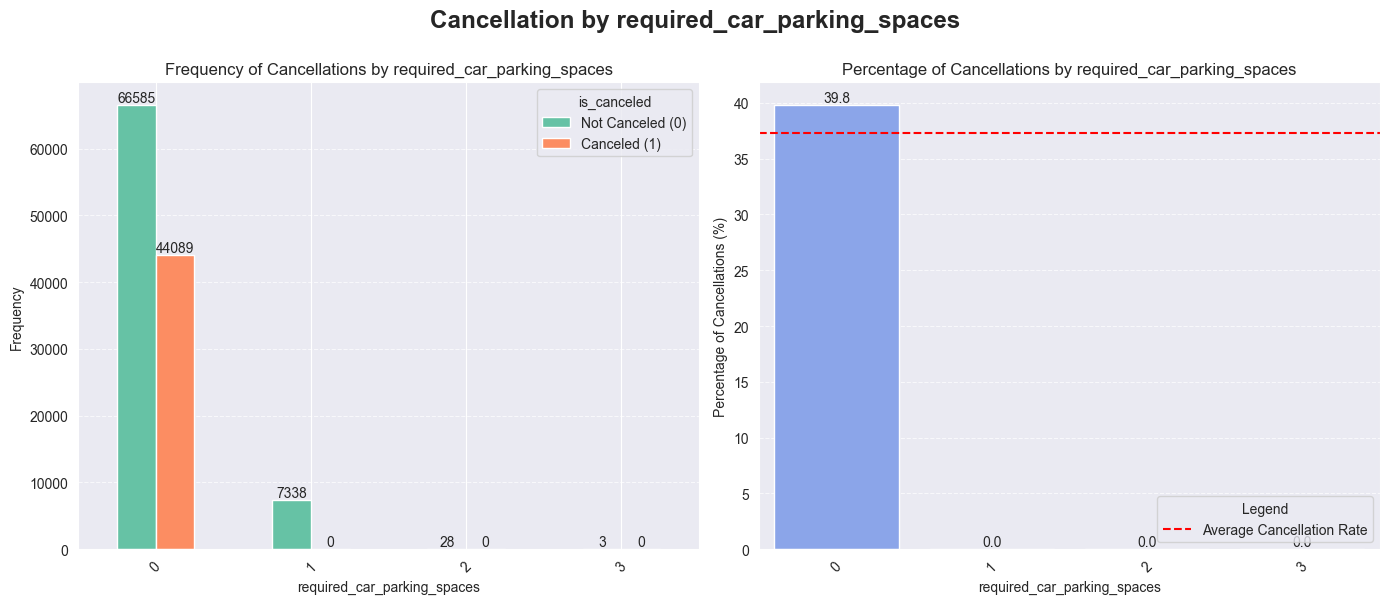

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
counts = df1['required_car_parking_spaces'].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < 0].index  # Identify rare labels

# Replace rare labels with 'Other'
df1['required_car_parking_spaces'] = df1['required_car_parking_spaces'].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or 'required_car_parking_spaces' not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the 'required_car_parking_spaces' column.")

# Frequency data
freq_data = df1.groupby(['required_car_parking_spaces', 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby('required_car_parking_spaces').size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by required_car_parking_spaces', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by required_car_parking_spaces')
plt.xlabel('required_car_parking_spaces')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x='required_car_parking_spaces', y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by required_car_parking_spaces')
plt.xlabel('required_car_parking_spaces')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan kebutuhan tempat parkir yang diminta oleh tamu:

1.  **Mayoritas Pembatalan Terjadi pada Pemesanan Tanpa Kebutuhan Tempat Parkir**:
    *   Sebesar **39,8% dari pemesanan yang tidak menyertakan permintaan tempat parkir akhirnya dibatalkan**.
    *   Tingkat pembatalan yang tinggi ini **mengindikasikan bahwa tamu yang tidak memerlukan fasilitas parkir cenderung lebih mungkin untuk membatalkan reservasi mereka**. Fenomena ini mungkin **mencerminkan karakteristik pelancong yang lebih transien atau memiliki durasi inap yang pendek**, sehingga **komitmen terhadap reservasi menjadi lebih rendah**.

2.  **Minimnya Pembatalan Ditemukan pada Tamu yang Membutuhkan Satu atau Lebih Tempat Parkir**:
    *   Untuk pemesanan yang **menyertakan permintaan 1, 2, atau bahkan 3 tempat parkir, tercatat tidak ada insiden pembatalan sama sekali**.
    *   Temuan ini **menegaskan bahwa tamu yang membutuhkan tempat parkir** cenderung memiliki **rencana perjalanan yang lebih terstruktur dan pasti**. Kemungkinan besar, hal ini disebabkan karena **mereka menggunakan kendaraan pribadi untuk mencapai tujuan** dan telah memiliki **rencana perjalanan yang lebih matang**, sehingga pembatalan menjadi sangat kecil kemungkinannya.


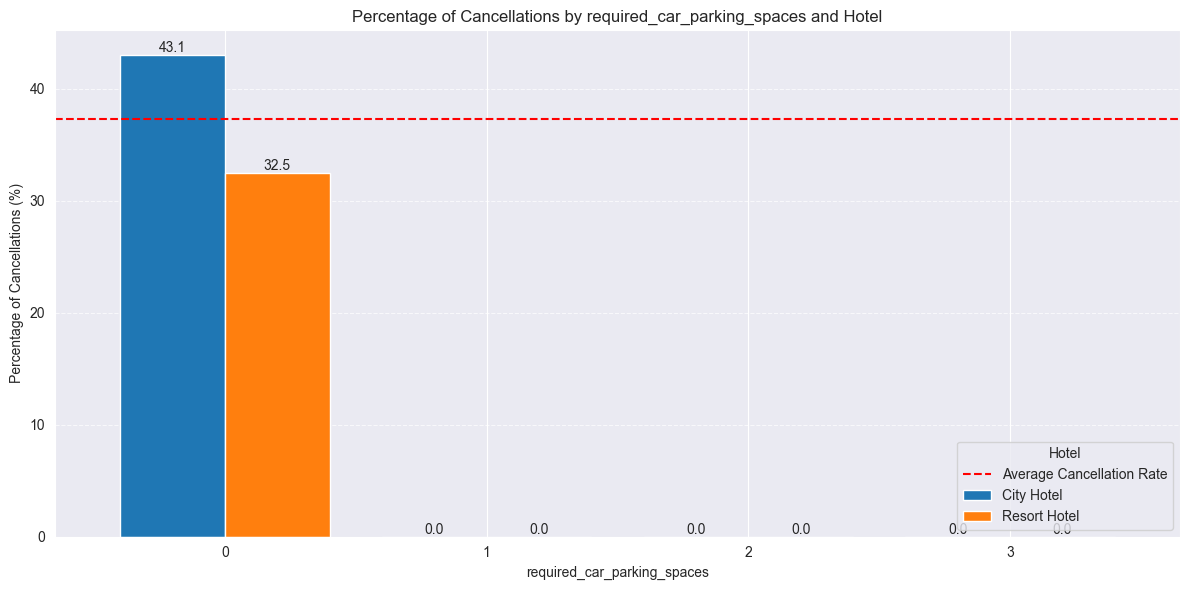

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')
counts = df1['required_car_parking_spaces'].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < 0].index  # Identify rare labels
df1['required_car_parking_spaces'] = df1['required_car_parking_spaces'].replace(rare_labels, 'Other')    
grouped = df1.groupby(['hotel', 'required_car_parking_spaces'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped['percentage'] = grouped['is_canceled'] * 100

# Sort by percentage in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot the DataFrame for better plotting
pivot_table = grouped.pivot(index='required_car_parking_spaces', columns='hotel', values='percentage')

# Create a bar plot
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by required_car_parking_spaces and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('required_car_parking_spaces')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut kesimpulan yang ditarik dari persentase **`required_car_parking_spaces`** dan pembagian **hotel**:

1.  **Tingkat Pembatalan Lebih Tinggi di Hotel Kota bagi Tamu Tanpa Parkir**:
    *   **Hotel Kota memperlihatkan tingkat pembatalan yang lebih tinggi, yaitu 43,1%, pada segmen tamu yang tidak memerlukan tempat parkir**. Sebagai perbandingan, **Hotel Resor** mencatat angka **32,5%** untuk segmen yang sama.
    *   Temuan ini mengisyaratkan bahwa **tamu Hotel Kota yang tidak membutuhkan parkir** kemungkinan besar adalah **pelancong dengan mobilitas tinggi atau pebisnis** yang memiliki **rencana yang lebih fleksibel atau durasi tinggal yang singkat**. Kondisi ini berkontribusi pada **tingkat pembatalan yang lebih tinggi**. Sebaliknya, **Hotel Resor** cenderung menarik **pelancong dengan tujuan rekreasi yang lebih dominan** dan **rencana yang lebih terstruktur**, bahkan di antara mereka yang tidak memerlukan fasilitas parkir.

2.  **Stabilitas Pemesanan Terjamin bagi Tamu yang Membutuhkan Tempat Parkir**:
    *   **Tidak tercatat adanya pembatalan** di kedua jenis hotel, baik **Hotel Kota maupun Resor**, untuk kategori tamu yang **memerlukan 1, 2, atau 3 tempat parkir**.
    *   Hal ini menegaskan bahwa **tamu yang menunjukkan kebutuhan akan tempat parkir** cenderung memiliki **komitmen yang lebih kuat terhadap rencana perjalanan mereka**. Kemungkinan besar, **ketergantungan pada kendaraan pribadi sebagai moda transportasi** menjadi faktor yang melatarbelakangi **kecilnya kemungkinan pembatalan reservasi**.


#### **5.2.10 Apakah banyaknya permintaan khusus fasilitas hotel merupakan faktor yang mempengaruhi pembatalan reservasi?**


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/475856133.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


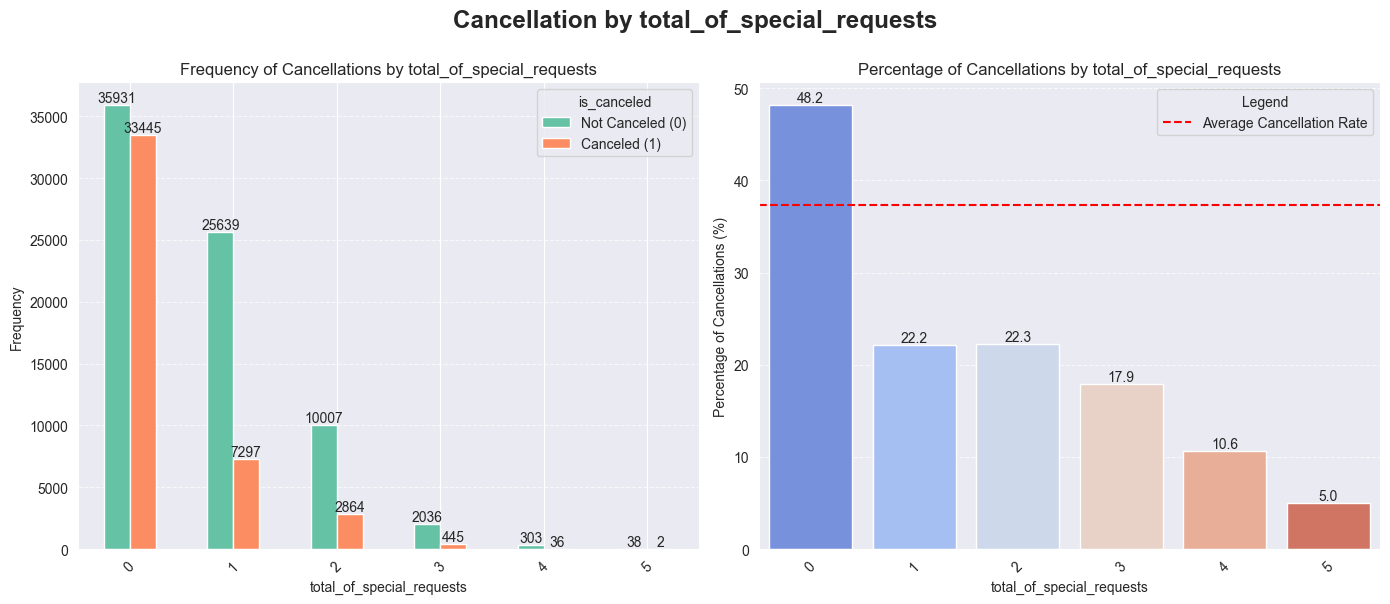

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
category_col = 'total_of_special_requests'
percentage_threshold = 0
sort = False

counts = df1[category_col].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < percentage_threshold].index  # Identify rare labels

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")
    
# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan jumlah permintaan khusus yang diajukan oleh tamu:

1.  **Segmen Tamu Tanpa Permintaan Khusus Mendominasi Tingkat Pembatalan Tertinggi**:
    *   **Tamu yang tidak menyampaikan permintaan khusus** mencatatkan tingkat pembatalan **tertinggi** dibandingkan kategori lain, yaitu **48,2%**.
    *   Temuan ini mengimplikasikan bahwa **tamu dalam segmen ini mungkin memiliki komitmen yang lebih rendah terhadap reservasi yang telah dibuat**. Kemungkinan besar, mereka melakukan pemesanan yang sifatnya **lebih tentatif** tanpa kebutuhan spesifik yang mendasari, sehingga **pembatalan menjadi opsi yang lebih mudah untuk dilakukan**.

2.  **Permintaan Khusus Satu dan Dua Menunjukkan Stabilitas yang Lebih Baik Namun Tetap dengan Tingkat Pembatalan Moderat**:
    *   **Tamu yang mengajukan satu permintaan khusus** memiliki tingkat pembatalan **22,2%**, dan mereka yang dengan **dua permintaan khusus** menunjukkan tingkat yang **serupa**, yaitu **22,3%**.
    *   Data ini mengindikasikan bahwa meskipun tamu-tamu ini **lebih mungkin untuk membatalkan** dibandingkan dengan mereka yang memiliki lebih banyak permintaan, mereka secara relatif **lebih berkomitmen** jika dibandingkan dengan segmen tamu yang **tidak mengajukan permintaan khusus sama sekali**. Tingkat pembatalan pada kategori ini dapat dikategorikan sebagai **moderat**.

3.  **Penurunan Tingkat Pembatalan Seiring dengan Peningkatan Jumlah Permintaan Khusus (Tiga Permintaan atau Lebih)**:
    *   **Tingkat pembatalan terus menurun** seiring dengan bertambahnya jumlah permintaan khusus. Untuk tamu yang mengajukan **tiga permintaan**, tingkat pembatalan turun menjadi **17,9%**. Penurunan ini berlanjut untuk **empat dan lima permintaan**, dengan tingkat pembatalan masing-masing **10,6% dan 5,0%**.
    *   Tren ini mengisyaratkan bahwa **tamu yang menyampaikan beberapa permintaan spesifik lebih cenderung untuk mempertahankan reservasi mereka**. Kemungkinan besar, **pemesanan yang disertai banyak permintaan** ini bersifat **lebih personalisasi**, yang mencerminkan **komitmen yang lebih kuat** terhadap rencana masa inap mereka.


### **5.3 Berdasarkan Karakteristik Tamu**

#### **5.3.1 Apakah jumlah tamu dalam satu pemesanan memengaruhi pembatalan hotel?**



/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/4036379853.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')  # Change bar color here


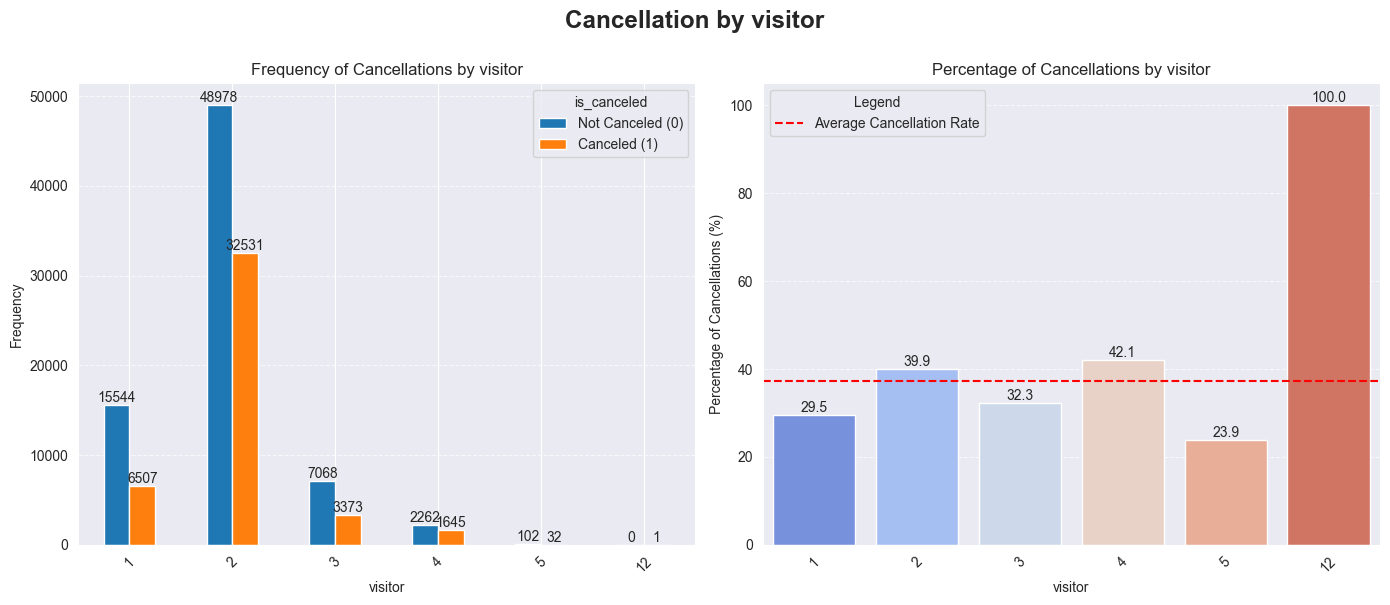

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
category_col = 'visitor'
percentage_threshold = 0
sort = False

counts = df1[category_col].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < percentage_threshold].index  # Identify rare labels

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])  # Change bar colors here
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')  # Change bar color here
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan jumlah tamu per pemesanan:

1.  **Kelompok dengan Dua Tamu Mencatatkan Frekuensi Pembatalan Paling Menonjol**:
    *   Kelompok pemesanan dengan **jumlah tamu terbanyak** adalah kelompok **dua pengunjung**, yang juga menunjukkan **tingkat pembatalan tertinggi**, yaitu **39,9%**. Hal ini mengisyaratkan bahwa **pasangan atau kelompok kecil** memiliki kecenderungan yang lebih kuat untuk membatalkan reservasi hotel mereka.
    *   Fenomena ini mungkin dipicu oleh **rencana perjalanan yang lebih fleksibel** atau **ketidakpastian yang lebih tinggi** terkait dengan **pengaturan perjalanan bersama** dalam kelompok kecil.

2.  **Tingkat Pembatalan Pengunjungg Tunggal Tergolong Moderat**:
    *   Pemesanan yang dilakukan untuk **satu pengunjung (pelancong tunggal)** memiliki tingkat pembatalan **29,5%**. Angka ini **relatif lebih rendah** jika dibandingkan dengan kelompok dua tamu atau lebih.
    *   Hal ini mengindikasikan bahwa **pelancong solo** mungkin **lebih teguh dengan rencana perjalanan** mereka, kemungkinan karena **komplikasi logistik yang lebih sedikit** yang biasanya menyertai perjalanan solo dibandingkan perjalanan berkelompok.

3.  **Persentase Pembatalan Tertinggi Ditemukan pada Kelompok Empat Tamu**:
    *   Meskipun **jumlah total pemesanan lebih sedikit**, **kelompok empat pengunjung** justru mencatat **persentase pembatalan tertinggi**, yaitu **42,1%**.
    *   Kondisi ini mungkin disebabkan karena **pemesanan untuk kelompok yang lebih besar** seringkali melibatkan **pengaturan perjalanan yang lebih kompleks**. Akibatnya, **potensi pembatalan meningkat** seiring dengan perubahan rencana yang mungkin terjadi dalam kelompok tersebut.

4.  **Kasus Eksepsional pada Pemesanan untuk 12 Tamu**:
    *   Terdapat **tingkat pembatalan sempurna (100%)** pada kasus yang **sangat jarang terjadi** yaitu pemesanan untuk **dua belas pengunjung**. Kendati hanya ada **satu pemesanan** dalam kategori ini, data ini mengilustrasikan bahwa **kelompok dengan jumlah tamu yang sangat besar** berpotensi menghadapi **tingkat ketidakpastian pemesanan yang ekstrem**.

5.  **Pemesanan untuk Lima Tamu Menunjukkan Stabilitas dengan Tingkat Pembatalan Terendah**:
    *   Pemesanan yang ditujukan untuk **lima pengunjung** tercatat sebagai **paling stabil**, dengan **tingkat pembatalan terendah** sebesar **23,9%**.
    *   Temuan ini mengindikasikan bahwa **kelompok dengan ukuran lima orang** cenderung **lebih kecil kemungkinannya untuk membatalkan** dibandingkan dengan kelompok yang berukuran lebih kecil maupun lebih besar.


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/1640025801.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')  # Change bar color here


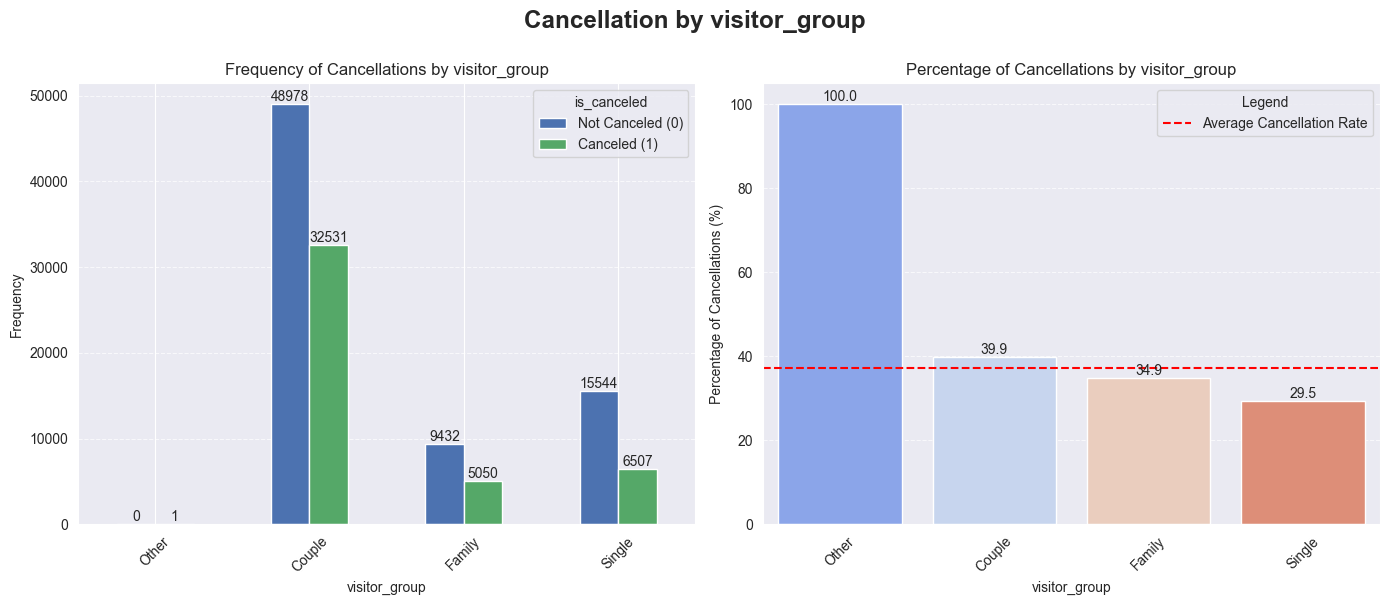

In [39]:
df1 = df.copy()
category_col = 'visitor_group'
percentage_threshold = 5
sort = True

counts = df1[category_col].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < percentage_threshold].index  # Identify rare labels

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")
    
# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=['#4c72b0', '#55a868'])  # Change bar colors here
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')  # Change bar color here
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan tipe pengunjung:

1.  **Dominasi Pembatalan pada Kategori Pasangan**:
    *   Pemesanan yang berasal dari **pasangan** mendominasi *dataset* dan sekaligus menunjukkan **tingkat pembatalan tertinggi**, yaitu **39,9%**.
    *   Hal ini mengindikasikan bahwa meskipun **pasangan merupakan tipe pengunjung yang paling umum**, mereka juga memiliki **probabilitas yang cukup besar untuk melakukan pembatalan**. Kemungkinan pemicunya adalah **rencana perjalanan yang lebih adaptif** atau **kemudahan dalam memodifikasi rencana** karena hanya melibatkan dua orang.

2.  **Tingkat Pembatalan Moderat pada Segmen Keluarga**:
    *   **Keluarga** mencatatkan tingkat pembatalan **moderat** sebesar **34,9%**, sedikit di bawah tingkat pembatalan pasangan.
    *   Perjalanan yang melibatkan **keluarga** mungkin **lebih stabil** dibandingkan pasangan, meskipun tetap menunjukkan **kecenderungan pembatalan yang signifikan**. Kompleksitas dalam **mengorganisir perjalanan untuk banyak orang** bisa menjadi salah satu faktor yang memengaruhi tingkat pembatalan pada segmen keluarga.

3.  **Ketidakpastian Ekstrem pada Pemesanan Kelompok Besar (Tingkat Pembatalan 100%)**:
    *   Meskipun **jarang terjadi**, pemesanan yang dilakukan oleh **kelompok besar** menunjukkan **tingkat pembatalan 100%**. Fenomena ini menegaskan bahwa pemesanan untuk kelompok besar **sangat tidak pasti**.
    *   Tingginya tingkat pembatalan ini mungkin mencerminkan **kesulitan dalam mengkoordinasikan perjalanan untuk rombongan besar** atau **kerapnya terjadi perubahan rencana** dalam kelompok tersebut.

4.  **Pengunjung Tunggal Sebagai Segmen dengan Tingkat Pembatalan Terendah**:
    *   **Pengunjung tunggal** atau **pelancong solo** memperlihatkan tingkat pembatalan **terendah** di antara semua kelompok pengunjung, yaitu **29,5%**.
    *   **Pengunjung tunggal** kemungkinan **lebih teguh pada pemesanan mereka**, yang bisa jadi disebabkan oleh **komplikasi logistik yang lebih minim** dibandingkan dengan perjalanan berpasangan atau berkeluarga.


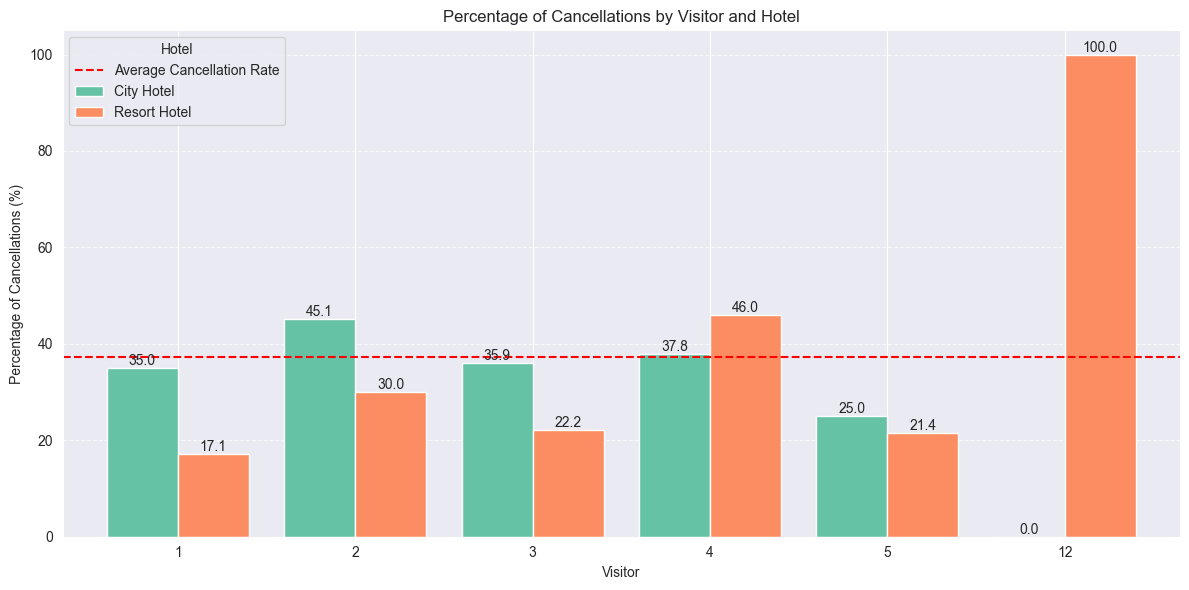

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')
counts = df1['visitor'].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < 0].index  # Identify rare labels
df1['visitor'] = df1['visitor'].replace(rare_labels, 'Other')    
grouped = df1.groupby(['hotel', 'visitor'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped['percentage'] = grouped['is_canceled'] * 100

# Sort by percentage in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot the DataFrame for better plotting
pivot_table = grouped.pivot(index='visitor', columns='hotel', values='percentage')

# Create a bar plot with a seaborn color palette
colors = sns.color_palette("Set2")  # Use a seaborn color palette
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Visitor and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Visitor')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()




Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan ukuran kelompok pengunjung dan jenis hotel:

1.  **Preferensi Pembatalan Lebih Rendah di Hotel Resor untuk Kelompok Pengunjung Tunggal**:
    *   **Hotel Kota** mencatat tingkat pembatalan **35,0%** untuk **pelancong tunggal**. Sebaliknya, **Hotel Resor** menunjukkan angka yang **signifikan lebih rendah**, yaitu **17,1%**.
    *   Temuan ini mengindikasikan bahwa **pelancong solo yang memilih resor cenderung lebih mantap dengan pemesanan mereka**. Hal ini mungkin dikarenakan **adanya aktivitas rekreasi yang telah direncanakan di resor**, sementara **di hotel kota, rencana perjalanan pelancong tunggal kemungkinan besar lebih fleksibel**.

2.  **Peningkatan Kecenderungan Pembatalan di Hotel Kota pada Kelompok Pengunjung Berukuran Dua**:
    *   **Kelompok pengunjung berukuran dua**, yang diasumsikan sebagai **pasangan**, memperlihatkan tingkat pembatalan **lebih tinggi di Hotel Kota** (**45,1%**) dibandingkan **Hotel Resor** (**30,0%**).
    *   Kondisi ini mengisyaratkan bahwa **pasangan yang melakukan perjalanan ke kota lebih berpotensi untuk mengubah rencana atau melakukan pemesanan yang sifatnya spekulatif**.

3.  **Pembatalan Lebih Tinggi di Hotel Resor pada Kelompok Pengunjung Ukuran Sedang (3 dan 4)**:
    *   Untuk **kelompok berukuran 3**, **Hotel Kota** menunjukkan tingkat pembatalan **35,9%**, sedangkan **Hotel Resor lebih rendah di 22,2%**. Namun, tren ini berbalik untuk **kelompok berukuran 4**, di mana **Hotel Resor** mencatatkan tingkat pembatalan yang **lebih tinggi** (**46,0%**) dibandingkan **Hotel Kota** (**37,8%**).
    *   Hal ini menunjukkan bahwa **kelompok dengan ukuran yang lebih besar** mungkin **menghadapi tantangan koordinasi perjalanan ke resor yang lebih kompleks**, yang pada akhirnya **meningkatkan potensi terjadinya pembatalan**.

4.  **Untuk kelompok pengunjung berukuran 5 atau lebih, kecenderungan pembatalan di City Hotels relatif lebih rendah.**:
    *   Untuk **kelompok berukuran 5**, **Hotel Kota** menunjukkan tingkat pembatalan **25,0%**, dibandingkan dengan **Hotel Resor** yang sedikit lebih rendah di **21,4%**. Ini menandakan bahwa **pemesanan untuk kelompok yang lebih besar cukup stabil di kedua jenis hotel**.

5.  **Kasus Ekstrem Pembatalan 100% pada Kelompok Pengunjung Berukuran 12 di Hotel Resor**:
    *   Ukuran kelompok yang **tidak lazim**, yaitu **12 pengunjung**, mencatat **tingkat pembatalan 100% di Hotel Resor**. Ini mengindikasikan adanya **kemungkinan pemesanan spekulatif yang sangat tinggi** atau **kesulitan signifikan dalam mengkoordinasi rencana perjalanan kelompok yang sangat besar**, khususnya untuk akomodasi resor.


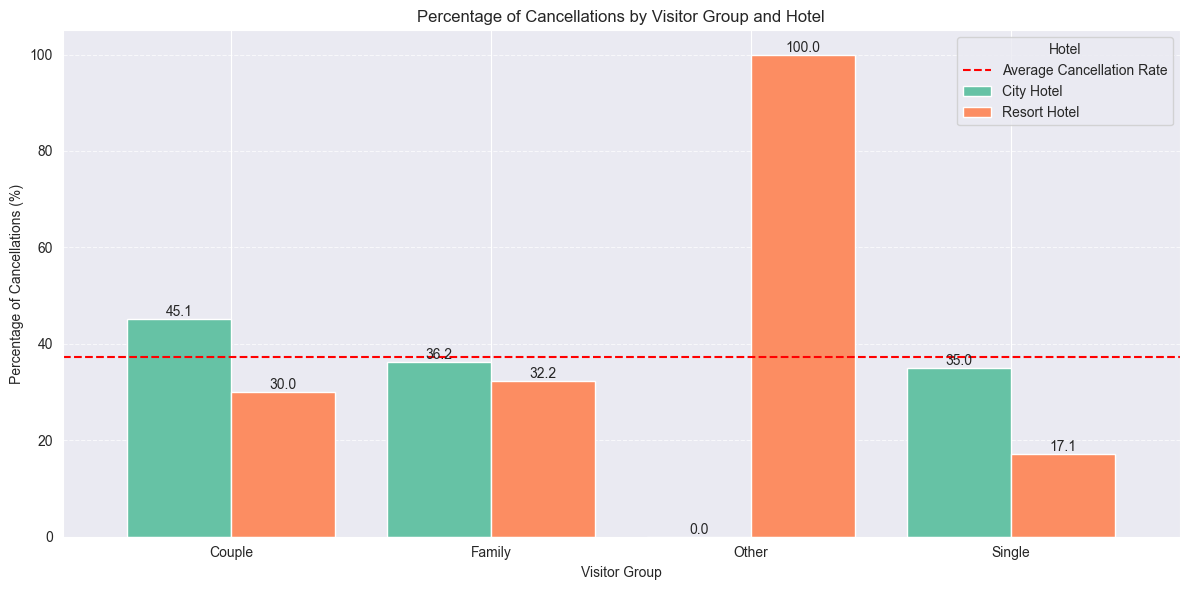

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')
counts = df1['visitor_group'].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < 5].index  # Identify rare labels
df1['visitor_group'] = df1['visitor_group'].replace(rare_labels, 'Other')    
grouped = df1.groupby(['hotel', 'visitor_group'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped['percentage'] = grouped['is_canceled'] * 100

# Sort by percentage in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot the DataFrame for better plotting
pivot_table = grouped.pivot(index='visitor_group', columns='hotel', values='percentage')

# Create a bar plot with a seaborn color palette
colors = sns.color_palette("Set2")  # Use a seaborn color palette
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Visitor Group and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Visitor Group')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()



Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan tipe pengunjung dan jenis hotel:

1.  **Kecenderungan Pembatalan Lebih Tinggi pada Pasangan di Hotel Kota**:
    *   **Pasangan** memperlihatkan tingkat pembatalan yang **lebih tinggi di Hotel Kota**, mencapai **45,1%**. Sebagai perbandingan, di **Hotel Resor**, tingkat pembatalan untuk segmen pasangan adalah **30,0%**.
    *   Data ini mengindikasikan bahwa **pasangan yang memilih akomodasi di perkotaan** mungkin memiliki **rencana perjalanan yang lebih fleksibel** atau cenderung melakukan **pemesanan yang lebih spekulatif**. Sebaliknya, **menginap di resor** bagi pasangan umumnya **berkaitan dengan rencana liburan yang lebih matang dan terencana**, sehingga **meminimalisir potensi pembatalan**.

2.  **Tingkat Pembatalan Relatif  pada Keluarga di Berbagai Jenis Hotel**:
    *   **Keluarga** menunjukkan tingkat pembatalan yang **relatif serupa** di kedua jenis hotel. Di **Hotel Kota**, tingkat pembatalan keluarga tercatat **36,2%**, sedangkan di **Hotel Resor** sebesar **32,2%**.
    *   **Kesamaan tingkat pembatalan ini** mengisyaratkan bahwa **perjalanan keluarga, baik ke kota maupun resor, cenderung lebih stabil**. Meskipun demikian, **perjalanan ke kota masih menunjukkan sedikit lebih banyak pembatalan**, yang mungkin disebabkan oleh **pengaturan perjalanan yang lebih adaptif** atau **durasi masa inap yang cenderung lebih pendek**.

3.  **Pemesanan Kelompok Besar Sangat Tidak Pasti di Hotel Resor (Tingkat Pembatalan 100%)**:
    *   **Kelompok besar** mencatatkan tingkat pembatalan **sempurna (100%) di Hotel Resor**. Hal ini mengindikasikan adanya **perilaku pemesanan yang spekulatif atau sangat mendadak** untuk perjalanan kelompok besar, khususnya di resor.
    *   Tingkat pembatalan ekstrem ini kemungkinan **mencerminkan kesulitan yang inheren dalam mengkoordinasi perjalanan rombongan besar** atau **tingginya frekuensi perubahan rencana** yang terjadi dalam konteks perjalanan kelompok.

4.  **Tamu Tunggal Lebih Berkomitmen pada Pemesanan Hotel Resor**:
    *   **Tamu tunggal** atau **solo** membatalkan **35,0%** dari pemesanan mereka di **Hotel Kota**. Namun, **Hotel Resor** menunjukkan tingkat pembatalan yang **jauh lebih rendah**, yaitu hanya **17,1%**.
    *   Temuan ini menunjukkan bahwa **pelancong solo yang memilih destinasi resor lebih cenderung untuk mempertahankan rencana perjalanan mereka**. Kemungkinan besar, hal ini disebabkan oleh **sifat perjalanan resor yang lebih berorientasi pada rekreasi dan relaksasi**, yang umumnya direncanakan dengan lebih matang dan komitmen yang lebih tinggi.


#### **5.3.2 Bagaimana jumlah tamu dewasa, anak-anak, dan bayi dalam reservasi berkontribusi untuk mempengaruhi pembatalan?**




**Berdasarkan Jumlah Tamu Adult**

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/1140149732.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


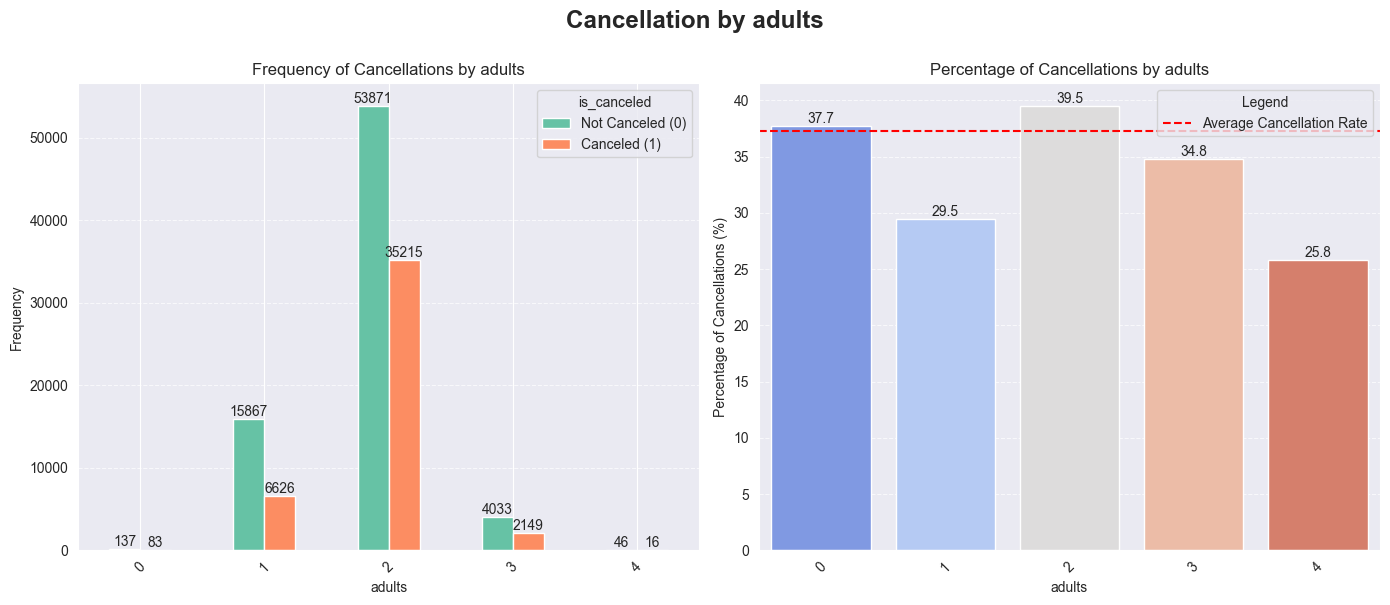

In [42]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the DataFrame
df1 = df.copy()

# Set parameters
category_col = 'adults'
percentage_threshold = 0
sort = False

# Get percentages
counts = df1[category_col].value_counts(normalize=True) * 100

# Identify rare labels
rare_labels = counts[counts < percentage_threshold].index

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan jumlah orang dewasa dalam setiap pemesanan:

1.  **Tingkat pembatalan tertinggi didominasi oleh kelompok dengan dua orang dewasa**:
    *   **Sebagian besar pemesanan ditujukan untuk dua orang dewasa**, dan kelompok ini juga mencatatkan **tingkat pembatalan paling tinggi**, yaitu **39,5%**. Hal ini menjadikan kelompok dua dewasa sebagai yang **paling umum sekaligus paling labil** dalam hal pembatalan pemesanan.
    *   Temuan ini mengisyaratkan bahwa **pasangan dewasa**, yang kemungkinan besar adalah pasangan romantis, mungkin memiliki **rencana perjalanan yang lebih fleksibel** atau cenderung melakukan **pemesanan yang sifatnya lebih spekulatif**.

2.  **Stabilitas Pemesanan Lebih Tinggi pada Kelompok Tiga atau Empat Orang Dewasa**:
    *   Pemesanan untuk **tiga orang dewasa** menunjukkan tingkat pembatalan **34,8%**, sementara pemesanan untuk **empat orang dewasa** justru mencatat **tingkat pembatalan terendah**, yaitu **25,8%**.
    *   Tingkat pembatalan yang **lebih rendah pada kelompok dewasa yang lebih besar** ini mungkin mengindikasikan bahwa mereka memiliki **rencana yang lebih konkret**. Kemungkinan lain, pemesanan untuk kelompok ini dibuat untuk **aktivitas kelompok yang spesifik**, sehingga **meminimalisir potensi pembatalan**.

3.  **Tingkat Pembatalan Moderat pada Pemesanan untuk Satu Orang Dewasa**:
    *   Pemesanan yang ditujukan untuk **satu orang dewasa** memiliki tingkat pembatalan **moderat** sebesar **29,5%**. Angka ini **relatif lebih rendah** dibandingkan kelompok dua dewasa, namun tetap mengisyaratkan adanya **tingkat volatilitas tertentu**.
    *   Hal ini mungkin mencerminkan **fleksibilitas yang dimiliki pelancong individu** atau **kemudahan dalam mengubah rencana perjalanan** ketika hanya melibatkan satu orang saja.

4.  **Pemesanan Tanpa Kehadiran Orang Dewasa (Nol Dewasa) Jarang Terjadi Namun Sangat Rentan Pembatalan**:
    *   Meskipun **kasus pemesanan tanpa orang dewasa (nol dewasa) tergolong langka**, kelompok ini mencatat tingkat pembatalan **tinggi**, yaitu **37,7%**. Temuan ini mengindikasikan bahwa pemesanan semacam ini kemungkinan besar bersifat **spekulatif** atau hanya **sekadar *placeholder***, di mana **tidak ada pelancong aktual yang terlibat** sejak awal.


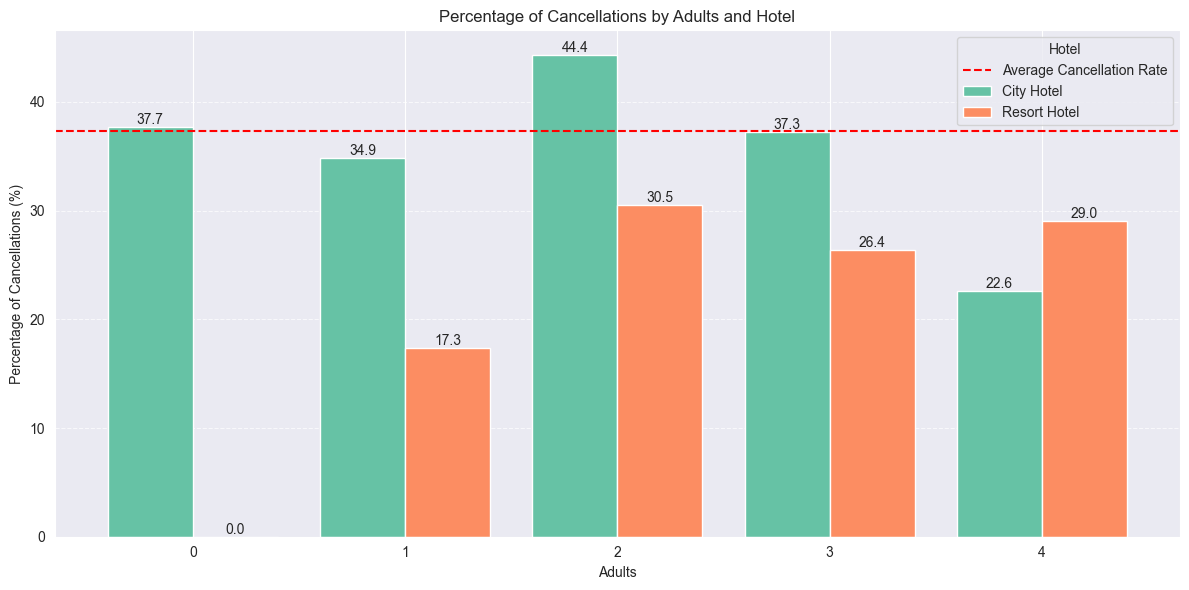

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salin DataFrame
df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Hitung persentase
counts = df1['adults'].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index
df1['adults'] = df1['adults'].replace(rare_labels, 'Other')

# Kelompokkan data berdasarkan 'hotel' dan 'adults'
grouped = df1.groupby(['hotel', 'adults'])['is_canceled'].mean().reset_index()

# Hitung persentase pembatalan
grouped['percentage'] = grouped['is_canceled'] * 100

# Urutkan berdasarkan persentase secara menurun
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot DataFrame untuk plotting
pivot_table = grouped.pivot(index='adults', columns='hotel', values='percentage')

# Plot barchart dengan palet warna yang menarik
colors = sns.color_palette("Set2")
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Tambahkan label data
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Adults and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Adults')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan jumlah orang dewasa per pemesanan dan jenis hotel:

1.  **Kelompok Dua Dewasa di Hotel Kota Merupakan Penyumbang Tingkat Pembatalan Tertinggi**:
    *   **Hotel Kota** mencatatkan tingkat pembatalan **tertinggi** pada pemesanan yang ditujukan untuk **dua orang dewasa**, yaitu **44,4%**. Sebaliknya, **Hotel Resor** menunjukkan tingkat yang **lebih rendah** untuk kategori serupa, yaitu **30,5%**.
    *   Temuan ini mengisyaratkan bahwa **pasangan atau kelompok beranggotakan dua orang yang bepergian ke destinasi perkotaan** lebih cenderung untuk **mengalami perubahan rencana**. Kemungkinan besar, hal ini disebabkan oleh **fleksibilitas atau spontanitas yang lebih tinggi** dalam perjalanan di lingkungan perkotaan.

2.  **Stabilitas Pemesanan Lebih Terlihat pada Pelancong Tunggal di Hotel Resor**:
    *   **Hotel Resor** memperlihatkan tingkat pembatalan yang **jauh lebih rendah** untuk pemesanan **satu orang dewasa** atau pelancong tunggal, yaitu **17,3%**. Angka ini kontras signifikan dengan **Hotel Kota** yang mencatat **34,9%**.
    *   Hal ini dapat mengindikasikan bahwa **pelancong solo yang memilih resor lebih berkomitmen terhadap rencana perjalanan mereka**. Kemungkinan besar, ini dipengaruhi oleh **agenda kegiatan rekreasi yang telah direncanakan sebelumnya** atau **durasi masa inap yang cenderung lebih panjang** di resor.

3.  **Peningkatan Stabilitas Pemesanan Terlihat pada Kelompok Tiga dan Empat Dewasa**:
    *   **Hotel Kota** mencatat tingkat pembatalan **37,3%** untuk pemesanan yang melibatkan **tiga orang dewasa**. Sementara itu, **Hotel Resor** menunjukkan tingkat pembatalan yang **lebih rendah** untuk kelompok dengan jumlah dewasa serupa, yaitu **26,4% untuk tiga dewasa dan 29,0% untuk empat dewasa**.
    *   Tingkat pembatalan yang **lebih rendah pada kelompok tiga dan empat dewasa** ini mungkin mencerminkan karakteristik pemesanan kelompok yang ditujukan untuk **acara atau kegiatan yang telah terencana dengan baik**, sehingga **meminimalisir kemungkinan pembatalan**.

4.  **Fenomena Pemesanan Tanpa Dewasa Terutama Terjadi di Hotel Kota**:
    *   Pemesanan **tanpa orang dewasa**, yang kemungkinan merupakan **pemesanan *placeholder* atau spekulatif**, menunjukkan tingkat pembatalan **37,7%**. Menariknya, fenomena pemesanan tanpa dewasa ini **secara spesifik hanya teramati di Hotel Kota**, mengindikasikan adanya **pola pemesanan yang berbeda antara daerah perkotaan dan resor**.


Berdasarkan Jumlah Tamu Anak-Anak

/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/1140149732.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


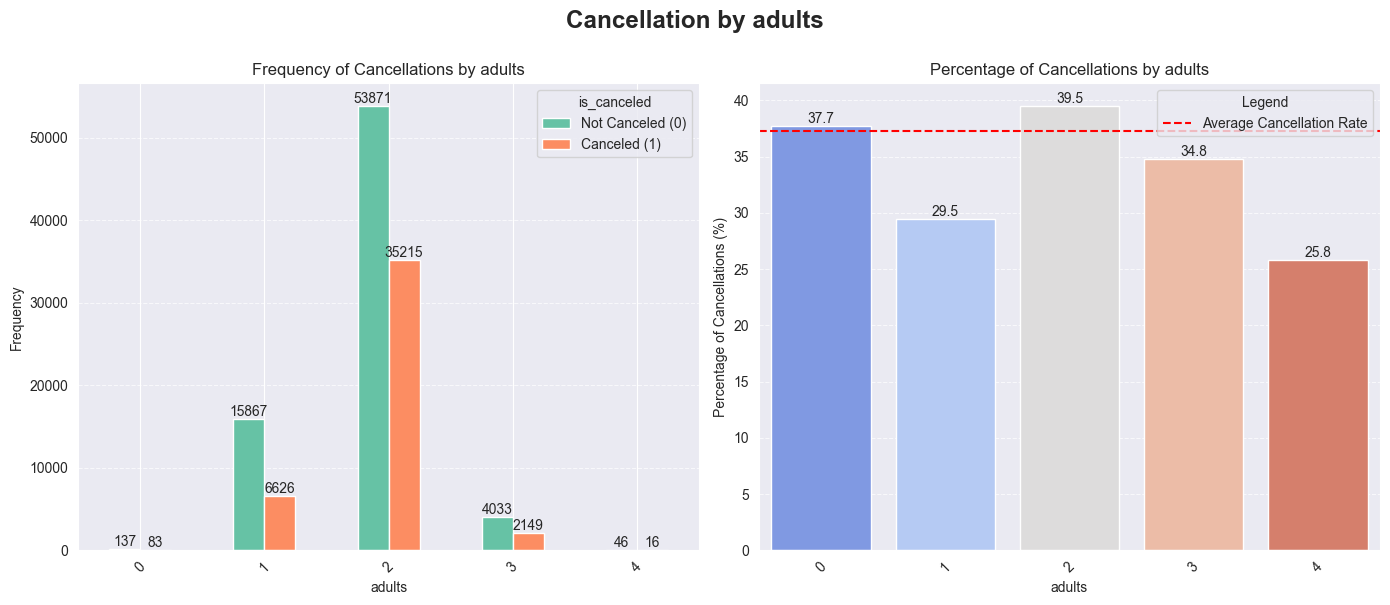

In [44]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the DataFrame
df1 = df.copy()

# Set parameters
category_col = 'adults'
percentage_threshold = 0
sort = False

# Get percentages
counts = df1[category_col].value_counts(normalize=True) * 100

# Identify rare labels
rare_labels = counts[counts < percentage_threshold].index

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan jumlah anak yang disertakan dalam setiap pemesanan:

1.  **Volume Pemesanan Terbesar Tanpa Anak, Namun Tingkat Pembatalan Moderat**:
    *   **Mayoritas pemesanan** hotel adalah **tanpa menyertakan anak**, meskipun demikian, tingkat pembatalannya tercatat **moderat**, yaitu **37,4%**.  Kondisi ini mencerminkan **proporsi perjalanan yang besar dilakukan oleh orang dewasa saja atau pasangan**, di mana **pembatalan mungkin lebih sering terjadi** akibat rencana yang lebih fleksibel.

2.  **Kerentanan pembatalan tertinggi ditunjukkan oleh pemesanan dengan dua anak.**:
    *   Pemesanan yang **melibatkan dua anak** memperlihatkan tingkat pembatalan **tertinggi** dibandingkan kategori lain, mencapai **42,4%**. Hal ini mengindikasikan bahwa **keluarga dengan dua anak** mungkin memiliki **rencana perjalanan yang lebih labil**, yang bisa dipicu oleh **perubahan jadwal keluarga yang lebih dinamis** atau **isu terkait kesehatan anak**.

3.  **Stabilitas Pemesanan Lebih Terlihat pada Keluarga dengan Satu Anak dan Tiga Anak**:
    *   Pemesanan yang menyertakan **satu anak** menunjukkan tingkat pembatalan **32,4%**. Lebih lanjut, pemesanan dengan **tiga anak** mencatatkan tingkat pembatalan **terendah**, yaitu **22,7%**.
    *   Temuan ini mengisyaratkan bahwa **keluarga dengan jumlah anak lebih banyak** cenderung **lebih berkomitmen pada reservasi** mereka. Kemungkinan besar, hal ini dikarenakan **kerumitan yang lebih tinggi dalam mengorganisir perjalanan** untuk unit keluarga yang lebih besar, sehingga pembatalan menjadi opsi yang kurang disukai.

4.  **Outlier terlihat pada kasus pemesanan dengan 10 anak**:
    *   Terdapat **segelintir pemesanan yang melibatkan sepuluh anak**, yang menunjukkan **tingkat pembatalan 100%**.  Kasus ini kemungkinan besar merupakan **anomali** atau mengindikasikan **isu spesifik terkait pemesanan kelompok**, mengingat **ketidaklaziman menyertakan sepuluh anak dalam satu reservasi keluarga**.


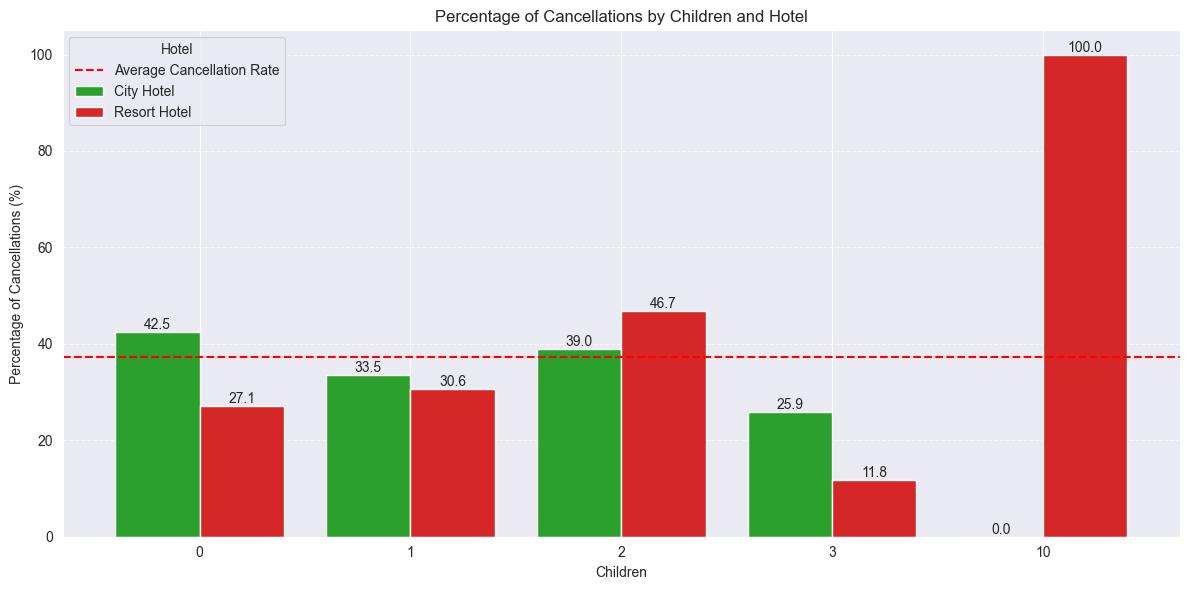

In [45]:
# Salin DataFrame asli
df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Hitung persentase
counts = df1['children'].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index
df1['children'] = df1['children'].replace(rare_labels, 'Other')

# Kelompokkan data berdasarkan hotel dan jumlah anak
grouped = df1.groupby(['hotel', 'children'])['is_canceled'].mean().reset_index()

# Hitung persentase pembatalan
grouped['percentage'] = grouped['is_canceled'] * 100

# Urutkan berdasarkan persentase secara menurun
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot DataFrame untuk mempermudah plotting
pivot_table = grouped.pivot(index='children', columns='hotel', values='percentage')
if sort:
    pivot_table = pivot_table.sort_values(by='City Hotel', ascending=False)

# Buat plot batang dengan warna yang berbeda
colors = ['#2ca02c', '#d62728']  # Warna custom untuk bar
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Tambahkan label data
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Children and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Children')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan jumlah anak dalam pemesanan dan jenis hotel:

1.  **Hotel Kota Lebih Rentan Pembatalan pada Pemesanan Tanpa Anak**:
    *   Dalam kategori pemesanan **tanpa anak**, **Hotel Kota** memperlihatkan tingkat pembatalan yang lebih tinggi, mencapai **42,5%**. Sebaliknya, **Hotel Resor** hanya mencatat **27,1%**.
    *   Hal ini mengisyaratkan bahwa **pemesanan di Hotel Kota menjadi lebih rentan terhadap pembatalan ketika hanya melibatkan orang dewasa**. Kemungkinan penyebabnya adalah **rencana perjalanan yang lebih fleksibel** yang umum terjadi pada perjalanan tanpa anak ke kota.

2.  **Puncak Kerentanan Pembatalan Terjadi pada Pemesanan dengan Dua Anak di Kedua Jenis Hotel**:
    *   **Pemesanan yang menyertakan dua anak** mencapai **puncak tingkat pembatalan**. Angkanya mencapai **39,0% di Hotel Kota** dan **lebih tinggi lagi di Hotel Resor, yaitu 46,7%**.
    *   Temuan ini menegaskan bahwa **perjalanan keluarga dengan dua anak tergolong sangat labil di kedua jenis hotel**. Faktor **kompleksitas dalam perencanaan perjalanan keluarga** kemungkinan besar menjadi pemicu utama ketidakstabilan ini.

3.  **Stabilitas Pemesanan Meningkat pada Keluarga dengan Tiga Anak**:
    *   **Pemesanan untuk tiga anak** menunjukkan tren **lebih stabil**. **Hotel Kota** mencatat tingkat pembatalan **25,9%**, sedangkan **Hotel Resor** bahkan lebih rendah, hanya **11,8%**.
    *   Data ini mengindikasikan bahwa **pemesanan untuk keluarga yang lebih besar cenderung lebih stabil**, terutama ketika memilih **Hotel Resor**. Di resor, **rencana liburan yang lebih terstruktur** diperkirakan turut berperan dalam **menurunkan tingkat pembatalan**.

4.  ***Anomali Pembatalan 100% pada Pemesanan dengan Sepuluh Anak**:
    *   **Jumlah pemesanan yang sangat kecil** yang melibatkan **sepuluh anak di Hotel Resor** menunjukkan **tingkat pembatalan 100%**.  Kondisi ini kemungkinan besar merupakan **anomali statistik**.
    *   Kemungkinan lain, tingkat pembatalan ekstrem ini dapat **berkaitan dengan isu pemesanan kelompok** atau **tantangan logistik yang luar biasa** ketika mengelola pemesanan dengan jumlah anak sebanyak itu.


/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/407749712.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


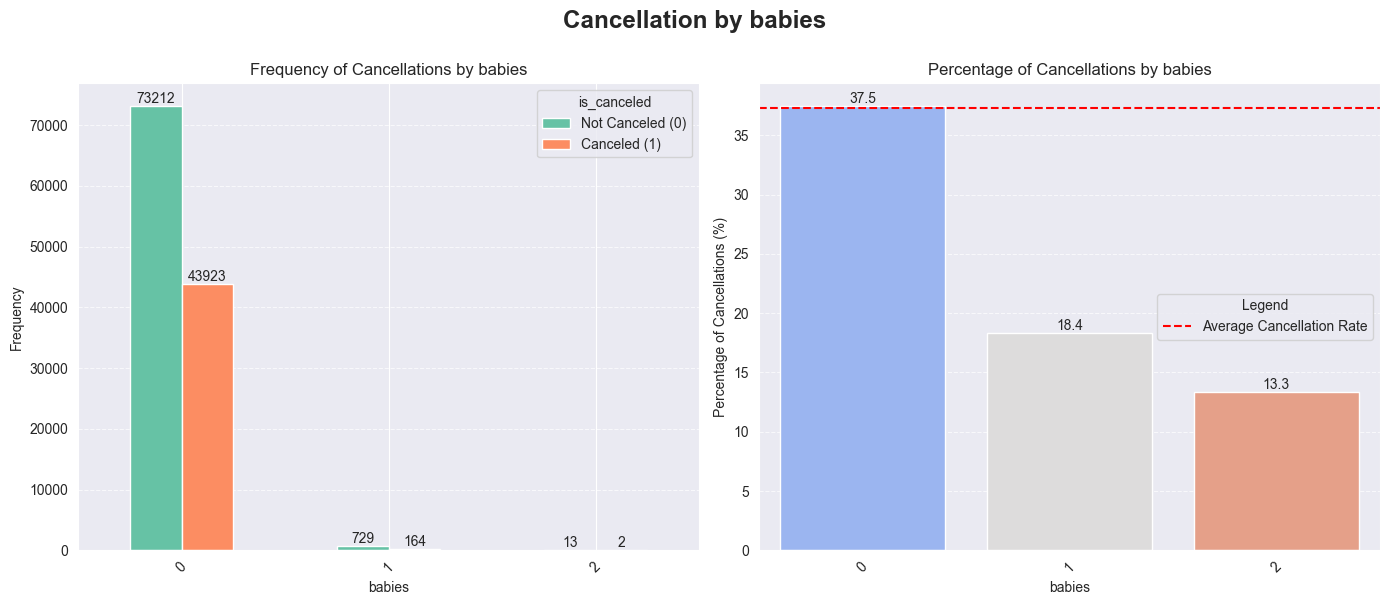

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy DataFrame
df1 = df.copy()

# Tentukan kolom kategori dan threshold persentase
category_col = 'babies'
percentage_threshold = 0
sort = False

# Hitung persentase
counts = df1[category_col].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index

# Ganti label yang jarang dengan 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Periksa apakah kolom 'is_canceled' dan kolom kategori ada
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Data frekuensi
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Data persentase untuk is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set ukuran gambar
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Grafik batang untuk frekuensi pembatalan (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label pada batang frekuensi
for container in ax.containers:
    ax.bar_label(container)

# Grafik batang untuk persentase pembatalan (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Tambahkan label pada batang persentase
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Hitung dan plot garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Tampilkan legenda untuk garis rata-rata
percentage_ax.legend(title='Legend')

# Tampilkan plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan kehadiran bayi dalam pemesanan:

1.  **Preferensi Pembatalan yang Lebih Tinggi pada Pemesanan Tanpa Bayi**:
    *   Pemesanan yang **tidak menyertakan bayi** memperlihatkan tingkat pembatalan yang **cukup tinggi**, yaitu **37,5%**.
    *   Hal ini mengindikasikan bahwa **pelancong yang tidak membawa bayi** cenderung **lebih mungkin untuk melakukan pembatalan**. Kemungkinan penyebabnya adalah **fleksibilitas rencana perjalanan yang lebih besar** atau **kemudahan dalam menyesuaikan jadwal** tanpa mempertimbangkan kebutuhan bayi.

2.  **Komitmen Lebih Kuat Terhadap Pemesanan Terlihat pada Keluarga dengan Satu Bayi**:
    *   Pemesanan yang **melibatkan satu bayi** memiliki tingkat pembatalan yang **secara signifikan lebih rendah**, yaitu hanya **18,4%**.
    *   Temuan ini menunjukkan bahwa **keluarga yang bepergian dengan bayi** cenderung **lebih berkomitmen pada rencana perjalanan mereka**. **Kehadiran bayi** dalam rombongan keluarga mungkin **mendorong terciptanya liburan yang lebih terstruktur dan terencana** sejak awal.

3.  **Pemesanan dengan Dua Bayi Mencapai Tingkat Pembatalan Paling Minimal**:
    *   Tingkat pembatalan terendah justru tercatat pada pemesanan yang **menyertakan dua bayi**, yaitu hanya **13,3%**.
    *   Data ini menegaskan bahwa **pelancong dalam kategori ini** memiliki **tingkat komitmen tertinggi terhadap reservasi mereka**. Kemungkinan besar, **perjalanan dengan lebih dari satu bayi** menuntut **perencanaan yang jauh lebih detail dan matang**, sehingga **meminimalisir kemungkinan terjadinya pembatalan mendadak** setelah pemesanan dibuat.


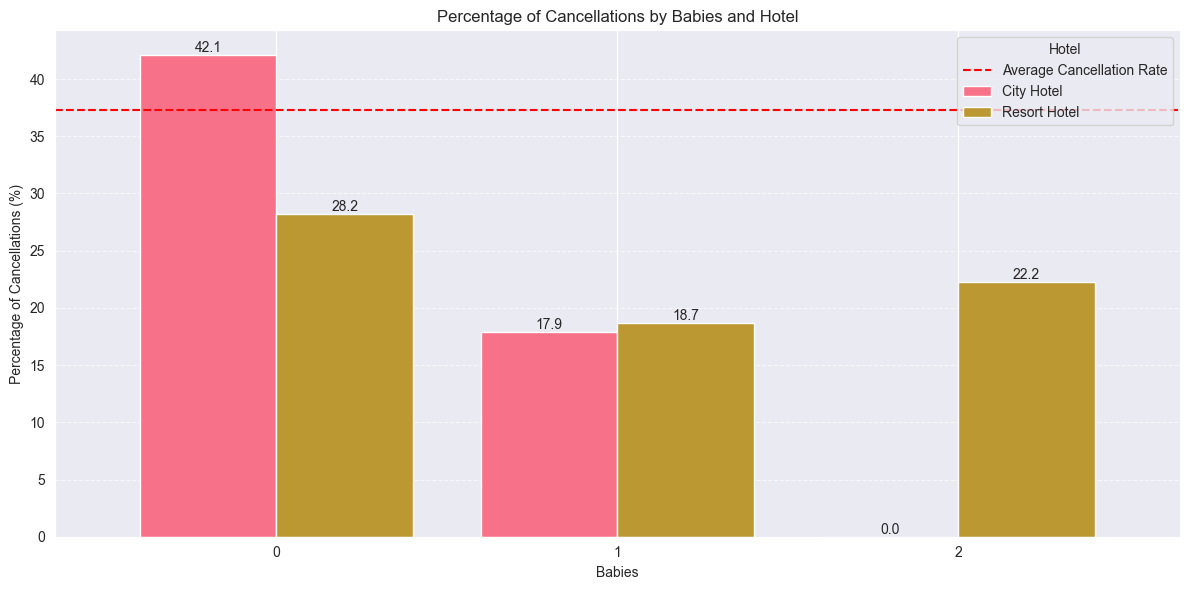

In [47]:

df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')
counts = df1['babies'].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < percentage_threshold].index  # Identify rare labels
df1['babies'] = df1['babies'].replace(rare_labels, 'Other')    
grouped = df1.groupby(['hotel', 'babies'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped['percentage'] = grouped['is_canceled'] * 100

# Sort by percentage in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot the DataFrame for better plotting
pivot_table = grouped.pivot(index='babies', columns='hotel', values='percentage')
if sort:
    pivot_table = pivot_table.sort_values(by='City Hotel', ascending=False)

# Create a bar plot with a seaborn color palette
colors = sns.color_palette("husl")  # Use a seaborn color palette
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Babies and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Babies')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan ada tidaknya bayi dalam pemesanan dan jenis hotel:

1.  **Preferensi Pembatalan Lebih Tinggi di Hotel Kota untuk Pemesanan Tanpa Bayi**:
    *   Dalam kategori pemesanan **tanpa bayi**, **Hotel Kota** memperlihatkan tingkat pembatalan yang **lebih tinggi secara signifikan**, mencapai **42,1%**. Sebagai perbandingan, **Hotel Resor** mencatat angka yang lebih rendah, yaitu **28,2%**.
    *   Temuan ini mengindikasikan bahwa **pelancong yang tidak membawa bayi lebih cenderung untuk membatalkan reservasi mereka ketika memilih Hotel Kota**. Kemungkinan besar, hal ini disebabkan oleh **tingkat fleksibilitas yang lebih besar dalam rencana perjalanan** bagi mereka yang tidak terikat dengan kebutuhan bayi, terutama dalam konteks perjalanan perkotaan.

2.  **Tingkat pembatalan yang lebih rendah dijumpai pada pemesanan keluarga dengan satu bayi.**:
    *   Untuk pemesanan yang **melibatkan satu bayi**, tingkat pembatalan mengalami **penurunan yang signifikan**. **Hotel Kota** mencatatkan angka **17,9%**, dan **Hotel Resor** sedikit lebih tinggi di **18,7%**.
    *   Data ini menunjukkan bahwa **keluarga yang bepergian dengan satu bayi cenderung memiliki pemesanan yang lebih stabil**, **terlepas dari jenis hotel yang dipilih**. Kehadiran bayi tampaknya menjadi faktor pendorong **komitmen yang lebih kuat terhadap rencana perjalanan** keluarga tersebut.

3.  **Stabilitas Tingkat Pembatalan Moderat pada Pemesanan dengan Dua Bayi di Hotel Resor**:
    *   **Hotel Resor** menunjukkan tingkat pembatalan **moderat** sebesar **22,2%** untuk pemesanan yang **menyertakan dua bayi**. Angka ini mencerminkan tingkat stabilitas yang cukup baik, meskipun **data perbandingan untuk Hotel Kota dalam kategori ini tidak tersedia**.


#### **5.3.3 Apakah negara asal tamu merupakan faktor yang mempengaruhi pembatalan reservasi?**






/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/2161718629.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


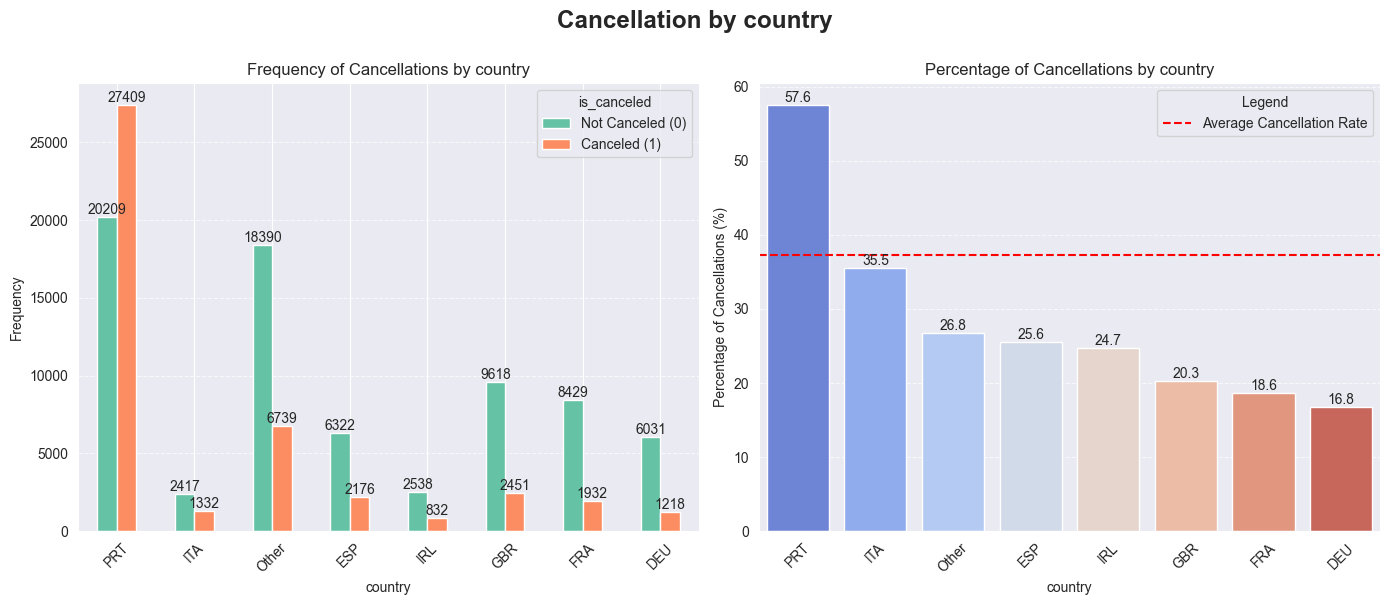

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
category_col = 'country'
percentage_threshold = 2
sort = True

counts = df1[category_col].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < percentage_threshold].index  # Identify rare labels

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")
    
# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan negara asal tamu:

1.  **Stabilitas Pemesanan Relatif Tinggi pada Jerman (DEU) dan Prancis (FRA)**:
    *   **Jerman dan Prancis** menunjukkan performa **pemesanan yang relatif stabil**. Tingkat pembatalan di kedua negara ini tergolong **terendah**, dengan **Jerman** di angka **16,8%** dan **Prancis** sebesar **18,6%**.
    *   **Pelancong dari Jerman dan Prancis** mengindikasikan **komitmen yang lebih kuat terhadap reservasi yang telah mereka buat**. Hal ini kemungkinan mencerminkan **jadwal perjalanan yang lebih terencana dan pasti** di antara wisatawan dari kedua negara tersebut.

2.  **Tingkat Pembatalan Moderat di Negara-Negara Eropa Lainnya**:
    *   Negara-negara Eropa lainnya yang termasuk dalam analisis, seperti **Spanyol (ESP), Irlandia (IRL), dan Inggris (GBR)**, menunjukkan tingkat pembatalan **moderat** yang berkisar antara **20,3% hingga 26,8%**.
    *   Angka-angka ini mengindikasikan adanya **tingkat komitmen pemesanan yang seimbang** di negara-negara tersebut, jika dibandingkan dengan Portugal dan Italia yang cenderung lebih tinggi, serta Jerman dan Prancis yang lebih rendah.

3.  **Portugal (PRT) Memimpin dalam Tingkat Pembatalan Tertinggi**:
    *   **Portugal mencatatkan tingkat pembatalan teratas**, mencapai **57,6%**. Angka ini merupakan yang tertinggi jika dibandingkan dengan negara-negara lain dalam analisis ini.
    *   Situasi ini dapat mengindikasikan **tingkat ketidakpastian yang cukup tinggi dalam rencana perjalanan yang dibuat oleh pelancong domestik Portugal**. Kemungkinan lain, hal ini mencerminkan **perilaku pemesanan yang lebih spekulatif** di kalangan tamu yang berasal dari Portugal.

4.  **Italia (ITA) Menunjukkan Tingkat Pembatalan yang Cukup Signifikan**:
    *   Pemesanan dari **Italia** memperlihatkan **tingkat ketidakstabilan yang moderat**, dengan tingkat pembatalan mencapai **35,5%**.
    *   Data ini menunjukkan bahwa **pelancong asal Italia** lebih memiliki kecenderungan untuk membatalkan pemesanan **dibandingkan dengan negara-negara Eropa lainnya**, seperti **Jerman (DEU) dan Prancis (FRA)**, yang keduanya memiliki tingkat pembatalan yang jauh lebih rendah.


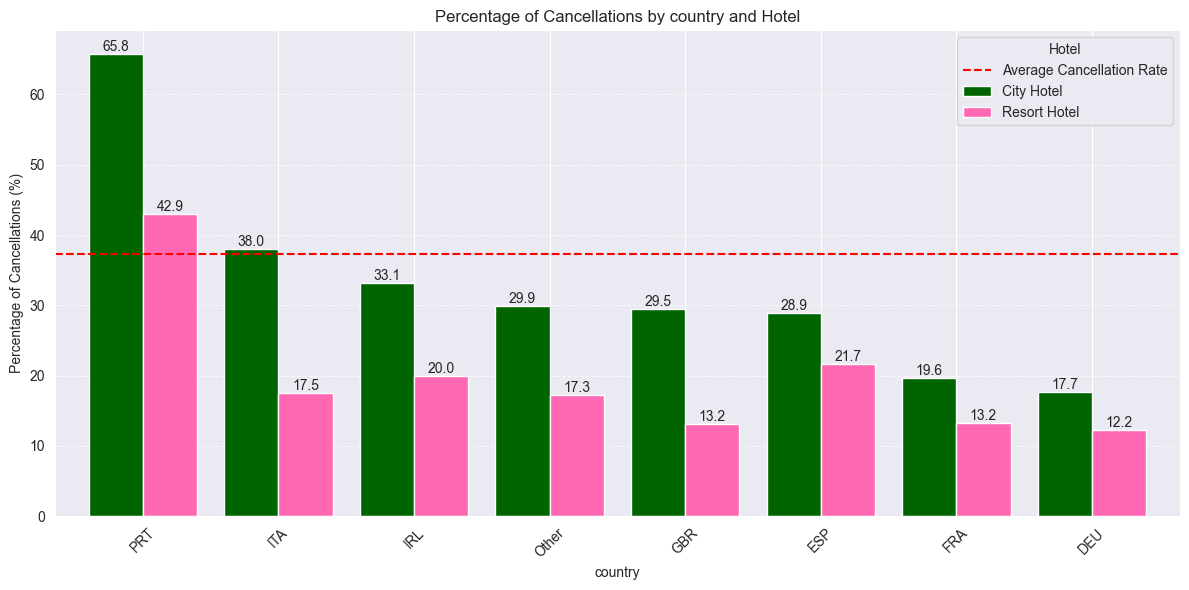

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salin DataFrame
df1 = df.copy()

# Ubah tipe data kolom 'is_canceled' menjadi integer
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Hitung persentase
counts = df1[category_col].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Kelompokkan data berdasarkan 'hotel' dan 'country'
grouped = df1.groupby(['hotel', category_col])['is_canceled'].mean().reset_index()

# Hitung persentase pembatalan
grouped['percentage'] = grouped['is_canceled'] * 100

# Pivot DataFrame untuk mempermudah plotting
pivot_table = grouped.pivot(index=category_col, columns='hotel', values='percentage')

# Sortir berdasarkan persentase pembatalan untuk 'City Hotel'
pivot_table = pivot_table.sort_values(by='City Hotel', ascending=False)

# Buat plot batang dengan palet warna yang berbeda untuk City Hotel dan Resort Hotel
colors = ['#006400', '#ff69b4']  # Warna hijau tua untuk City Hotel dan pink untuk Resort Hotel
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Tambahkan label data
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Garis rata-rata pembatalan
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Tambahkan judul dan label sumbu
plt.title(f'Percentage of Cancellations by {category_col} and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan negara asal tamu dan jenis hotel:

1.  **Portugal (PRT) Tetap Memimpin Tingkat Pembatalan Tertinggi di Seluruh Jenis Hotel**:
    *   **Portugal** secara konsisten mencatatkan tingkat pembatalan **tertinggi**, tidak peduli jenis hotelnya. Di **Hotel Kota**, tingkat pembatalan dari Portugal mencapai **65,8%**, sementara di **Hotel Resor** angkanya adalah **42,9%**.
    *   Data ini **merefleksikan tingkat ketidakstabilan pemesanan yang sangat tinggi di kalangan pelancong asal Portugal**, dan fenomena ini **terutama mencolok di Hotel Kota**.

2.  **Kontras Signifikan Tingkat Pembatalan Italia (ITA) dan Irlandia (IRL) Berdasarkan Jenis Hotel**:
    *   **Italia dan Irlandia** menunjukkan **perbedaan yang signifikan** dalam tingkat pembatalan **berdasarkan jenis hotel**. Di **Hotel Kota Italia**, tingkat pembatalan tercatat **38,0%**, jauh lebih tinggi dibandingkan **Hotel Resor** yang hanya **17,5%**. **Pola serupa juga terlihat di Irlandia**, dengan tingkat pembatalan **33,1% di Hotel Kota** berbanding **20,0% di Hotel Resor**.
    *   Temuan ini mengindikasikan bahwa **tamu dari Italia dan Irlandia yang memilih Hotel Kota lebih cenderung untuk membatalkan pemesanan mereka**, dibandingkan dengan mereka yang memilih Hotel Resor.

3.  **Negara-Negara Lain Menunjukkan Tingkat Pembatalan yang Cenderung Moderat**:
    *   **Negara-negara lain**, seperti **Inggris (GBR), Spanyol (ESP), dan Prancis (FRA)**, secara umum menunjukkan tingkat pembatalan yang **lebih rendah dan moderat**. Di **Hotel Kota Inggris**, tingkat pembatalan mencapai **29,5%**, dan di **Hotel Resor** sebesar **13,2%**.
    *   Data ini mengisyaratkan bahwa **negara-negara tersebut memiliki tingkat stabilitas pemesanan yang lebih baik di kedua jenis hotel**, dan **terutama menonjol di Hotel Resor**.

4.  **Jerman (DEU) Memperlihatkan Stabilitas Pemesanan Terbaik**:
    *   **Jerman** tampil sebagai negara dengan **pemesanan paling stabil**. Tingkat pembatalan dari Jerman tercatat **terendah** dibandingkan negara lain, dengan hanya **17,7% di Hotel Kota** dan **12,2% di Hotel Resor**.
    *   Hal ini menegaskan bahwa **pelancong dari Jerman memiliki tingkat pembatalan paling rendah di kedua jenis hotel**, menunjukkan **komitmen yang kuat dan rencana perjalanan yang paling pasti** dibandingkan negara-negara lainnya.


#### **5.3.4 Apakah jumlah pemesanan sebelumnya berpengaruh terhadap pembatalan reservasi hotel?**







/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/2487747272.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


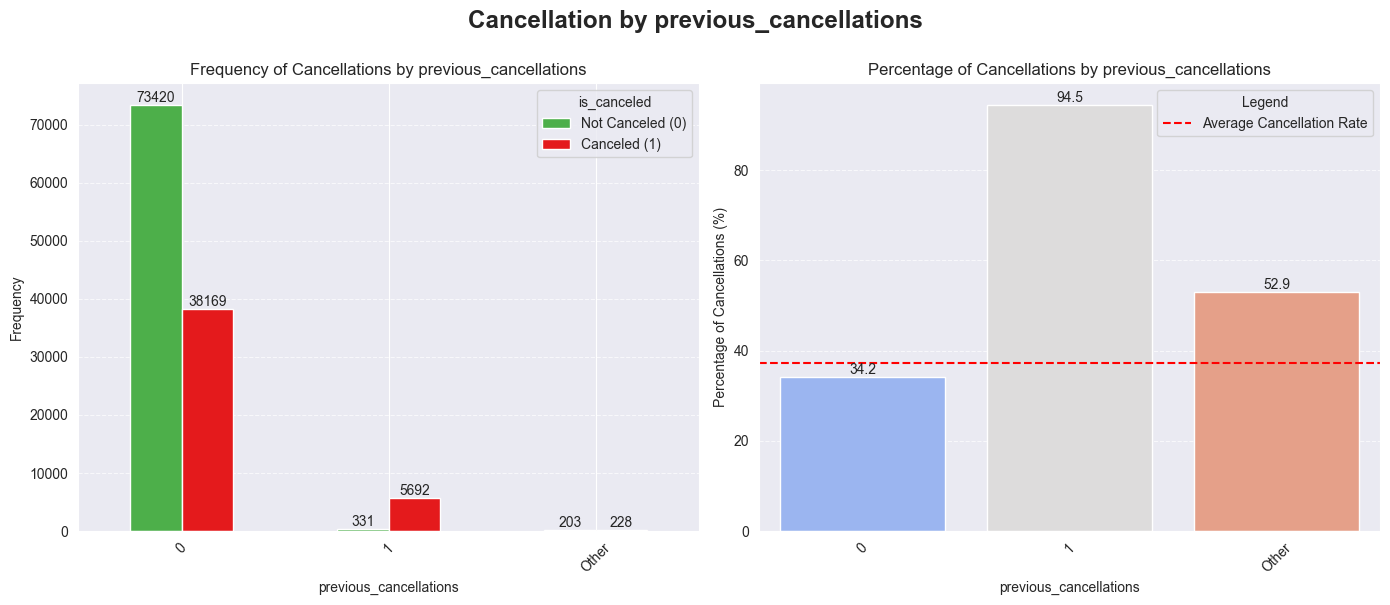

In [50]:
# Salin DataFrame
df1 = df.copy()

# Tentukan kolom kategori dan ambang batas persentase
category_col = 'previous_cancellations'
percentage_threshold = 1
sort = False

# Hitung persentase
counts = df1[category_col].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index

# Ganti label yang jarang dengan 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Periksa apakah kolom 'is_canceled' dan kolom kategori ada
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Data frekuensi
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Data persentase untuk is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set ukuran gambar
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Grafik batang untuk frekuensi pembatalan (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=['#4daf4a', '#e41a1c'])  # Warna hijau dan merah
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label pada batang frekuensi
for container in ax.containers:
    ax.bar_label(container)

# Grafik batang untuk persentase pembatalan (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Tambahkan label pada batang persentase
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Hitung dan plot garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Tampilkan legenda untuk garis rata-rata
percentage_ax.legend(title='Legend')

# Tampilkan plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan riwayat pembatalan yang pernah dilakukan oleh tamu:

1.  **Kecenderungan Pembatalan Tinggi pada Tamu dengan Riwayat Pembatalan Sebelumnya**:
    *   Tamu yang **pernah melakukan pembatalan** setidaknya satu kali di masa lalu menunjukkan tingkat pembatalan yang **sangat tinggi**, mencapai **94,5%**.
    *   Temuan ini mengindikasikan adanya **pola pembatalan yang berulang**. Riwayat pembatalan di masa lampau tampaknya menjadi **indikator yang kuat untuk memprediksi potensi pembatalan di masa mendatang**.

2.  **Tingkat Pembatalan Moderat pada Tamu Tanpa Riwayat Pembatalan**:
    *   Sebaliknya, tamu yang **belum pernah melakukan pembatalan** sebelumnya menunjukkan tingkat pembatalan yang **jauh lebih rendah**, yaitu **34,2%**.
    *   Meskipun tingkat pembatalan ini masih tergolong signifikan, kelompok tamu ini **lebih cenderung untuk memenuhi dan menghormati pemesanan yang telah mereka buat**, jika dibandingkan dengan kelompok tamu yang memiliki riwayat pembatalan.

3.  **Variasi Tingkat Pembatalan pada Kategori "Lainnya"**:
    *   Kategori **"Lainnya"**, yang diasumsikan mencakup **kasus-kasus khusus atau kategori yang tidak terdefinisi secara spesifik**, memiliki tingkat pembatalan **moderat**, yaitu **52,9%**.
    *   Angka ini mengisyaratkan bahwa **faktor-faktor tertentu yang belum teridentifikasi secara eksplisit** turut berkontribusi pada tingkat pembatalan yang lebih tinggi dalam kelompok "Lainnya" ini. Perlu dilakukan analisis lebih lanjut untuk memahami karakteristik spesifik dari kelompok ini.


<Figure size 1200x600 with 0 Axes>

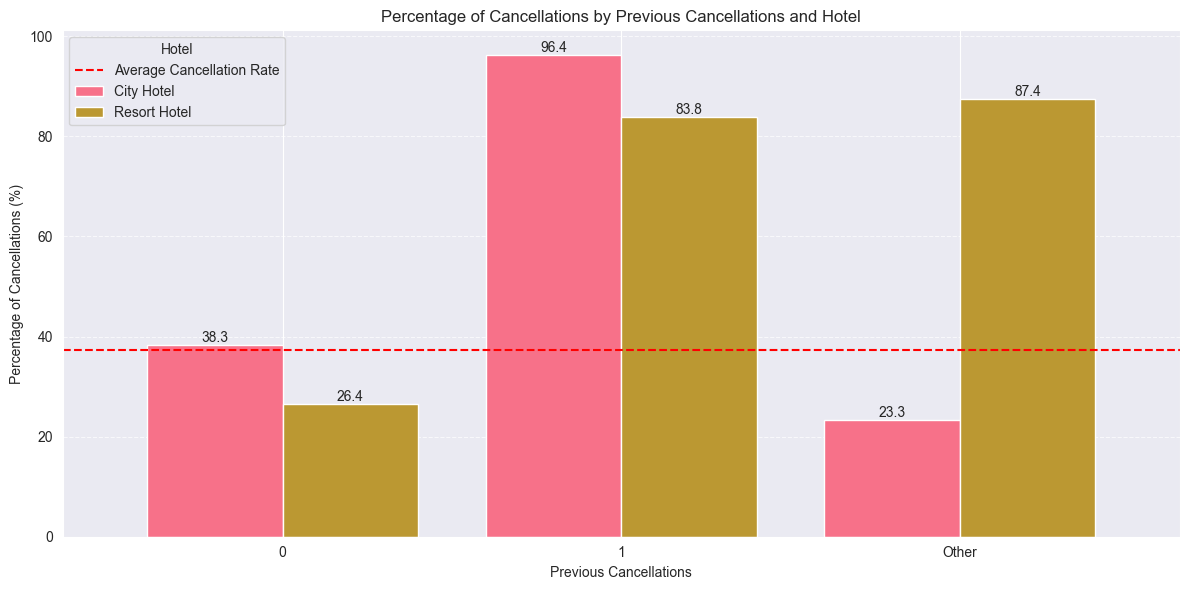

In [51]:

# Salin DataFrame
df1 = df.copy()

# Ubah tipe data kolom 'is_canceled' menjadi integer
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Hitung persentase
counts = df1['previous_cancellations'].value_counts(normalize=True) * 100
rare_labels = counts[counts < 1].index
df1['previous_cancellations'] = df1['previous_cancellations'].replace(rare_labels, 'Other')

# Kelompokkan data berdasarkan 'hotel' dan 'previous_cancellations'
grouped = df1.groupby(['hotel', 'previous_cancellations'])['is_canceled'].mean().reset_index()

# Hitung persentase pembatalan
grouped['percentage'] = grouped['is_canceled'] * 100

# Pivot tabel untuk mempermudah plotting
pivot_table = grouped.pivot(index='previous_cancellations', columns='hotel', values='percentage')

# Plot barchart dengan palet warna yang menarik
colors = sns.color_palette("husl")  # Menggunakan palet warna dari seaborn
plt.figure(figsize=(12, 6))
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Tambahkan label data
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Garis rata-rata pembatalan
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Previous Cancellations and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Previous Cancellations')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()



Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan riwayat pembatalan tamu dan jenis hotel:

1.  **Dibandingkan Hotel Resor, Hotel Kota lebih mudah mengalami pembatalan dari tamu tanpa riwayat pembatalan**:
    *   Pada kategori tamu **tanpa riwayat pembatalan sebelumnya**, **Hotel Kota** menunjukkan tingkat pembatalan yang lebih tinggi, yaitu **38,3%**. Sebagai perbandingan, **Hotel Resor** mencatat tingkat pembatalan **26,4%**.
    *   Temuan ini mengindikasikan bahwa **Hotel Kota lebih rentan terhadap pembatalan dari tamu yang belum pernah membatalkan pemesanan sebelumnya**, dibandingkan dengan Hotel Resor.

2.  **Tingkat Pembatalan Sangat Tinggi pada Tamu dengan Riwayat Pembatalan di Kedua Jenis Hotel**:
    *   Tamu yang **memiliki riwayat pembatalan** (setidaknya satu pembatalan sebelumnya) menunjukkan tingkat pembatalan yang **sangat tinggi di kedua jenis hotel**. Angkanya mencapai **96,4% untuk Hotel Kota** dan **83,8% untuk Hotel Resor**.
    *   Data ini menegaskan adanya **pola pembatalan berulang yang kuat**, baik di Hotel Kota maupun Hotel Resor. Namun, pola ini **terlihat lebih dominan dan ekstrem pada Hotel Kota**.

3.  **Tingkat pembatalan yang tinggi terjadi pada kategori "Lainnya" di Hotel Resor**:
    *   Kategori **"Lainnya"** di **Hotel Resor** memiliki tingkat pembatalan yang **tinggi**, yaitu **87,4%**. Angka ini jauh lebih tinggi dibandingkan dengan kategori "Lainnya" di **Hotel Kota** yang hanya **23,3%**.
    *   Hal ini mengisyaratkan bahwa **faktor-faktor yang tidak teridentifikasi atau kasus-kasus khusus** yang termasuk dalam kategori "Lainnya" berpotensi **memicu tingkat pembatalan yang lebih tinggi secara signifikan di Hotel Resor**, dibandingkan dengan di Hotel Kota.


#### **5.3.5 Bagaimana tipe pelanggan yang berbeda berpengaruh pada pembatalan pemesanan hotel?**







/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/4112352971.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


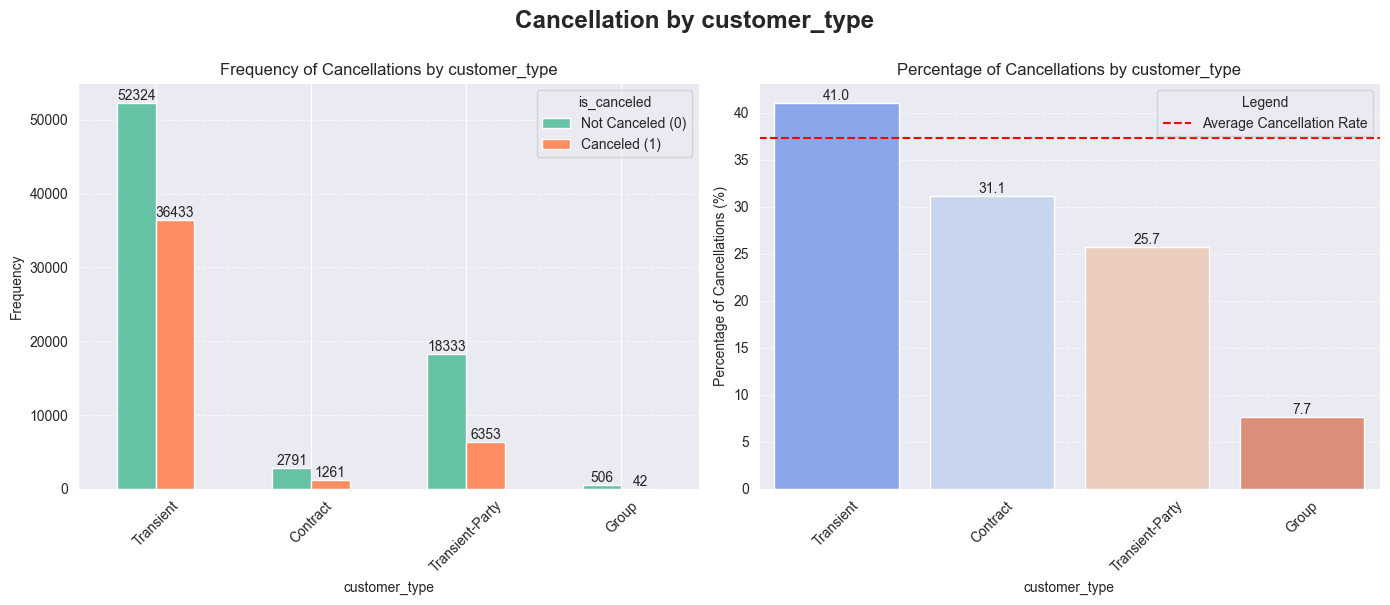

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salin DataFrame
df1 = df.copy()

# Tentukan kolom kategori dan ambang batas persentase
category_col = 'customer_type'
percentage_threshold = 0
sort = True

# Hitung persentase
counts = df1[category_col].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index

# Ganti label yang jarang dengan 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Periksa apakah kolom 'is_canceled' dan kolom kategori ada
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Data frekuensi
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Data persentase untuk is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Atur ukuran gambar
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Grafik batang untuk frekuensi pembatalan (tidak ditumpuk)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label pada batang frekuensi
for container in ax.containers:
    ax.bar_label(container)

# Grafik batang untuk persentase pembatalan (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Tambahkan label pada batang persentase
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Hitung dan plot garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Tampilkan legenda untuk garis rata-rata
percentage_ax.legend(title='Legend')

# Tampilkan plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan tipe tamu (*customer type*):

1.  **Tamu *Transient* Menunjukkan Tingkat Pembatalan Tertinggi**:
    *   Tipe tamu **transient**, yang umumnya melakukan pemesanan untuk kunjungan tunggal atau insidental, memiliki tingkat pembatalan yang **paling tinggi**, mencapai **41,0%**. Angka ini secara signifikan lebih tinggi dibandingkan dengan tipe tamu lainnya.
    *   Temuan ini mengindikasikan bahwa tamu *transient* **lebih cenderung mengubah rencana perjalanan** atau **melakukan pemesanan yang bersifat spekulatif** (misalnya, memesan beberapa hotel sekaligus untuk dibandingkan).

2.  **Tamu *Contract* Memperlihatkan Tingkat Pembatalan Moderat**:
    *   Tamu dengan tipe **contract** (kontrak), menunjukkan tingkat pembatalan **moderat** sebesar **31,1%**.  Meskipun lebih stabil dibandingkan dengan tamu *transient*, tingkat pembatalan pada tipe tamu ini **masih mencakup proporsi yang cukup signifikan** dari total pembatalan.
    *   Hal ini menunjukkan bahwa **pemesanan dengan kontrak, meskipun menawarkan tingkat keandalan yang lebih tinggi dibandingkan pemesanan *transient*, tidak sepenuhnya kebal terhadap risiko pembatalan**.

3.  **Tamu *Transient-Party* Relatif Lebih Berkomitmen pada Pemesanan**:
    *   Tingkat pembatalan untuk tamu **transient-party** (rombongan *transient*) tercatat sebesar **25,7%**. Angka ini **lebih rendah dibandingkan** dengan tingkat pembatalan pada kategori tamu *transient* dan *contract*.
    *   Data ini mengisyaratkan bahwa **kelompok tamu yang memesan sebagai rombongan (*party*) kemungkinan memiliki komitmen yang lebih kuat terhadap reservasi mereka**. Hal ini mungkin disebabkan oleh **perencanaan perjalanan yang lebih terkoordinasi** dan melibatkan beberapa pihak.

4.  **Tamu *Group* Memiliki Tingkat Pembatalan Terendah**:
    *   Tamu dengan tipe **group** (kelompok) menunjukkan tingkat pembatalan yang **paling rendah** di antara semua tipe tamu, yaitu hanya **7,7%**.
    *   Temuan ini mengindikasikan bahwa **pemesanan kelompok, yang seringkali melibatkan perencanaan yang lebih terstruktur dan detail**, adalah tipe pemesanan yang **paling kecil kemungkinannya untuk dibatalkan**.


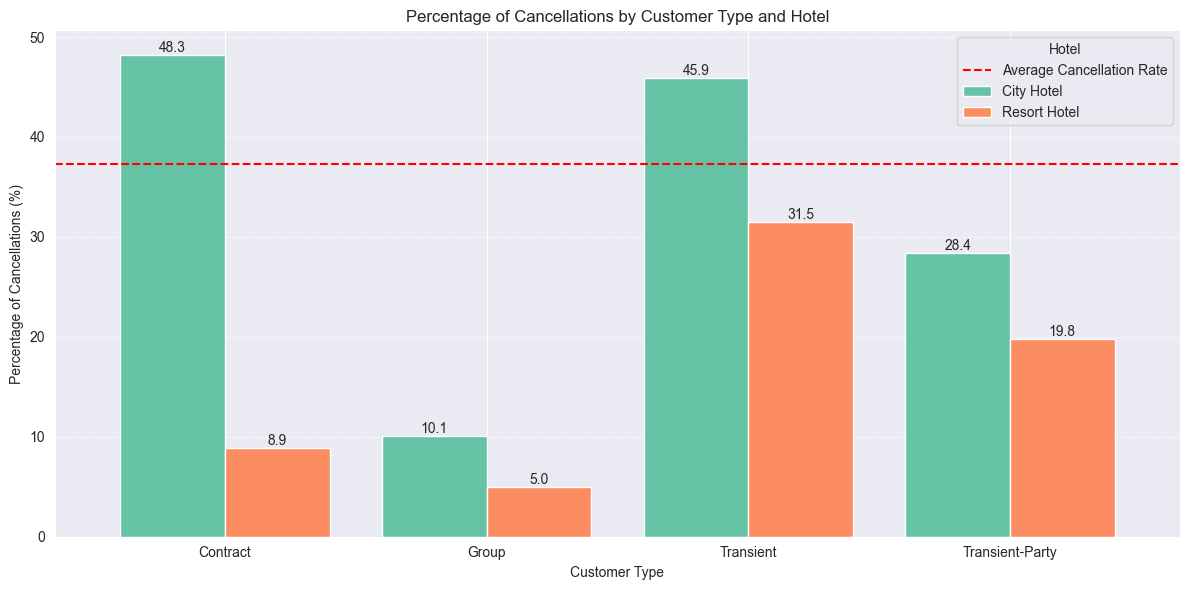

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salin DataFrame
df1 = df.copy()

# Ubah tipe data kolom 'is_canceled' menjadi int
df1[['is_canceled']] = df1[['is_canceled']].astype('int')

# Hitung persentase
counts = df1['customer_type'].value_counts(normalize=True) * 100
rare_labels = counts[counts < 0].index
df1['customer_type'] = df1['customer_type'].replace(rare_labels, 'Other')

# Kelompokkan data berdasarkan 'hotel' dan 'customer_type'
grouped = df1.groupby(['hotel', 'customer_type'])['is_canceled'].mean().reset_index()

# Hitung persentase pembatalan
grouped['percentage'] = grouped['is_canceled'] * 100

# Pivot tabel untuk mempermudah plotting
pivot_table = grouped.pivot(index='customer_type', columns='hotel', values='percentage')

# Buat bar plot dengan palet warna yang menarik
colors = sns.color_palette("Set2")
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Tambahkan label data
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Garis rata-rata pembatalan
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Customer Type and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Customer Type')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan tipe tamu (*customer type*) dan jenis hotel:

1.  **Variasi Tingkat Pembatalan yang Signifikan pada Tamu *Contract* Berdasarkan Jenis Hotel**:
    *   Tamu dengan tipe **contract** (*kontrak*) menunjukkan **perbedaan tingkat pembatalan yang mencolok antara Hotel Kota dan Hotel Resor**. Di **Hotel Kota**, tingkat pembatalan tamu *contract* tercatat **tinggi, yaitu 48,3%**. Sebaliknya, di **Hotel Resor**, tingkat pembatalannya **jauh lebih rendah, hanya 8,9%**.
    *   Temuan ini mengindikasikan bahwa tamu *contract* yang melakukan pemesanan di **Hotel Kota lebih cenderung melakukan pembatalan**. Hal ini mungkin berkaitan dengan **sifat pemesanan bisnis atau acara yang lebih fleksibel dan dinamis** yang umumnya diasosiasikan dengan Hotel Kota.

2.  **Tamu *Transient* Secara Konsisten Menunjukkan Tingkat Pembatalan yang Tinggi di Kedua Jenis Hotel**:
    *   Tamu dengan tipe **transient** (*insidental*) memperlihatkan tingkat pembatalan yang **konsisten tinggi di kedua jenis hotel**. Tingkat pembatalan pada tamu *transient* mencapai **45,9% di Hotel Kota** dan **31,5% di Hotel Resor**.
    *   Data ini menegaskan bahwa tamu *transient*, yang **seringkali melakukan pemesanan untuk kunjungan tunggal**, memiliki **probabilitas pembatalan yang lebih tinggi**, **terlepas dari jenis hotel yang dipilih**.

3.  **Tamu *Transient-Party* Lebih Berkomitmen pada Pemesanan di Hotel Resor**:
    *   Tingkat pembatalan untuk tamu **transient-party** (rombongan *insidental*) adalah **28,4% di Hotel Kota** dan **19,8% di Hotel Resor**.
    *   Hal ini mengisyaratkan bahwa **perjalanan kelompok atau acara yang diprakarsai oleh tamu *transient-party*** di **Hotel Resor cenderung lebih terencana dan memiliki tingkat kepastian yang lebih tinggi**, sehingga **lebih kecil kemungkinannya untuk mengalami perubahan atau pembatalan** dibandingkan dengan pemesanan di Hotel Kota.

4.  **Tamu *Group* Menunjukkan Tingkat Pembatalan Terendah di Kedua Jenis Hotel**:
    *   Tamu dengan tipe **group** (*kelompok*) secara konsisten menunjukkan tingkat pembatalan **terendah di antara semua tipe tamu dan di kedua jenis hotel**. Tingkat pembatalan tamu *group* hanya **10,1% di Hotel Kota** dan **5,0% di Hotel Resor**.
    *   Temuan ini **menekankan komitmen yang kuat pada pemesanan yang dilakukan oleh kelompok**. Kemungkinan besar, pemesanan kelompok **seringkali terkait dengan acara atau konferensi yang telah direncanakan secara matang**, sehingga tingkat pembatalannya sangat minimal.


#### **5.3.6 Bagaimana frekuensi reservasi yang tidak dibatalkan sebelumnya berkontribusi terhadap fluktuasi tingkat pembatalan pemesanan hotel terkini?**






/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/970917383.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


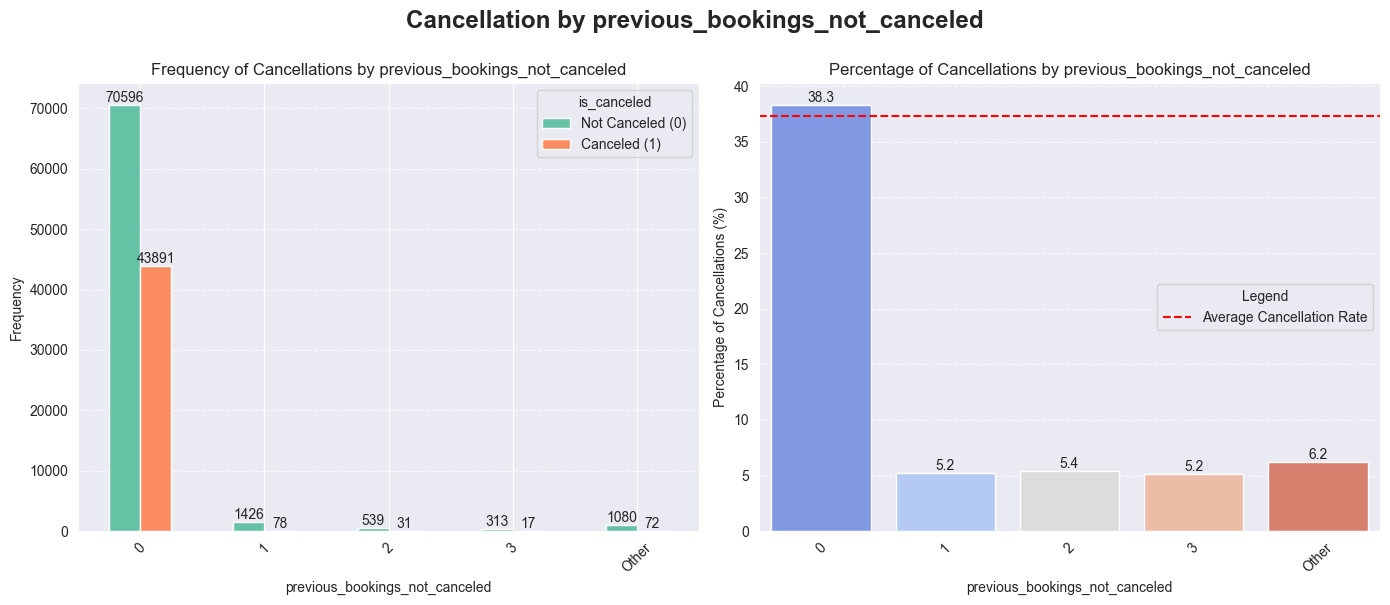

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salin DataFrame
df1 = df.copy()

# Tentukan kolom kategori dan ambang batas persentase
category_col = 'previous_bookings_not_canceled'
percentage_threshold = 0.25
sort = False

# Hitung persentase
counts = df1[category_col].value_counts(normalize=True) * 100
rare_labels = counts[counts < percentage_threshold].index

# Ganti label yang jarang dengan 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Periksa apakah kolom 'is_canceled' dan kolom kategori ada
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Data frekuensi
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Data persentase untuk is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Atur ukuran gambar
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Grafik batang untuk frekuensi pembatalan (tidak ditumpuk)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label pada batang frekuensi
for container in ax.containers:
    ax.bar_label(container)

# Grafik batang untuk persentase pembatalan (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Tambahkan label pada batang persentase
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Hitung dan plot garis vertikal untuk rata-rata persentase pembatalan
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Tampilkan legenda untuk garis rata-rata
percentage_ax.legend(title='Legend')

# Tampilkan plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan riwayat pemesanan yang berhasil (tidak dibatalkan) yang pernah dilakukan oleh tamu:

1.  **Pembatalan terbanyak berasal dari pelanggan yang belum pernah memesan sebelumnya.**:
    *   Sebagian besar pembatalan teramati berasal dari kelompok tamu yang **belum memiliki riwayat pemesanan yang tidak dibatalkan (0 pemesanan sebelumnya)**. Tingkat pembatalan pada kelompok ini mencapai **38,3%**.
    *   Data ini mengindikasikan bahwa tamu yang **baru pertama kali melakukan pemesanan atau belum pernah memiliki pengalaman pemesanan yang sukses** di hotel tersebut **lebih rentan untuk membatalkan reservasi** mereka.

2.  **Konsistensi Tingkat Pembatalan Rendah pada Tamu dengan Riwayat Pemesanan Tidak Dibatalkan**:
    *   Sebaliknya, tamu yang **telah memiliki riwayat pemesanan yang berhasil** (1, 2, atau 3 pemesanan sebelumnya yang tidak dibatalkan) menunjukkan tingkat pembatalan yang **secara konsisten rendah**, berkisar antara **5,2% hingga 5,4%**.
    *   Temuan ini menegaskan bahwa tamu yang **sudah pernah berhasil melakukan pemesanan dan menginap di hotel cenderung memiliki tingkat loyalitas dan komitmen yang lebih tinggi**. Mereka **jauh lebih kecil kemungkinannya untuk membatalkan pemesanan** dibandingkan dengan tamu yang belum memiliki riwayat tersebut.

3.  **Tingkat pembatalan yang sedikit lebih tinggi ditunjukkan oleh kategori "Lainnya**:
    *   Kategori **"Lainnya"** menunjukkan tingkat pembatalan sebesar **6,2%**. Angka ini **sedikit lebih tinggi** dibandingkan dengan kelompok tamu yang memiliki beberapa riwayat pemesanan berhasil.
    *   Meskipun demikian, tingkat pembatalan pada kategori "Lainnya" **masih jauh di bawah tingkat pembatalan yang diamati pada kelompok tamu yang tidak memiliki riwayat pemesanan sebelumnya**. Hal ini mengindikasikan bahwa faktor-faktor di luar riwayat pemesanan berhasil juga dapat memengaruhi tingkat pembatalan, meskipun dampaknya tidak sebesar riwayat pemesanan yang berhasil.


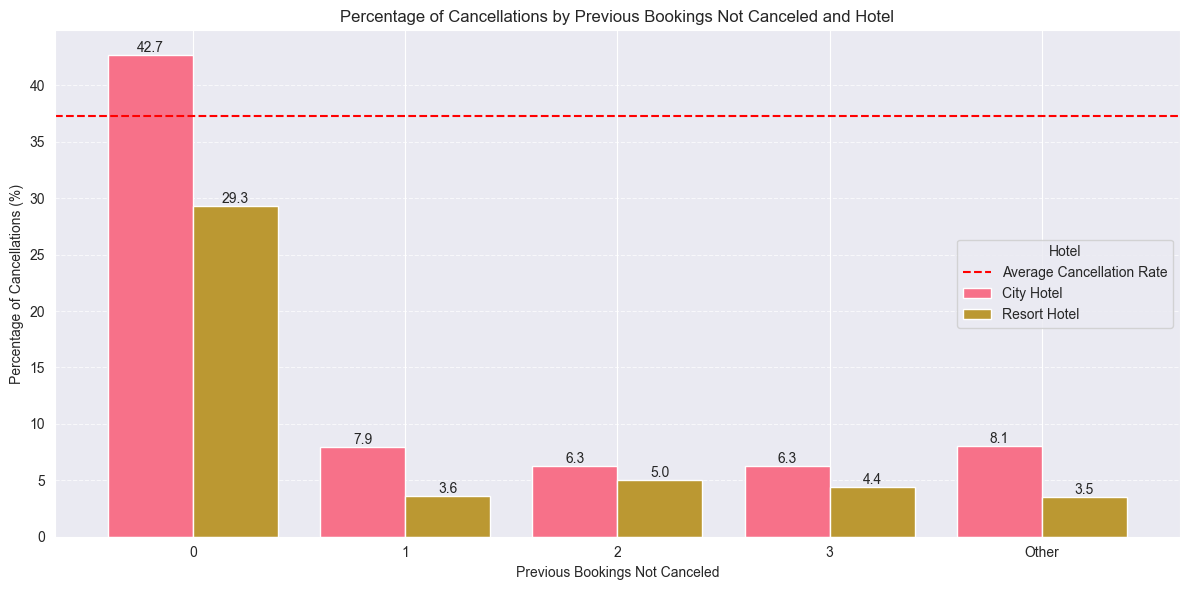

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')
counts = df1['previous_bookings_not_canceled'].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < 0.25].index  # Identify rare labels
df1['previous_bookings_not_canceled'] = df1['previous_bookings_not_canceled'].replace(rare_labels, 'Other')    
grouped = df1.groupby(['hotel', 'previous_bookings_not_canceled'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped['percentage'] = grouped['is_canceled'] * 100

# Sort by percentage in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot the DataFrame for better plotting
pivot_table = grouped.pivot(index='previous_bookings_not_canceled', columns='hotel', values='percentage')

# Create a bar plot with a seaborn color palette
colors = sns.color_palette("husl")  # Use a seaborn color palette
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Previous Bookings Not Canceled and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Previous Bookings Not Canceled')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()



Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan riwayat pemesanan berhasil tamu dan jenis hotel:

1.  **Perbedaan Tingkat Pembatalan yang Signifikan Antara Hotel Kota dan Hotel Resor pada Pemesanan Pertama**:
    *   **Hotel Kota** memperlihatkan tingkat pembatalan yang **lebih tinggi**, yaitu **42,7%**, pada pelanggan yang **belum memiliki riwayat pemesanan berhasil (0 pemesanan sebelumnya)**. Sebagai perbandingan, **Hotel Resor** mencatatkan tingkat pembatalan yang lebih rendah, yaitu **29,3%**.
    *   Temuan ini mengindikasikan bahwa **pelanggan Hotel Kota lebih berpotensi untuk membatalkan pemesanan pertama mereka**, dibandingkan dengan pelanggan Hotel Resor.

2.  **Pola Pembatalan yang Konsisten Rendah pada Pemesan Ulang**:
    *   Pada pelanggan yang **telah memiliki riwayat pemesanan berhasil (1 hingga 3 pemesanan sebelumnya yang tidak dibatalkan)**, baik **Hotel Kota maupun Hotel Resor** menunjukkan tingkat pembatalan yang **rendah dan konsisten**. Tingkat pembatalan berkisar antara **7,9% hingga 6,3% untuk Hotel Kota**, dan **5% hingga 4,4% untuk Hotel Resor**.
    *   Data ini menegaskan bahwa **setelah pelanggan memiliki catatan pemesanan yang sukses di masa lalu, kecenderungan pembatalan menjadi jauh lebih jarang terjadi**, tanpa memandang jenis hotel yang dipilih.

3.  **Pola serupa juga terlihat pada kategori "Lainnya"**:
    *   Untuk kategori **"Lainnya"**, **Hotel Kota** menunjukkan tingkat pembatalan yang **sedikit lebih tinggi**, yaitu **8,1%**.  Sebagai perbandingan, **Hotel Resor** memiliki tingkat pembatalan **3,5%** pada kategori yang sama.
    *   Hal ini mengisyaratkan bahwa **pelanggan Hotel Resor cenderung lebih stabil** dalam pemesanan mereka, bahkan dalam kategori "Lainnya" yang diasumsikan kurang terdefinisi atau mencakup kasus-kasus khusus.


#### **5.3.7 Apakah tipe deposit memengaruhi pembatalan reservasi hotel?**






/var/folders/r6/hv0sg1nj7lb39s026kzggm_40000gn/T/ipykernel_83729/1400331640.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')


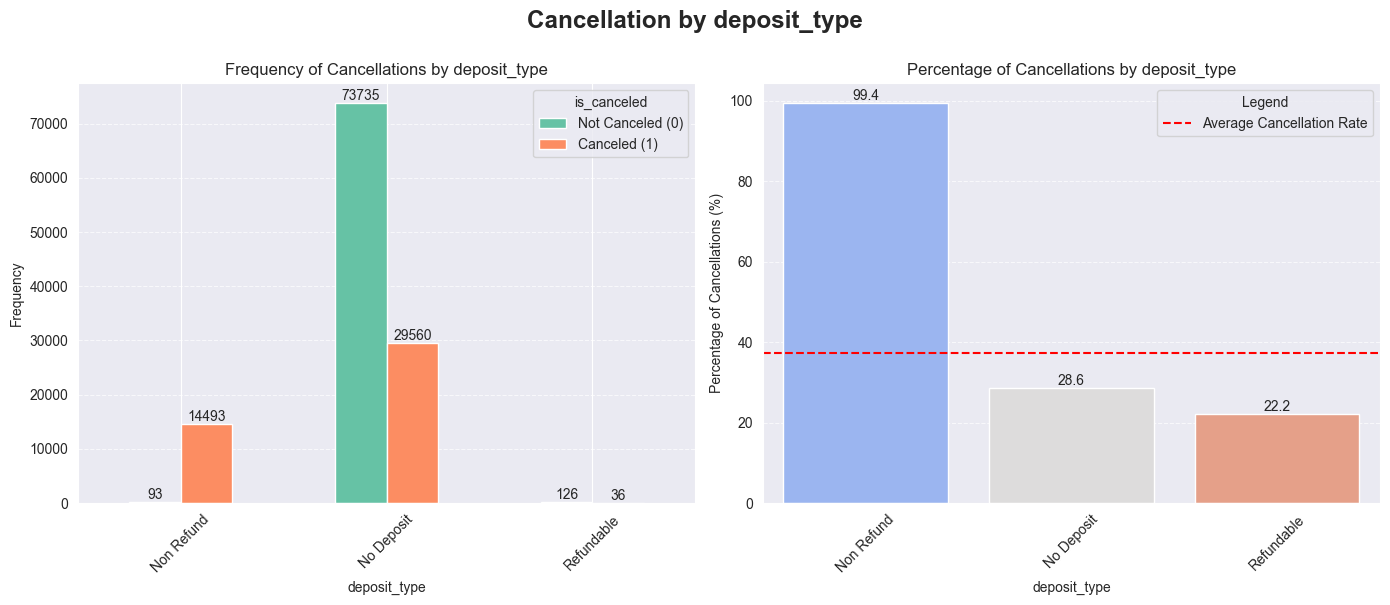

In [56]:
df1 = df.copy()
category_col = 'deposit_type'
percentage_threshold = 0
sort = True

counts = df1[category_col].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < percentage_threshold].index  # Identify rare labels

# Replace rare labels with 'Other'
df1[category_col] = df1[category_col].replace(rare_labels, 'Other')

# Check if 'is_canceled' and the category column exist
if 'is_canceled' not in df1.columns or category_col not in df1.columns:
    raise ValueError(f"The DataFrame must contain the 'is_canceled' column and the '{category_col}' column.")

# Frequency data
freq_data = df1.groupby([category_col, 'is_canceled']).size().unstack(fill_value=0)

# Percentage data for is_canceled = 1
total_counts = df1.groupby(category_col).size()
percent_data = freq_data[1] / total_counts * 100
freq_data['percentage'] = percent_data

if sort:
    freq_data = freq_data.sort_values('percentage', ascending=False)

freq_data2 = freq_data.copy()
freq_data = freq_data.drop('percentage', axis=1)

# Set the figure size
plt.figure(figsize=(14, 6))
plt.suptitle(f'Cancellation by {category_col}', fontsize=17.5, y=1, fontweight="bold")

# Bar chart for frequency of cancellations (unstacked)
plt.subplot(1, 2, 1)
ax = freq_data.plot(kind='bar', ax=plt.gca(), color=sns.color_palette("Set2"))
plt.title('Frequency of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Not Canceled (0)', 'Canceled (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on the frequency bars
for container in ax.containers:
    ax.bar_label(container)

# Bar chart for percentage of cancellations (is_canceled = 1)
plt.subplot(1, 2, 2)
percentage_ax = sns.barplot(x=category_col, y='percentage', data=freq_data2, palette='coolwarm')
plt.title('Percentage of Cancellations by ' + category_col)
plt.xlabel(category_col)
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=45)

# Add labels on the percentage bars
for index, value in enumerate(freq_data2['percentage']):
    percentage_ax.text(index, value, f"{value:.1f}", ha='center', va='bottom')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
percentage_ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

# Show legend for the average line
percentage_ax.legend(title='Legend')

# Show the plots
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Tentu, berikut adalah penataan ulang struktur bahasa, perbaikan tata bahasa, dan format yang bersih untuk teks Anda, agar mudah di-*copy-paste*:

**Interpretasi Tingkat Pembatalan Pemesanan Hotel Berdasarkan Analisis *Bar Chart* Tipe Deposit**

Berikut adalah interpretasi ulang dari kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan tipe deposit, dengan variasi struktur bahasa dan peningkatan tata bahasa:

1.  **Tipe Deposit *Non-Refundable* Berkorelasi Kuat dengan Pembatalan**:
    *   Pemesanan dengan tipe deposit ***non-refundable*** (*tidak dapat dikembalikan*) menunjukkan tingkat pembatalan yang **sangat tinggi**, mencapai **99,4%**. Hal ini mengindikasikan bahwa pelanggan yang memilih tipe deposit ini **sangat cenderung untuk melakukan pembatalan**. Beberapa kemungkinan penyebab fenomena ini adalah:
        *   ***Kebijakan Non-Refundable Sebagai Faktor Pembatalan**:  Kemungkinan besar, pelanggan merasa **tidak memiliki insentif untuk mempertahankan pemesanan** karena biaya yang telah dibayarkan tidak dapat dikembalikan, meskipun terjadi pembatalan.
        *   ***Penyalahgunaan untuk Tujuan Visa**:  Umumnya, pemesanan dengan deposit *non-refundable* seringkali dilakukan melalui **Online Travel Agents (OTA) dengan menggunakan detail kartu kredit yang tidak valid atau fiktif**. Pemesanan semacam ini **seringkali dibuat sebagai dokumen pendukung (*supporting document*) untuk aplikasi visa**, khususnya untuk memasuki negara-negara tertentu seperti Portugal, di mana konfirmasi pemesanan hotel menjadi syarat wajib pengajuan visa. Setelah proses aplikasi visa selesai (terlepas dari hasilnya), pemesanan ini **seringkali dibatalkan**. Hotel yang gagal melakukan penagihan pada kartu kredit yang bermasalah ini kemudian mengidentifikasi pemesanan tersebut sebagai **'palsu'** dan mencoba menghubungi pelanggan untuk verifikasi. Namun, **proses verifikasi ini membutuhkan waktu** dan selama periode tersebut, pemesanan-pemesanan palsu ini **berkontribusi secara negatif terhadap akurasi perkiraan permintaan kamar dan efektivitas pengambilan keputusan manajemen permintaan hotel.

2.  **Tingkat Pembatalan Moderat pada Tipe Tanpa Deposit**:
    *   Pemesanan dengan tipe ***tanpa deposit*** menunjukkan tingkat pembatalan yang **moderat**, yaitu sekitar **28,6%**.
    *   Angka ini, meskipun signifikan, **jauh lebih rendah dibandingkan dengan tingkat pembatalan pada pemesanan *non-refundable***. Hal ini mengindikasikan bahwa **pelanggan merasa lebih fleksibel dan tidak terikat** ketika tidak ada komitmen finansial di awal pemesanan. Dengan tidak adanya deposit, potensi kerugian finansial akibat pembatalan terasa lebih kecil bagi pelanggan, sehingga kemungkinan pembatalan menjadi lebih tinggi dibandingkan dengan tipe deposit *refundable*.

3.  **Tipe Deposit *Refundable* Berasosiasi dengan Tingkat Pembatalan Terendah**:
    *   Pemesanan dengan tipe deposit ***refundable*** (*dapat dikembalikan*) menunjukkan tingkat pembatalan yang **paling rendah** di antara ketiga jenis deposit, yaitu hanya **22,2%**.
    *   Temuan ini mengindikasikan bahwa **opsi pengembalian dana memberikan rasa aman dan fleksibilitas bagi pelanggan**. Keberadaan deposit yang dapat dikembalikan tampaknya **mendorong pelanggan untuk mempertahankan pemesanan mereka**, karena mereka memiliki jaminan bahwa dana yang telah dibayarkan tidak akan hilang jika terjadi perubahan rencana dan pembatalan menjadi diperlukan.


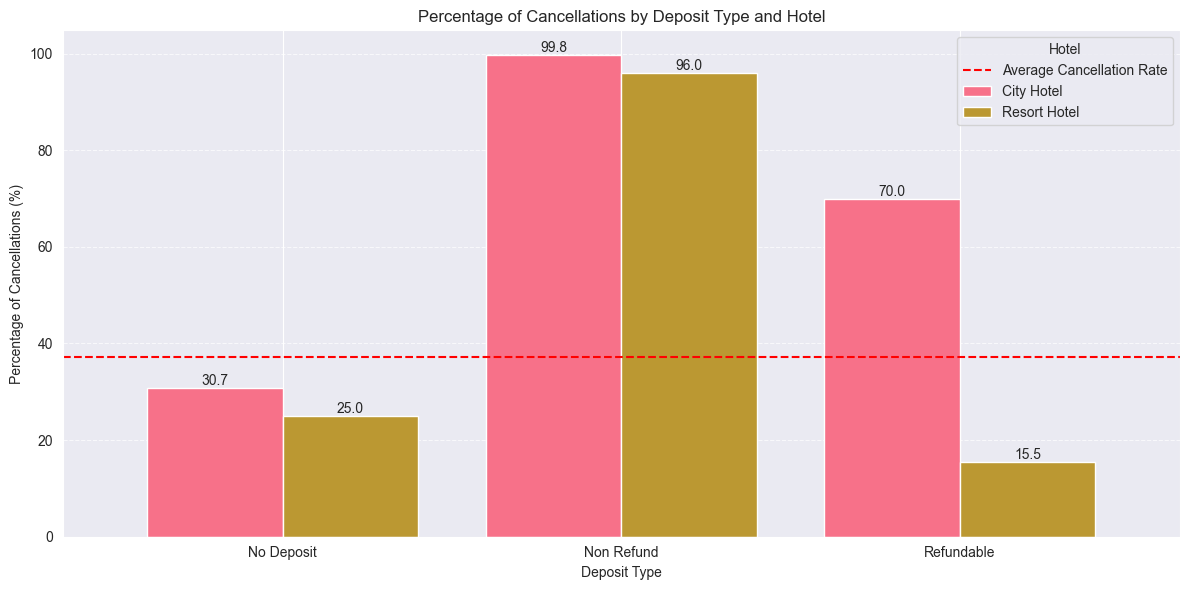

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
df1[['is_canceled']] = df1[['is_canceled']].astype('int')
counts = df1['deposit_type'].value_counts(normalize=True) * 100  # Get percentages
rare_labels = counts[counts < 0].index  # Identify rare labels
df1['deposit_type'] = df1['deposit_type'].replace(rare_labels, 'Other')    
grouped = df1.groupby(['hotel', 'deposit_type'])['is_canceled'].mean().reset_index()

# Calculate percentage
grouped['percentage'] = grouped['is_canceled'] * 100

# Sort by percentage in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)

# Pivot the DataFrame for better plotting
pivot_table = grouped.pivot(index='deposit_type', columns='hotel', values='percentage')

# Create a bar plot with a seaborn color palette
colors = sns.color_palette("husl")  # Use a seaborn color palette
ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

# Calculate and plot the vertical line for average cancellation percentage
average_cancellation = 37.3
ax.axhline(y=average_cancellation, color='red', linestyle='--', label='Average Cancellation Rate')

plt.title('Percentage of Cancellations by Deposit Type and Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Deposit Type')
plt.ylabel('Percentage of Cancellations (%)')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


Berikut kesimpulan yang ditarik dari *bar chart* terkait tingkat pembatalan pemesanan hotel, dikelompokkan berdasarkan tipe deposit dan jenis hotel:

1.  **Korelasi Kuat antara Deposit *Non-Refundable* dan Pembatalan di Kedua Jenis Hotel**:
    *   Pemesanan dengan tipe deposit ***non-refundable*** (*tidak dapat dikembalikan*) secara konsisten **berkorelasi sangat kuat dengan pembatalan**, terlepas dari jenis hotel. Di **Hotel Kota**, **99,8%** pemesanan *non-refundable* berakhir dengan pembatalan. Di **Hotel Resor**, angka ini juga sangat tinggi, mencapai **96,0%**.
    *   Temuan ini menegaskan bahwa **tipe deposit *non-refundable* merupakan prediktor pembatalan yang sangat kuat**, dan pola ini berlaku secara merata di Hotel Kota dan Hotel Resor.

2.  **Perbedaan Signifikan Tingkat Pembatalan *Refundable* Antara Hotel Kota dan Hotel Resor**:
    *   Pemesanan dengan deposit ***refundable*** (*dapat dikembalikan*) menunjukkan **perbedaan tingkat pembatalan yang mencolok antara Hotel Kota dan Hotel Resor**. Di **Hotel Kota**, persentase pembatalan untuk deposit *refundable* mencapai **70,0%**, yang tergolong tinggi. Namun, di **Hotel Resor**, tingkat pembatalan untuk tipe deposit yang sama **jauh lebih rendah, hanya 15,5%**.
    *   Hal ini mengindikasikan bahwa **pelanggan Hotel Kota yang memilih opsi deposit *refundable* memiliki kecenderungan yang lebih besar untuk membatalkan pemesanan**, dibandingkan dengan pelanggan Hotel Resor yang memilih opsi serupa. Perbedaan ini mungkin mencerminkan perbedaan karakteristik pelanggan atau tujuan perjalanan antara kedua jenis hotel.

3.  **Tingkat Pembatalan Moderat pada Pemesanan Tanpa Deposit di Kedua Jenis Hotel**:
    *   Pemesanan ***tanpa deposit*** menunjukkan tingkat pembatalan yang **moderat dan relatif serupa di kedua jenis hotel**. Di **Hotel Kota**, tingkat pembatalan tanpa deposit adalah **30,7%**, dan di **Hotel Resor** adalah **25,0%**.
    *   Data ini mengindikasikan bahwa **meskipun tidak ada kewajiban deposit awal, risiko pembatalan tetap ada**. Namun, tingkat pembatalannya **jauh lebih rendah** jika dibandingkan dengan pemesanan yang menggunakan deposit *non-refundable*. Hal ini menunjukkan bahwa keberadaan deposit *non-refundable* secara signifikan meningkatkan probabilitas pembatalan, sementara ketiadaan deposit masih menyisakan tingkat fleksibilitas yang cukup bagi pelanggan untuk membatalkan pemesanan.


# **SUMMARY TABEL OF DATA ANALYSIS**

| No. | Kolom                        | Insight                                                                                                                                                                                                                                                                                                                                                       | Rekomendasi                                                                                                                                                                                                                                                                                                                                                       |
| --- | ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1.  | Lead Time                    | **Pembatalan Lebih Sering di *Lead Time* Panjang, Meskipun Terbanyak di *Lead Time* Pendek**: Sebagian besar pembatalan terjadi pada *lead time* pendek (≤30 hari), namun persentase pembatalan tertinggi justru terdapat pada *lead time* panjang (>360 hari), mengindikasikan kerentanan pembatalan pada pemesanan jangka jauh.                                         | **Kebijakan yang fleksibel untuk pemesanan Jangka panjang**: <br> - Menawarkan opsi fleksibilitas seperti penjadwalan ulang tanpa biaya untuk pemesanan dengan lead time panjang untuk mengurangi pembatalan dengan memberikan alternatif selain membatalkan pemesanan. <br> **Kebijakan Deposit Non-Refundable yang Lebih Tinggi**: <br> - Mewajibkan pembayaran deposit yang lebih tinggi dan non-refundable untuk pemesanan dengan lead time panjang. Untuk Mengurangi insentif pembatalan karena tamu akan berpikir dua kali sebelum membatalkan pemesanan dengan deposit yang signifikan. |
| 2.  | Bulan (Tren Total Pemesanan) | **Peningkatan Pemesanan Signifikan hingga Musim Panas**: Total pemesanan hotel terus meningkat dari Januari hingga Juni, mencapai puncaknya pada bulan Juli. Lonjakan ini kemungkinan terkait dengan hari libur umum di Portugal pada tanggal 4 Juli, yang menandai puncak musim liburan musim panas.                                                                                  | **Kampanye Pemasaran Musiman & Paket Liburan Akhir Tahun**: <br> - Kembangkan kampanye pemasaran musiman yang ditargetkan untuk memaksimalkan pendapatan selama musim puncak. <br> - Ciptakan paket promosi menarik dan kebijakan pembatalan fleksibel untuk meningkatkan pemesanan di bulan Desember yang cenderung sepi namun memiliki banyak hari libur.                                                                 |
| 3.  | Bulan (Tren Pembatalan)      | **Agustus Volume Pembatalan Tertinggi, April Persentase Pembatalan Tertinggi**: Bulan Agustus mencatat jumlah pembatalan tertinggi (8.533), sementara Desember terendah (2.362). Meskipun demikian, persentase pembatalan tertinggi justru terjadi di bulan April (41,0%), mengindikasikan April sebagai bulan dengan risiko pembatalan tertinggi.                                          | **Perketat Kebijakan Pembatalan:** <br> - Pertimbangkan untuk menerapkan kebijakan pembatalan yang lebih ketat selama bulan April dan Agustus, seperti batas waktu pembatalan yang lebih awal atau biaya pembatalan yang lebih tinggi. Ini bisa mendorong tamu untuk lebih berkomitmen pada reservasi mereka.                                                                 |
| 4.  | Market Segment               | **Segmen Pasar Tertentu Berisiko Tinggi**: Pemesanan berkelompok (*Group Bookings*), melalui Agen Perjalanan/Operator Tur (*Travel Agent/Tour Operators*), tipe kamar A, dengan Setoran *Non-Refundable*, dan menggunakan Agen ID 1 sangat rentan terhadap pembatalan, mengindikasikan karakteristik segmen pasar yang perlu diwaspadai.                                                   | **Kebijakan Pembatalan Lebih Ketat untuk Segmen Berisiko**: <br> - Pertimbangkan untuk memperketat kebijakan pembatalan pada segmen pasar berisiko tinggi ini untuk meminimalisir potensi kerugian akibat pembatalan seperti Deposit Non-Refundable, Pembayaran Penuh di Muka, dan Batas Waktu Pembatalan yang Ketat.                                                                                                 |
| 5.  | Company                      | **Perusahaan Tidak Dikenal Dominasi Pembatalan**: Perusahaan dengan identitas tidak dikenal menunjukkan tingkat pembatalan yang tertinggi, bahkan melebihi rata-rata secara keseluruhan, menandakan potensi pemesanan yang kurang valid atau spekulatif.                                                                                                           | **Verifikasi Pemesanan:** <br> - Menerapkan proses verifikasi yang ketat untuk pemesanan perusahaan. Misalnya, meminta informasi perusahaan yang lebih lengkap, seperti alamat, nomor telepon, dan email resmi perusahaan. lalu menggunakan platform pihak ketiga untuk memverifikasi identitas perusahaan sebelum mengonfirmasi pemesanan. <br> **Kebijakan Pembatalan yang Lebih Ketat:** <br> - Menerapkan kebijakan pembatalan yang lebih ketat untuk pemesanan perusahaan. Misalnya, mengenakan biaya pembatalan atau meminta deposit yang tidak dapat dikembalikan untuk pemesanan perusahaan. <br> - Menetapkan batas waktu untuk pembatalan tanpa biaya, setelah itu biaya pembatalan akan dikenakan. <br> **Pelatihan Staf:** <br> - Memberikan pelatihan kepada staf resepsionis dan reservasi tentang bagaimana menangani pemesanan perusahaan dan pentingnya verifikasi yang cermat. <br> - Meningkatkan komunikasi internal untuk memastikan bahwa semua staf memahami kebijakan baru terkait pemesanan dan pembatalan perusahaan. |
| 6.  | Country                      | **Pemesan Lokal Portugal Lebih Sering Membatalkan**: Pemesan dari Portugal (lokal) menunjukkan tingkat pembatalan tertinggi dibandingkan negara lain, bahkan di atas rata-rata keseluruhan, mengisyaratkan faktor lokal yang mempengaruhi perilaku pembatalan.                                                                                                     | **Kebijakan Khusus:** <br> - Terapkan kebijakan pembatalan yang lebih ketat untuk pemesan lokal(Portugal), seperti periode pembatalan yang lebih awal atau biaya pembatalan yang lebih tinggi jika dibatalkan mendekati tanggal menginap. <br> **Opsi Non-Refundable:** <br> - Pada tamu portugal berikan opsi tarif non-refundable namun dengan diskon lebih besar untuk membuat tamu mau memilih opsi non-refundable.                                                                                                                                 |
